## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to our first task: 'Dogs vs Cats'

We're going to try to create a model to enter the Dogs vs Cats competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): "State of the art: The current literature suggests machine classifiers can score above 80% accuracy on this task". So if we can beat 80%, then we will be at the cutting edge as of 2013!

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [9]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [18]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [20]:
PATH = "D:\\Code\\TEMP\\fastai\\courses\\dl1\\data\\dogscats\\"
PATH = "C:\\Users\\nwaller\\Documents\\fastai\\courses\\dl1\\data\\dogscats\\"
sz=224

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In [22]:
torch.cuda.is_available()

True

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [24]:
torch.backends.cudnn.enabled

True

### Extra steps if NOT using Crestle or Paperspace or our scripts

The dataset is available at http://files.fast.ai/data/dogscats.zip. You can download it directly on your server by running the following line in your terminal. `wget http://files.fast.ai/data/dogscats.zip`. You should put the data in a subdirectory of this notebook's directory, called `data/`. Note that this data is already available in Crestle and the Paperspace fast.ai template.

### Extra steps if using Crestle

Crestle has the datasets required for fast.ai in /datasets, so we'll create symlinks to the data we want for this competition. (NB: we can't write to /datasets, but we need a place to store temporary files, so we create our own writable directory to put the symlinks in, and we also take advantage of Crestle's `/cache/` faster temporary storage space.)

To run these commands (**which you should only do if using Crestle**) remove the `#` characters from the start of each line.

In [26]:
# os.makedirs('data/dogscats/models', exist_ok=True)

# !ln -s /datasets/fast.ai/dogscats/train {PATH}
# !ln -s /datasets/fast.ai/dogscats/test {PATH}
# !ln -s /datasets/fast.ai/dogscats/valid {PATH}

# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

In [27]:
# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

## First look at cat pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [29]:
os.listdir(PATH)

['models', 'sample', 'test1', 'tmp', 'train', 'valid']

In [31]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [33]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.1001.jpg',
 'cat.10016.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg']

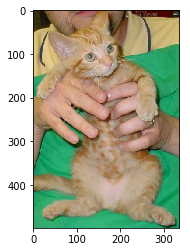

In [36]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [39]:
img.shape

(499, 336, 3)

In [43]:
img[:4,:4]

array([[[60, 58, 10],
        [60, 57, 14],
        [61, 56, 18],
        [63, 54, 23]],

       [[56, 54,  6],
        [56, 53, 10],
        [57, 52, 14],
        [60, 51, 20]],

       [[52, 49,  4],
        [52, 49,  6],
        [53, 48, 10],
        [56, 47, 16]],

       [[50, 47,  2],
        [50, 47,  4],
        [51, 45,  9],
        [53, 44, 13]]], dtype=uint8)

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

In [44]:
# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [46]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

  0%|          | 0/360 [00:00<?, ?it/s]

  2%|▏         | 7/360 [00:00<00:05, 69.12it/s, loss=0.506]

  5%|▌         | 19/360 [00:00<00:03, 91.98it/s, loss=0.234]

  9%|▊         | 31/360 [00:00<00:03, 100.37it/s, loss=0.162]

 12%|█▏        | 43/360 [00:00<00:03, 104.34it/s, loss=0.124]

 16%|█▌        | 56/360 [00:00<00:02, 109.29it/s, loss=0.101]

 22%|██▎       | 81/360 [00:00<00:02, 131.46it/s, loss=0.0836]

 26%|██▌       | 94/360 [00:00<00:02, 129.93it/s, loss=0.074] 

 29%|██▉       | 106/360 [00:00<00:01, 128.21it/s, loss=0.0717]

 33%|███▎      | 119/360 [00:00<00:01, 127.30it/s, loss=0.0657]

 37%|███▋      | 132/360 [00:01<00:01, 126.37it/s, loss=0.065] 

 45%|████▍     | 161/360 [00:01<00:01, 135.30it/s, loss=0.0598]

 48%|████▊     | 174/360 [00:01<00:01, 133.87it/s, loss=0.0572]

 52%|█████▏    | 186/360 [00:01<00:01, 132.33it/s, loss=0.0554]

 55%|█████▌    | 199/360 [00:01<00:01, 131.54it/s, loss=0.057] 

 59%|█████▊    | 211/360 [00:01<00:01, 130.64it/s, loss=0.0546]

 67%|██████▋   | 241/360 [00:01<00:00, 136.96it/s, loss=0.0474]

 70%|███████   | 253/360 [00:01<00:00, 135.85it/s, loss=0.0539]

 74%|███████▎  | 265/360 [00:01<00:00, 134.88it/s, loss=0.0537]

 77%|███████▋  | 278/360 [00:02<00:00, 134.24it/s, loss=0.0513]

 81%|████████  | 290/360 [00:02<00:00, 133.31it/s, loss=0.0518]

 89%|████████▉ | 321/360 [00:02<00:00, 138.62it/s, loss=0.0561]

 92%|█████████▎| 333/360 [00:02<00:00, 137.72it/s, loss=0.0503]

 96%|█████████▌| 345/360 [00:02<00:00, 136.86it/s, loss=0.0497]

epoch      trn_loss   val_loss   accuracy   

    0      0.049892   0.024007   0.9925    

  0%|          | 0/360 [00:00<?, ?it/s]

  2%|▏         | 7/360 [00:00<00:05, 69.05it/s, loss=0.0462]

  5%|▌         | 19/360 [00:00<00:03, 93.07it/s, loss=0.0456]

  9%|▊         | 31/360 [00:00<00:03, 100.51it/s, loss=0.0432]

 12%|█▏        | 42/360 [00:00<00:03, 102.38it/s, loss=0.0416]

 15%|█▍        | 53/360 [00:00<00:02, 103.72it/s, loss=0.0419]

 22%|██▎       | 81/360 [00:00<00:02, 127.39it/s, loss=0.0426]

 26%|██▌       | 93/360 [00:00<00:02, 125.23it/s, loss=0.0391]

 29%|██▊       | 103/360 [00:00<00:02, 121.33it/s, loss=0.0371]

 31%|███       | 110/360 [00:00<00:02, 115.89it/s, loss=0.0374]

 33%|███▎      | 119/360 [00:01<00:02, 112.32it/s, loss=0.0406]

 35%|███▌      | 127/360 [00:01<00:02, 109.51it/s, loss=0.0394]

 40%|████      | 144/360 [00:01<00:01, 114.15it/s, loss=0.0463]

 45%|████▌     | 163/360 [00:01<00:01, 118.90it/s, loss=0.046] 

 49%|████▊     | 175/360 [00:01<00:01, 118.43it/s, loss=0.0426]

 52%|█████▏    | 186/360 [00:01<00:01, 117.88it/s, loss=0.0426]

 55%|█████▌    | 198/360 [00:01<00:01, 117.32it/s, loss=0.0458]

 58%|█████▊    | 209/360 [00:01<00:01, 116.57it/s, loss=0.0474]

 67%|██████▋   | 240/360 [00:01<00:00, 126.76it/s, loss=0.0418]

 69%|██████▊   | 247/360 [00:02<00:00, 123.37it/s, loss=0.0413]

 72%|███████▏  | 258/360 [00:02<00:00, 122.72it/s, loss=0.0388]

 75%|███████▌  | 270/360 [00:02<00:00, 122.19it/s, loss=0.0362]

 78%|███████▊  | 281/360 [00:02<00:00, 121.36it/s, loss=0.0474]

 81%|████████  | 292/360 [00:02<00:00, 120.50it/s, loss=0.046] 

 89%|████████▉ | 321/360 [00:02<00:00, 125.33it/s, loss=0.0416]

 92%|█████████▎| 333/360 [00:02<00:00, 124.81it/s, loss=0.0398]

 96%|█████████▌| 346/360 [00:02<00:00, 124.90it/s, loss=0.0409]

    1      0.040389   0.020506   0.9925    

  0%|          | 0/360 [00:00<?, ?it/s]

  2%|▏         | 7/360 [00:00<00:05, 68.44it/s, loss=0.038]

  5%|▌         | 19/360 [00:00<00:03, 91.32it/s, loss=0.0391]

  9%|▊         | 31/360 [00:00<00:03, 99.09it/s, loss=0.0391]

 12%|█▏        | 42/360 [00:00<00:03, 101.18it/s, loss=0.0399]

 15%|█▌        | 54/360 [00:00<00:02, 103.87it/s, loss=0.0366]

 22%|██▎       | 81/360 [00:00<00:02, 122.40it/s, loss=0.0367]

 26%|██▌       | 92/360 [00:00<00:02, 120.65it/s, loss=0.0347]

 28%|██▊       | 102/360 [00:00<00:02, 117.81it/s, loss=0.0374]

 32%|███▏      | 114/360 [00:00<00:02, 117.57it/s, loss=0.0389]

 35%|███▌      | 126/360 [00:01<00:02, 116.89it/s, loss=0.0387]

 39%|███▉      | 142/360 [00:01<00:01, 120.47it/s, loss=0.0378]

 45%|████▌     | 162/360 [00:01<00:01, 126.22it/s, loss=0.0361]

 49%|████▊     | 175/360 [00:01<00:01, 125.65it/s, loss=0.0386]

 52%|█████▏    | 186/360 [00:01<00:01, 124.41it/s, loss=0.039] 

 55%|█████▍    | 197/360 [00:01<00:01, 123.37it/s, loss=0.0397]

 58%|█████▊    | 208/360 [00:01<00:01, 122.20it/s, loss=0.0369]

 64%|██████▍   | 231/360 [00:01<00:01, 128.16it/s, loss=0.0356]

 68%|██████▊   | 244/360 [00:01<00:00, 128.07it/s, loss=0.0386]

 71%|███████   | 255/360 [00:02<00:00, 126.59it/s, loss=0.0353]

 74%|███████▍  | 266/360 [00:02<00:00, 125.58it/s, loss=0.0326]

 77%|███████▋  | 278/360 [00:02<00:00, 124.86it/s, loss=0.0332]

 81%|████████  | 290/360 [00:02<00:00, 124.18it/s, loss=0.034] 

 88%|████████▊ | 318/360 [00:02<00:00, 130.51it/s, loss=0.0343]

 91%|█████████ | 326/360 [00:02<00:00, 128.30it/s, loss=0.0322]

 94%|█████████▎| 337/360 [00:02<00:00, 127.55it/s, loss=0.0302]

100%|█████████▉| 359/360 [00:02<00:00, 130.86it/s, loss=0.0326]

    2      0.037227   0.024955   0.9895    

[array([0.02495]), 0.9895]

How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (i.e. those with highest probability that are correct)
4. The most incorrect labels of each class (i.e. those with highest probability that are incorrect)
5. The most uncertain labels (i.e. those with probability closest to 0.5).

In [47]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [49]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [53]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [59]:
log_preds[:10]

array([[ -0.0001 ,  -9.18032],
       [ -0.00001, -11.55959],
       [ -0.     , -12.78941],
       [ -0.00019,  -8.58472],
       [ -0.00006,  -9.64568],
       [ -0.00001, -12.14789],
       [ -0.     , -13.46511],
       [ -0.00001, -12.07152],
       [ -0.0001 ,  -9.25417],
       [ -0.00002, -10.96617]], dtype=float32)

In [62]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [63]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [64]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [66]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified

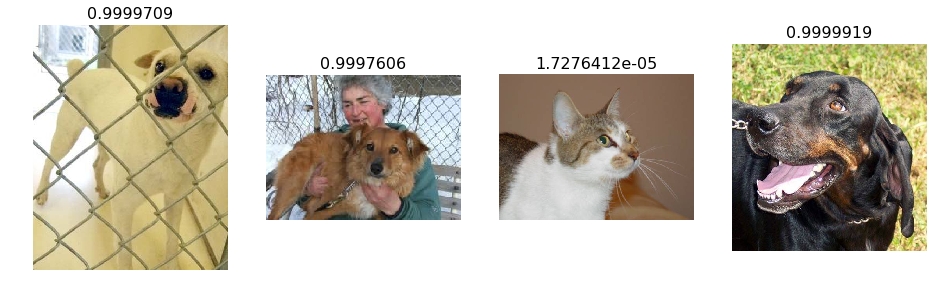

In [67]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified

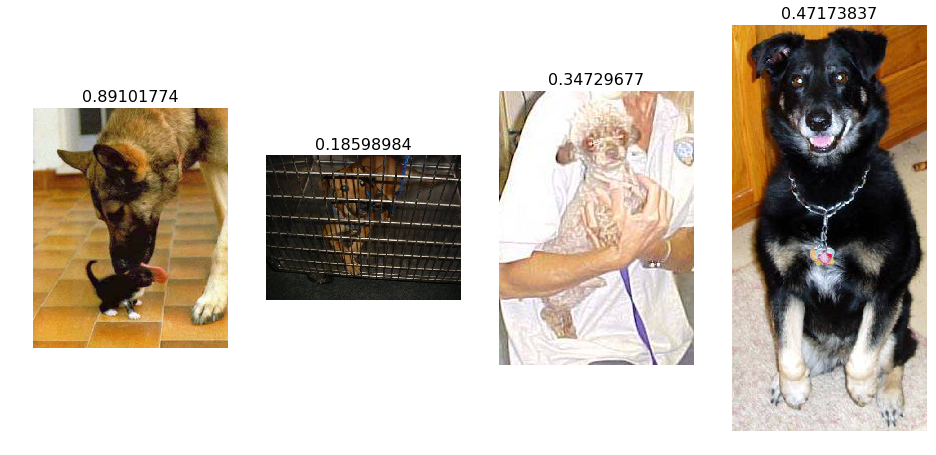

In [71]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [72]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats

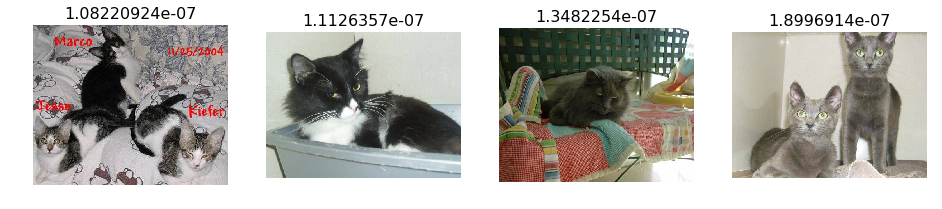

In [76]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs

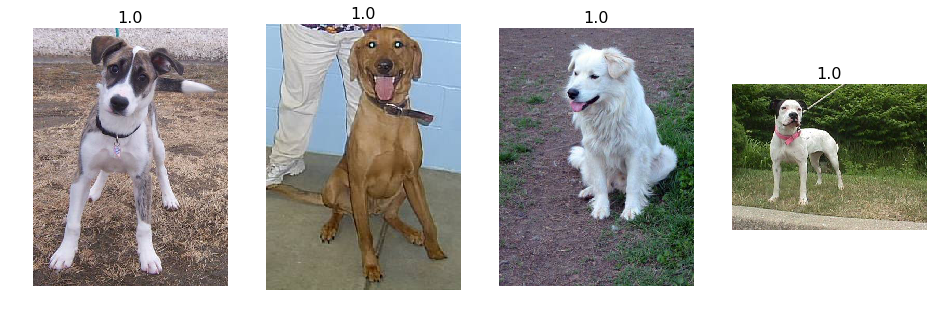

In [78]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats

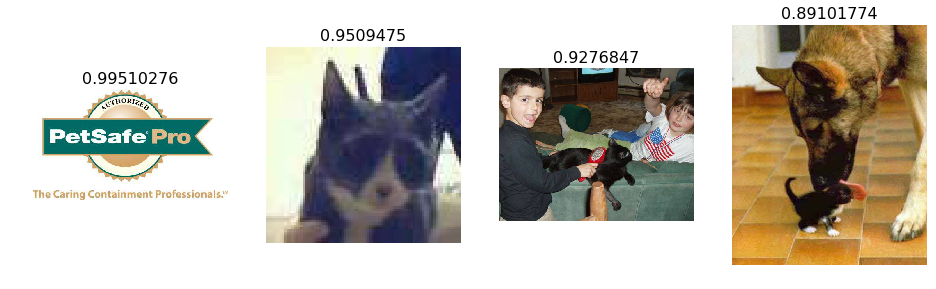

In [79]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs

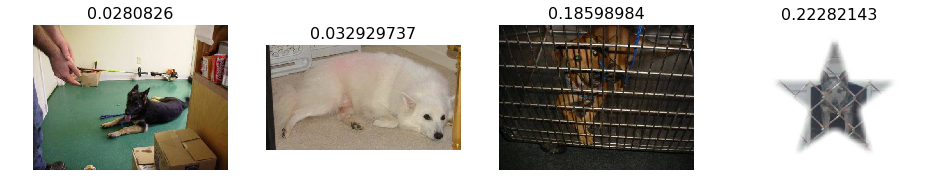

In [80]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions

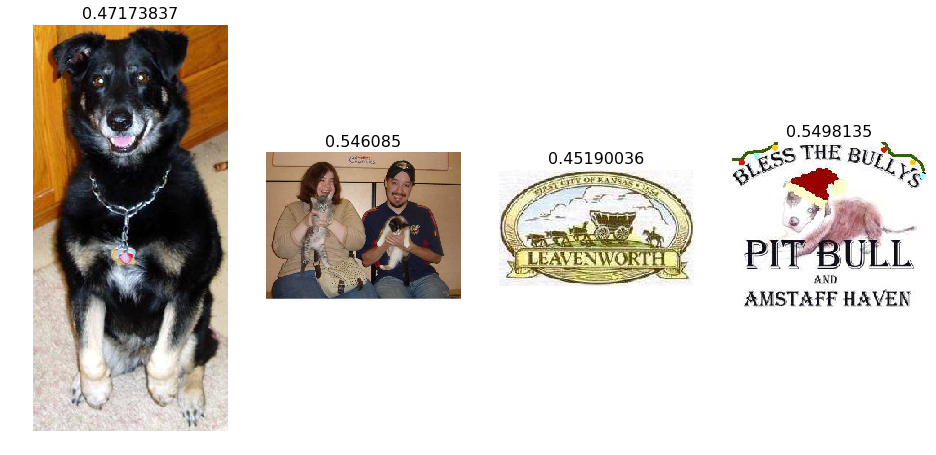

In [81]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affects model performance.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value, until the loss stops decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [82]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [83]:
lrf=learn.lr_find()

  0%|          | 0/360 [00:00<?, ?it/s]

  2%|▏         | 7/360 [00:00<00:05, 66.80it/s, loss=1.15]

  4%|▍         | 16/360 [00:00<00:04, 76.53it/s, loss=1.17]

  8%|▊         | 27/360 [00:00<00:03, 84.41it/s, loss=1.14]

 10%|█         | 36/360 [00:00<00:03, 85.28it/s, loss=1.12]

 12%|█▏        | 44/360 [00:00<00:03, 83.66it/s, loss=1.09]

 18%|█▊        | 63/360 [00:00<00:02, 100.37it/s, loss=1.02]

 23%|██▎       | 82/360 [00:00<00:02, 112.49it/s, loss=0.889]

 26%|██▌       | 93/360 [00:00<00:02, 111.82it/s, loss=0.8]  

 29%|██▉       | 104/360 [00:00<00:02, 111.47it/s, loss=0.704]

 32%|███▏      | 115/360 [00:01<00:02, 110.92it/s, loss=0.606]

 35%|███▌      | 127/360 [00:01<00:02, 110.67it/s, loss=0.511]

 41%|████▏     | 149/360 [00:01<00:01, 119.41it/s, loss=0.368]

 46%|████▌     | 164/360 [00:01<00:01, 121.65it/s, loss=0.291]

 49%|████▉     | 176/360 [00:01<00:01, 121.39it/s, loss=0.249]

 52%|█████▏    | 187/360 [00:01<00:01, 120.44it/s, loss=0.209]

 55%|█████▌    | 199/360 [00:01<00:01, 119.96it/s, loss=0.18] 

 59%|█████▊    | 211/360 [00:01<00:01, 119.70it/s, loss=0.15]

 67%|██████▋   | 241/360 [00:01<00:00, 126.70it/s, loss=0.115]

 70%|███████   | 252/360 [00:02<00:00, 125.82it/s, loss=0.112]

 73%|███████▎  | 264/360 [00:02<00:00, 125.32it/s, loss=0.115]

 76%|███████▋  | 275/360 [00:02<00:00, 124.58it/s, loss=0.115]

 80%|███████▉  | 287/360 [00:02<00:00, 124.23it/s, loss=0.19] 

 86%|████████▌ | 309/360 [00:02<00:00, 128.16it/s, loss=0.37]

Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

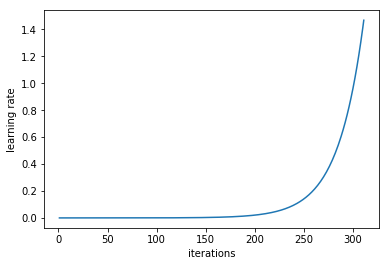

In [84]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

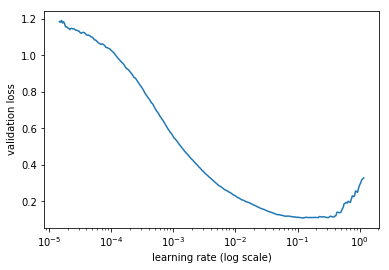

In [85]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we train the model, so you may want to re-run this function from time to time.

## Improving our model

### Data augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [86]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [87]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [88]:
ims = np.stack([get_augs() for i in range(6)])

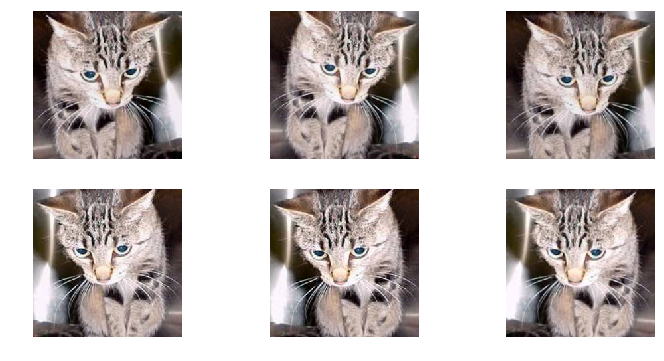

In [89]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [90]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [91]:
learn.fit(1e-2, 1)

  0%|          | 0/360 [00:00<?, ?it/s]

  2%|▏         | 6/360 [00:00<00:05, 59.54it/s, loss=0.691]

  4%|▍         | 16/360 [00:00<00:04, 79.57it/s, loss=0.334]

  7%|▋         | 25/360 [00:00<00:04, 82.41it/s, loss=0.223]

  9%|▉         | 33/360 [00:00<00:04, 81.15it/s, loss=0.181]

 12%|█▏        | 44/360 [00:00<00:03, 86.80it/s, loss=0.14] 

 16%|█▌        | 57/360 [00:00<00:03, 93.80it/s, loss=0.12]

 23%|██▎       | 82/360 [00:00<00:02, 114.68it/s, loss=0.0842]

 26%|██▌       | 94/360 [00:00<00:02, 114.73it/s, loss=0.0754]

 29%|██▉       | 106/360 [00:00<00:02, 115.02it/s, loss=0.0688]

 33%|███▎      | 118/360 [00:01<00:02, 115.19it/s, loss=0.0665]

 36%|███▌      | 130/360 [00:01<00:01, 115.18it/s, loss=0.0634]

 44%|████▍     | 160/360 [00:01<00:01, 130.14it/s, loss=0.0524]

 46%|████▋     | 167/360 [00:01<00:01, 125.55it/s, loss=0.0553]

 50%|████▉     | 179/360 [00:01<00:01, 124.48it/s, loss=0.0555]

 52%|█████▎    | 189/360 [00:01<00:01, 122.79it/s, loss=0.0551]

 56%|█████▌    | 201/360 [00:01<00:01, 122.48it/s, loss=0.0538]

 59%|█████▉    | 213/360 [00:01<00:01, 122.25it/s, loss=0.0531]

 67%|██████▋   | 241/360 [00:01<00:00, 129.66it/s, loss=0.0468]

 71%|███████   | 254/360 [00:01<00:00, 129.23it/s, loss=0.0526]

 74%|███████▍  | 266/360 [00:02<00:00, 128.36it/s, loss=0.0534]

 77%|███████▋  | 278/360 [00:02<00:00, 127.81it/s, loss=0.0513]

 81%|████████  | 290/360 [00:02<00:00, 127.17it/s, loss=0.0496]

 88%|████████▊ | 318/360 [00:02<00:00, 133.52it/s, loss=0.0453]

 91%|█████████ | 326/360 [00:02<00:00, 131.27it/s, loss=0.0498]

 94%|█████████▍| 338/360 [00:02<00:00, 130.54it/s, loss=0.047] 

epoch      trn_loss   val_loss   accuracy   

    0      0.057637   0.027708   0.991     

In [92]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [93]:
learn.fit(1e-2, 3, cycle_len=1)

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:05<32:47,  5.48s/it, loss=0.0714]

  1%|          | 2/360 [00:05<16:48,  2.82s/it, loss=0.0426]

  1%|          | 3/360 [00:05<11:31,  1.94s/it, loss=0.0488]

  1%|          | 4/360 [00:05<08:51,  1.49s/it, loss=0.0506]

  1%|▏         | 5/360 [00:06<07:17,  1.23s/it, loss=0.0478]

  2%|▏         | 6/360 [00:06<06:14,  1.06s/it, loss=0.0438]

  2%|▏         | 7/360 [00:06<05:28,  1.07it/s, loss=0.0407]

  2%|▏         | 8/360 [00:06<04:54,  1.20it/s, loss=0.0381]

  2%|▎         | 9/360 [00:09<06:10,  1.06s/it, loss=0.036] 

  3%|▎         | 10/360 [00:10<05:51,  1.00s/it, loss=0.0448]

  3%|▎         | 11/360 [00:10<05:25,  1.07it/s, loss=0.0462]

  3%|▎         | 12/360 [00:10<05:02,  1.15it/s, loss=0.0467]

  4%|▎         | 13/360 [00:10<04:43,  1.22it/s, loss=0.0523]

  4%|▍         | 14/360 [00:10<04:26,  1.30it/s, loss=0.0509]

  4%|▍         | 15/360 [00:10<04:12,  1.37it/s, loss=0.0501]

  4%|▍         | 16/360 [00:11<03:59,  1.44it/s, loss=0.0523]

  5%|▍         | 17/360 [00:14<04:48,  1.19it/s, loss=0.0515]

  5%|▌         | 18/360 [00:14<04:39,  1.22it/s, loss=0.049] 

  5%|▌         | 19/360 [00:15<04:31,  1.25it/s, loss=0.0473]

  6%|▌         | 20/360 [00:15<04:20,  1.31it/s, loss=0.0501]

  6%|▌         | 21/360 [00:15<04:10,  1.36it/s, loss=0.0474]

  6%|▌         | 22/360 [00:15<04:01,  1.40it/s, loss=0.0566]

  6%|▋         | 23/360 [00:15<03:52,  1.45it/s, loss=0.0546]

  7%|▋         | 24/360 [00:16<03:44,  1.50it/s, loss=0.0551]

  7%|▋         | 25/360 [00:19<04:21,  1.28it/s, loss=0.0527]

  7%|▋         | 26/360 [00:19<04:13,  1.32it/s, loss=0.0587]

  8%|▊         | 27/360 [00:19<04:05,  1.36it/s, loss=0.0599]

  8%|▊         | 28/360 [00:20<03:58,  1.39it/s, loss=0.0631]

  8%|▊         | 29/360 [00:20<03:56,  1.40it/s, loss=0.0607]

  8%|▊         | 30/360 [00:20<03:49,  1.44it/s, loss=0.0588]

  9%|▊         | 31/360 [00:21<03:43,  1.47it/s, loss=0.058] 

  9%|▉         | 32/360 [00:21<03:37,  1.51it/s, loss=0.0559]

  9%|▉         | 33/360 [00:24<04:01,  1.35it/s, loss=0.0545]

  9%|▉         | 34/360 [00:24<03:55,  1.39it/s, loss=0.055] 

 10%|▉         | 35/360 [00:24<03:49,  1.42it/s, loss=0.0537]

 10%|█         | 36/360 [00:24<03:44,  1.45it/s, loss=0.053] 

 10%|█         | 37/360 [00:25<03:39,  1.47it/s, loss=0.0516]

 11%|█         | 38/360 [00:25<03:34,  1.50it/s, loss=0.0513]

 11%|█         | 39/360 [00:26<03:34,  1.50it/s, loss=0.0522]

 11%|█         | 40/360 [00:26<03:29,  1.53it/s, loss=0.0553]

 11%|█▏        | 41/360 [00:29<03:45,  1.41it/s, loss=0.0538]

 12%|█▏        | 42/360 [00:29<03:41,  1.44it/s, loss=0.0522]

 12%|█▏        | 43/360 [00:29<03:38,  1.45it/s, loss=0.0512]

 12%|█▏        | 44/360 [00:29<03:33,  1.48it/s, loss=0.0507]

 12%|█▎        | 45/360 [00:29<03:29,  1.50it/s, loss=0.0493]

 13%|█▎        | 46/360 [00:30<03:25,  1.53it/s, loss=0.049] 

 13%|█▎        | 47/360 [00:30<03:22,  1.54it/s, loss=0.0486]

 13%|█▎        | 48/360 [00:30<03:19,  1.56it/s, loss=0.0482]

 14%|█▎        | 49/360 [00:34<03:37,  1.43it/s, loss=0.0484]

 14%|█▍        | 50/360 [00:34<03:33,  1.45it/s, loss=0.0474]

 14%|█▍        | 51/360 [00:34<03:29,  1.47it/s, loss=0.0519]

 14%|█▍        | 52/360 [00:34<03:26,  1.49it/s, loss=0.0517]

 15%|█▍        | 53/360 [00:35<03:22,  1.51it/s, loss=0.0504]

 15%|█▌        | 54/360 [00:35<03:19,  1.54it/s, loss=0.0504]

 15%|█▌        | 55/360 [00:35<03:15,  1.56it/s, loss=0.0498]

 16%|█▌        | 56/360 [00:35<03:13,  1.57it/s, loss=0.0487]

 16%|█▌        | 57/360 [00:37<03:20,  1.51it/s, loss=0.0485]

 16%|█▌        | 58/360 [00:38<03:21,  1.50it/s, loss=0.0485]

 16%|█▋        | 59/360 [00:38<03:18,  1.51it/s, loss=0.0474]

 17%|█▋        | 60/360 [00:39<03:15,  1.53it/s, loss=0.0469]

 17%|█▋        | 61/360 [00:39<03:13,  1.55it/s, loss=0.0459]

 17%|█▋        | 62/360 [00:39<03:10,  1.57it/s, loss=0.0453]

 18%|█▊        | 63/360 [00:39<03:07,  1.58it/s, loss=0.0446]

 18%|█▊        | 64/360 [00:39<03:04,  1.60it/s, loss=0.0439]

 18%|█▊        | 65/360 [00:42<03:12,  1.53it/s, loss=0.0443]

 18%|█▊        | 66/360 [00:43<03:11,  1.53it/s, loss=0.0441]

 19%|█▊        | 67/360 [00:43<03:09,  1.55it/s, loss=0.0442]

 19%|█▉        | 68/360 [00:43<03:07,  1.56it/s, loss=0.046] 

 19%|█▉        | 69/360 [00:43<03:04,  1.57it/s, loss=0.0453]

 19%|█▉        | 70/360 [00:44<03:04,  1.57it/s, loss=0.0445]

 20%|█▉        | 71/360 [00:44<03:01,  1.59it/s, loss=0.0435]

 20%|██        | 72/360 [00:44<02:59,  1.61it/s, loss=0.0428]

 20%|██        | 73/360 [00:46<03:03,  1.57it/s, loss=0.042] 

 21%|██        | 74/360 [00:47<03:03,  1.56it/s, loss=0.0412]

 21%|██        | 75/360 [00:47<03:01,  1.57it/s, loss=0.0416]

 21%|██        | 76/360 [00:47<02:59,  1.59it/s, loss=0.0446]

 21%|██▏       | 77/360 [00:48<02:57,  1.60it/s, loss=0.0462]

 22%|██▏       | 78/360 [00:48<02:54,  1.61it/s, loss=0.047] 

 22%|██▏       | 79/360 [00:48<02:52,  1.63it/s, loss=0.0493]

 22%|██▏       | 80/360 [00:48<02:50,  1.64it/s, loss=0.0486]

 22%|██▎       | 81/360 [00:52<03:01,  1.53it/s, loss=0.0477]

 23%|██▎       | 82/360 [00:52<02:59,  1.55it/s, loss=0.0471]

 23%|██▎       | 83/360 [00:53<02:57,  1.56it/s, loss=0.0468]

 23%|██▎       | 84/360 [00:53<02:55,  1.57it/s, loss=0.0469]

 24%|██▎       | 85/360 [00:53<02:53,  1.59it/s, loss=0.0468]

 24%|██▍       | 86/360 [00:53<02:51,  1.60it/s, loss=0.0459]

 24%|██▍       | 87/360 [00:53<02:49,  1.61it/s, loss=0.0452]

 24%|██▍       | 88/360 [00:54<02:47,  1.63it/s, loss=0.0443]

 25%|██▍       | 89/360 [00:56<02:52,  1.57it/s, loss=0.0437]

 25%|██▌       | 90/360 [00:57<02:51,  1.57it/s, loss=0.043] 

 25%|██▌       | 91/360 [00:57<02:50,  1.58it/s, loss=0.0432]

 26%|██▌       | 92/360 [00:57<02:48,  1.59it/s, loss=0.0432]

 26%|██▌       | 93/360 [00:57<02:46,  1.61it/s, loss=0.0422]

 26%|██▌       | 94/360 [00:58<02:44,  1.62it/s, loss=0.0414]

 26%|██▋       | 95/360 [00:58<02:42,  1.63it/s, loss=0.0408]

 27%|██▋       | 96/360 [00:58<02:40,  1.64it/s, loss=0.0401]

 27%|██▋       | 97/360 [01:00<02:44,  1.60it/s, loss=0.0435]

 27%|██▋       | 98/360 [01:01<02:45,  1.59it/s, loss=0.043] 

 28%|██▊       | 99/360 [01:01<02:43,  1.60it/s, loss=0.0422]

 28%|██▊       | 100/360 [01:02<02:41,  1.61it/s, loss=0.0441]

 28%|██▊       | 101/360 [01:02<02:39,  1.62it/s, loss=0.044] 

 28%|██▊       | 102/360 [01:02<02:38,  1.63it/s, loss=0.0431]

 29%|██▊       | 103/360 [01:02<02:36,  1.64it/s, loss=0.0424]

 29%|██▉       | 104/360 [01:02<02:34,  1.66it/s, loss=0.0426]

 29%|██▉       | 105/360 [01:04<02:37,  1.62it/s, loss=0.0418]

 29%|██▉       | 106/360 [01:05<02:37,  1.61it/s, loss=0.0429]

 30%|██▉       | 107/360 [01:06<02:37,  1.61it/s, loss=0.0427]

 30%|███       | 108/360 [01:06<02:35,  1.62it/s, loss=0.0431]

 30%|███       | 109/360 [01:06<02:33,  1.63it/s, loss=0.043] 

 31%|███       | 110/360 [01:06<02:32,  1.64it/s, loss=0.0425]

 31%|███       | 111/360 [01:07<02:30,  1.65it/s, loss=0.0425]

 31%|███       | 112/360 [01:07<02:29,  1.66it/s, loss=0.0427]

 31%|███▏      | 113/360 [01:09<02:32,  1.62it/s, loss=0.0433]

 32%|███▏      | 114/360 [01:10<02:31,  1.63it/s, loss=0.0428]

 32%|███▏      | 115/360 [01:10<02:29,  1.64it/s, loss=0.0427]

 32%|███▏      | 116/360 [01:10<02:28,  1.65it/s, loss=0.042] 

 32%|███▎      | 117/360 [01:10<02:26,  1.66it/s, loss=0.0413]

 33%|███▎      | 118/360 [01:10<02:25,  1.67it/s, loss=0.0406]

 33%|███▎      | 119/360 [01:11<02:23,  1.67it/s, loss=0.0405]

 33%|███▎      | 120/360 [01:11<02:22,  1.68it/s, loss=0.0397]

 34%|███▎      | 121/360 [01:13<02:25,  1.64it/s, loss=0.0397]

 34%|███▍      | 122/360 [01:14<02:25,  1.63it/s, loss=0.0393]

 34%|███▍      | 123/360 [01:14<02:24,  1.64it/s, loss=0.0387]

 34%|███▍      | 124/360 [01:15<02:22,  1.65it/s, loss=0.0381]

 35%|███▍      | 125/360 [01:15<02:21,  1.66it/s, loss=0.04]  

 35%|███▌      | 126/360 [01:15<02:20,  1.67it/s, loss=0.0414]

 35%|███▌      | 127/360 [01:15<02:18,  1.68it/s, loss=0.0411]

 36%|███▌      | 128/360 [01:15<02:17,  1.69it/s, loss=0.0415]

 36%|███▌      | 129/360 [01:17<02:19,  1.66it/s, loss=0.0423]

 36%|███▌      | 130/360 [01:18<02:18,  1.66it/s, loss=0.0421]

 36%|███▋      | 131/360 [01:18<02:16,  1.67it/s, loss=0.0422]

 37%|███▋      | 132/360 [01:18<02:15,  1.68it/s, loss=0.0417]

 37%|███▋      | 133/360 [01:18<02:14,  1.69it/s, loss=0.041] 

 37%|███▋      | 134/360 [01:18<02:13,  1.70it/s, loss=0.0405]

 38%|███▊      | 135/360 [01:19<02:12,  1.70it/s, loss=0.0427]

 38%|███▊      | 136/360 [01:19<02:11,  1.71it/s, loss=0.0425]

 38%|███▊      | 137/360 [01:22<02:13,  1.67it/s, loss=0.0418]

 38%|███▊      | 138/360 [01:22<02:12,  1.68it/s, loss=0.0411]

 39%|███▊      | 139/360 [01:22<02:11,  1.68it/s, loss=0.0404]

 39%|███▉      | 140/360 [01:22<02:10,  1.69it/s, loss=0.0402]

 39%|███▉      | 141/360 [01:23<02:09,  1.70it/s, loss=0.0399]

 39%|███▉      | 142/360 [01:23<02:07,  1.71it/s, loss=0.0392]

 40%|███▉      | 143/360 [01:23<02:06,  1.71it/s, loss=0.0393]

 40%|████      | 144/360 [01:23<02:05,  1.72it/s, loss=0.0393]

 40%|████      | 145/360 [01:25<02:07,  1.69it/s, loss=0.0391]

 41%|████      | 146/360 [01:26<02:06,  1.69it/s, loss=0.0386]

 41%|████      | 147/360 [01:26<02:05,  1.70it/s, loss=0.0379]

 41%|████      | 148/360 [01:26<02:04,  1.71it/s, loss=0.0372]

 41%|████▏     | 149/360 [01:26<02:02,  1.72it/s, loss=0.038] 

 42%|████▏     | 150/360 [01:27<02:01,  1.72it/s, loss=0.0379]

 42%|████▏     | 151/360 [01:27<02:00,  1.73it/s, loss=0.0396]

 42%|████▏     | 152/360 [01:27<02:00,  1.73it/s, loss=0.0396]

 42%|████▎     | 153/360 [01:29<02:01,  1.71it/s, loss=0.0403]

 43%|████▎     | 154/360 [01:29<02:00,  1.71it/s, loss=0.0396]

 43%|████▎     | 155/360 [01:30<01:59,  1.72it/s, loss=0.039] 

 43%|████▎     | 156/360 [01:30<01:58,  1.72it/s, loss=0.0398]

 44%|████▎     | 157/360 [01:30<01:57,  1.73it/s, loss=0.0394]

 44%|████▍     | 158/360 [01:30<01:56,  1.74it/s, loss=0.0386]

 44%|████▍     | 159/360 [01:31<01:55,  1.74it/s, loss=0.0387]

 44%|████▍     | 160/360 [01:31<01:54,  1.75it/s, loss=0.0391]

 45%|████▍     | 161/360 [01:34<01:56,  1.70it/s, loss=0.0413]

 45%|████▌     | 162/360 [01:34<01:55,  1.71it/s, loss=0.0409]

 45%|████▌     | 163/360 [01:35<01:54,  1.72it/s, loss=0.0404]

 46%|████▌     | 164/360 [01:35<01:53,  1.72it/s, loss=0.0396]

 46%|████▌     | 165/360 [01:35<01:52,  1.73it/s, loss=0.0405]

 46%|████▌     | 166/360 [01:35<01:51,  1.74it/s, loss=0.0405]

 46%|████▋     | 167/360 [01:35<01:50,  1.74it/s, loss=0.0398]

 47%|████▋     | 168/360 [01:36<01:49,  1.75it/s, loss=0.043] 

 47%|████▋     | 169/360 [01:38<01:51,  1.71it/s, loss=0.0429]

 47%|████▋     | 170/360 [01:38<01:50,  1.72it/s, loss=0.0422]

 48%|████▊     | 171/360 [01:39<01:49,  1.72it/s, loss=0.0414]

 48%|████▊     | 172/360 [01:39<01:48,  1.73it/s, loss=0.0413]

 48%|████▊     | 173/360 [01:39<01:47,  1.74it/s, loss=0.0413]

 48%|████▊     | 174/360 [01:39<01:46,  1.74it/s, loss=0.0408]

 49%|████▊     | 175/360 [01:40<01:45,  1.75it/s, loss=0.0416]

 49%|████▉     | 176/360 [01:40<01:44,  1.76it/s, loss=0.0428]

 49%|████▉     | 177/360 [01:44<01:47,  1.69it/s, loss=0.0435]

 49%|████▉     | 178/360 [01:44<01:47,  1.70it/s, loss=0.0435]

 50%|████▉     | 179/360 [01:44<01:46,  1.71it/s, loss=0.044] 

 50%|█████     | 180/360 [01:45<01:45,  1.71it/s, loss=0.0432]

 50%|█████     | 181/360 [01:45<01:44,  1.72it/s, loss=0.0433]

 51%|█████     | 182/360 [01:45<01:43,  1.72it/s, loss=0.0428]

 51%|█████     | 183/360 [01:45<01:42,  1.73it/s, loss=0.0434]

 51%|█████     | 184/360 [01:45<01:41,  1.74it/s, loss=0.0431]

 51%|█████▏    | 185/360 [01:47<01:42,  1.71it/s, loss=0.0423]

 52%|█████▏    | 186/360 [01:48<01:41,  1.71it/s, loss=0.0424]

 52%|█████▏    | 187/360 [01:48<01:40,  1.72it/s, loss=0.0442]

 52%|█████▏    | 188/360 [01:49<01:39,  1.72it/s, loss=0.0437]

 52%|█████▎    | 189/360 [01:49<01:38,  1.73it/s, loss=0.0433]

 53%|█████▎    | 190/360 [01:49<01:37,  1.74it/s, loss=0.0433]

 53%|█████▎    | 191/360 [01:49<01:37,  1.74it/s, loss=0.0429]

 53%|█████▎    | 192/360 [01:49<01:36,  1.75it/s, loss=0.0432]

 54%|█████▎    | 193/360 [01:51<01:36,  1.73it/s, loss=0.0426]

 54%|█████▍    | 194/360 [01:51<01:35,  1.74it/s, loss=0.0429]

 54%|█████▍    | 195/360 [01:52<01:34,  1.74it/s, loss=0.0439]

 54%|█████▍    | 196/360 [01:52<01:34,  1.74it/s, loss=0.0431]

 55%|█████▍    | 197/360 [01:52<01:33,  1.75it/s, loss=0.0444]

 55%|█████▌    | 198/360 [01:52<01:32,  1.76it/s, loss=0.0445]

 55%|█████▌    | 199/360 [01:52<01:31,  1.76it/s, loss=0.0439]

 56%|█████▌    | 200/360 [01:53<01:30,  1.76it/s, loss=0.0439]

 56%|█████▌    | 201/360 [01:55<01:31,  1.74it/s, loss=0.0444]

 56%|█████▌    | 202/360 [01:55<01:30,  1.75it/s, loss=0.046] 

 56%|█████▋    | 203/360 [01:56<01:29,  1.75it/s, loss=0.0478]

 57%|█████▋    | 204/360 [01:56<01:29,  1.75it/s, loss=0.0489]

 57%|█████▋    | 205/360 [01:56<01:28,  1.76it/s, loss=0.0482]

 57%|█████▋    | 206/360 [01:56<01:27,  1.76it/s, loss=0.0486]

 57%|█████▊    | 207/360 [01:56<01:26,  1.77it/s, loss=0.0502]

 58%|█████▊    | 208/360 [01:57<01:25,  1.78it/s, loss=0.0498]

 58%|█████▊    | 209/360 [01:58<01:25,  1.76it/s, loss=0.0489]

 58%|█████▊    | 210/360 [01:59<01:25,  1.76it/s, loss=0.0481]

 59%|█████▊    | 211/360 [02:00<01:24,  1.76it/s, loss=0.0472]

 59%|█████▉    | 212/360 [02:00<01:23,  1.76it/s, loss=0.0463]

 59%|█████▉    | 213/360 [02:00<01:23,  1.77it/s, loss=0.0461]

 59%|█████▉    | 214/360 [02:00<01:22,  1.78it/s, loss=0.0475]

 60%|█████▉    | 215/360 [02:00<01:21,  1.78it/s, loss=0.0478]

 60%|██████    | 216/360 [02:00<01:20,  1.79it/s, loss=0.0479]

 60%|██████    | 217/360 [02:02<01:20,  1.77it/s, loss=0.0473]

 61%|██████    | 218/360 [02:02<01:19,  1.78it/s, loss=0.0464]

 61%|██████    | 219/360 [02:03<01:19,  1.77it/s, loss=0.0455]

 61%|██████    | 220/360 [02:03<01:18,  1.78it/s, loss=0.0447]

 61%|██████▏   | 221/360 [02:03<01:17,  1.78it/s, loss=0.0464]

 62%|██████▏   | 222/360 [02:04<01:17,  1.79it/s, loss=0.0464]

 62%|██████▏   | 223/360 [02:04<01:16,  1.80it/s, loss=0.0458]

 62%|██████▏   | 224/360 [02:04<01:15,  1.80it/s, loss=0.0452]

 62%|██████▎   | 225/360 [02:05<01:15,  1.79it/s, loss=0.0455]

 63%|██████▎   | 226/360 [02:06<01:14,  1.79it/s, loss=0.0455]

 63%|██████▎   | 227/360 [02:06<01:14,  1.80it/s, loss=0.0449]

 63%|██████▎   | 228/360 [02:06<01:13,  1.80it/s, loss=0.0441]

 64%|██████▎   | 229/360 [02:06<01:12,  1.80it/s, loss=0.0442]

 64%|██████▍   | 230/360 [02:07<01:11,  1.81it/s, loss=0.044] 

 64%|██████▍   | 231/360 [02:07<01:11,  1.81it/s, loss=0.0437]

 64%|██████▍   | 232/360 [02:07<01:10,  1.82it/s, loss=0.0434]

 65%|██████▍   | 233/360 [02:08<01:10,  1.81it/s, loss=0.0431]

 65%|██████▌   | 234/360 [02:09<01:09,  1.80it/s, loss=0.0429]

 65%|██████▌   | 235/360 [02:09<01:09,  1.81it/s, loss=0.0427]

 66%|██████▌   | 236/360 [02:10<01:08,  1.81it/s, loss=0.0424]

 66%|██████▌   | 237/360 [02:10<01:07,  1.82it/s, loss=0.0416]

 66%|██████▌   | 238/360 [02:10<01:06,  1.82it/s, loss=0.0412]

 66%|██████▋   | 239/360 [02:10<01:06,  1.83it/s, loss=0.0422]

 67%|██████▋   | 240/360 [02:11<01:05,  1.83it/s, loss=0.0415]

 67%|██████▋   | 241/360 [02:14<01:06,  1.80it/s, loss=0.0436]

 67%|██████▋   | 242/360 [02:14<01:05,  1.80it/s, loss=0.0451]

 68%|██████▊   | 243/360 [02:14<01:04,  1.81it/s, loss=0.0451]

 68%|██████▊   | 244/360 [02:14<01:03,  1.81it/s, loss=0.0448]

 68%|██████▊   | 245/360 [02:14<01:03,  1.82it/s, loss=0.0447]

 68%|██████▊   | 246/360 [02:14<01:02,  1.82it/s, loss=0.044] 

 69%|██████▊   | 247/360 [02:15<01:01,  1.83it/s, loss=0.0433]

 69%|██████▉   | 248/360 [02:15<01:01,  1.83it/s, loss=0.0445]

 69%|██████▉   | 249/360 [02:17<01:01,  1.82it/s, loss=0.0439]

 69%|██████▉   | 250/360 [02:17<01:00,  1.82it/s, loss=0.0435]

 70%|██████▉   | 251/360 [02:17<00:59,  1.82it/s, loss=0.0439]

 70%|███████   | 252/360 [02:17<00:59,  1.83it/s, loss=0.0435]

 70%|███████   | 253/360 [02:18<00:58,  1.83it/s, loss=0.0453]

 71%|███████   | 254/360 [02:18<00:57,  1.84it/s, loss=0.0487]

 71%|███████   | 255/360 [02:18<00:57,  1.84it/s, loss=0.0487]

 71%|███████   | 256/360 [02:18<00:56,  1.85it/s, loss=0.0499]

 71%|███████▏  | 257/360 [02:20<00:56,  1.83it/s, loss=0.0521]

 72%|███████▏  | 258/360 [02:20<00:55,  1.83it/s, loss=0.0527]

 72%|███████▏  | 259/360 [02:21<00:55,  1.83it/s, loss=0.0527]

 72%|███████▏  | 260/360 [02:21<00:54,  1.84it/s, loss=0.0524]

 72%|███████▎  | 261/360 [02:21<00:53,  1.84it/s, loss=0.0534]

 73%|███████▎  | 262/360 [02:22<00:53,  1.84it/s, loss=0.0538]

 73%|███████▎  | 263/360 [02:22<00:52,  1.85it/s, loss=0.054] 

 73%|███████▎  | 264/360 [02:22<00:51,  1.85it/s, loss=0.0534]

 74%|███████▎  | 265/360 [02:23<00:51,  1.84it/s, loss=0.0525]

 74%|███████▍  | 266/360 [02:24<00:51,  1.84it/s, loss=0.052] 

 74%|███████▍  | 267/360 [02:24<00:50,  1.85it/s, loss=0.0511]

 74%|███████▍  | 268/360 [02:24<00:49,  1.85it/s, loss=0.0527]

 75%|███████▍  | 269/360 [02:25<00:49,  1.85it/s, loss=0.053] 

 75%|███████▌  | 270/360 [02:25<00:48,  1.85it/s, loss=0.0537]

 75%|███████▌  | 271/360 [02:25<00:47,  1.86it/s, loss=0.0527]

 76%|███████▌  | 272/360 [02:25<00:47,  1.86it/s, loss=0.0529]

 76%|███████▌  | 273/360 [02:26<00:46,  1.86it/s, loss=0.0519]

 76%|███████▌  | 274/360 [02:27<00:46,  1.86it/s, loss=0.0513]

 76%|███████▋  | 275/360 [02:27<00:45,  1.86it/s, loss=0.051] 

 77%|███████▋  | 276/360 [02:28<00:45,  1.86it/s, loss=0.0513]

 77%|███████▋  | 277/360 [02:28<00:44,  1.86it/s, loss=0.0504]

 77%|███████▋  | 278/360 [02:28<00:43,  1.87it/s, loss=0.0505]

 78%|███████▊  | 279/360 [02:28<00:43,  1.87it/s, loss=0.0497]

 78%|███████▊  | 280/360 [02:29<00:42,  1.88it/s, loss=0.0496]

 78%|███████▊  | 281/360 [02:29<00:42,  1.88it/s, loss=0.0489]

 78%|███████▊  | 282/360 [02:30<00:41,  1.87it/s, loss=0.0482]

 79%|███████▊  | 283/360 [02:31<00:41,  1.87it/s, loss=0.0478]

 79%|███████▉  | 284/360 [02:31<00:40,  1.88it/s, loss=0.047] 

 79%|███████▉  | 285/360 [02:31<00:39,  1.88it/s, loss=0.0479]

 79%|███████▉  | 286/360 [02:31<00:39,  1.88it/s, loss=0.0477]

 80%|███████▉  | 287/360 [02:32<00:38,  1.89it/s, loss=0.047] 

 80%|████████  | 288/360 [02:32<00:38,  1.89it/s, loss=0.0475]

 80%|████████  | 289/360 [02:33<00:37,  1.89it/s, loss=0.0469]

 81%|████████  | 290/360 [02:33<00:37,  1.88it/s, loss=0.0476]

 81%|████████  | 291/360 [02:34<00:36,  1.89it/s, loss=0.0473]

 81%|████████  | 292/360 [02:34<00:35,  1.89it/s, loss=0.0467]

 81%|████████▏ | 293/360 [02:34<00:35,  1.89it/s, loss=0.048] 

 82%|████████▏ | 294/360 [02:35<00:34,  1.89it/s, loss=0.0478]

 82%|████████▏ | 295/360 [02:35<00:34,  1.90it/s, loss=0.0489]

 82%|████████▏ | 296/360 [02:35<00:33,  1.90it/s, loss=0.049] 

 82%|████████▎ | 297/360 [02:36<00:33,  1.90it/s, loss=0.0488]

 83%|████████▎ | 298/360 [02:37<00:32,  1.90it/s, loss=0.0519]

 83%|████████▎ | 299/360 [02:37<00:32,  1.90it/s, loss=0.0516]

 83%|████████▎ | 300/360 [02:37<00:31,  1.90it/s, loss=0.0512]

 84%|████████▎ | 301/360 [02:38<00:30,  1.90it/s, loss=0.0504]

 84%|████████▍ | 302/360 [02:38<00:30,  1.91it/s, loss=0.0495]

 84%|████████▍ | 303/360 [02:38<00:29,  1.91it/s, loss=0.0495]

 84%|████████▍ | 304/360 [02:38<00:29,  1.91it/s, loss=0.0517]

 85%|████████▍ | 305/360 [02:39<00:28,  1.91it/s, loss=0.0512]

 85%|████████▌ | 306/360 [02:40<00:28,  1.91it/s, loss=0.0507]

 85%|████████▌ | 307/360 [02:40<00:27,  1.91it/s, loss=0.0504]

 86%|████████▌ | 308/360 [02:41<00:27,  1.91it/s, loss=0.0495]

 86%|████████▌ | 309/360 [02:41<00:26,  1.91it/s, loss=0.0503]

 86%|████████▌ | 310/360 [02:41<00:26,  1.92it/s, loss=0.0496]

 86%|████████▋ | 311/360 [02:41<00:25,  1.92it/s, loss=0.0502]

 87%|████████▋ | 312/360 [02:42<00:24,  1.93it/s, loss=0.051] 

 87%|████████▋ | 313/360 [02:42<00:24,  1.92it/s, loss=0.0514]

 87%|████████▋ | 314/360 [02:43<00:23,  1.92it/s, loss=0.0507]

 88%|████████▊ | 315/360 [02:43<00:23,  1.92it/s, loss=0.0515]

 88%|████████▊ | 316/360 [02:43<00:22,  1.93it/s, loss=0.052] 

 88%|████████▊ | 317/360 [02:44<00:22,  1.93it/s, loss=0.0513]

 88%|████████▊ | 318/360 [02:44<00:21,  1.93it/s, loss=0.0525]

 89%|████████▊ | 319/360 [02:44<00:21,  1.94it/s, loss=0.0517]

 89%|████████▉ | 320/360 [02:44<00:20,  1.94it/s, loss=0.052] 

 89%|████████▉ | 321/360 [02:47<00:20,  1.92it/s, loss=0.0536]

 89%|████████▉ | 322/360 [02:47<00:19,  1.92it/s, loss=0.054] 

 90%|████████▉ | 323/360 [02:48<00:19,  1.92it/s, loss=0.0533]

 90%|█████████ | 324/360 [02:48<00:18,  1.92it/s, loss=0.0523]

 90%|█████████ | 325/360 [02:48<00:18,  1.93it/s, loss=0.0524]

 91%|█████████ | 326/360 [02:48<00:17,  1.93it/s, loss=0.0517]

 91%|█████████ | 327/360 [02:48<00:17,  1.94it/s, loss=0.0522]

 91%|█████████ | 328/360 [02:49<00:16,  1.94it/s, loss=0.0512]

 91%|█████████▏| 329/360 [02:50<00:16,  1.93it/s, loss=0.0508]

 92%|█████████▏| 330/360 [02:51<00:15,  1.93it/s, loss=0.0498]

 92%|█████████▏| 331/360 [02:51<00:14,  1.93it/s, loss=0.0499]

 92%|█████████▏| 332/360 [02:51<00:14,  1.94it/s, loss=0.0507]

 92%|█████████▎| 333/360 [02:51<00:13,  1.94it/s, loss=0.0503]

 93%|█████████▎| 334/360 [02:51<00:13,  1.94it/s, loss=0.0517]

 93%|█████████▎| 335/360 [02:51<00:12,  1.95it/s, loss=0.0531]

 93%|█████████▎| 336/360 [02:52<00:12,  1.95it/s, loss=0.0522]

 94%|█████████▎| 337/360 [02:54<00:11,  1.94it/s, loss=0.0514]

 94%|█████████▍| 338/360 [02:54<00:11,  1.94it/s, loss=0.0508]

 94%|█████████▍| 339/360 [02:54<00:10,  1.94it/s, loss=0.0503]

 94%|█████████▍| 340/360 [02:54<00:10,  1.95it/s, loss=0.0508]

 95%|█████████▍| 341/360 [02:54<00:09,  1.95it/s, loss=0.0499]

 95%|█████████▌| 342/360 [02:55<00:09,  1.95it/s, loss=0.0491]

 95%|█████████▌| 343/360 [02:55<00:08,  1.96it/s, loss=0.0484]

 96%|█████████▌| 344/360 [02:55<00:08,  1.96it/s, loss=0.0486]

 96%|█████████▌| 345/360 [02:57<00:07,  1.95it/s, loss=0.0486]

 96%|█████████▌| 346/360 [02:58<00:07,  1.94it/s, loss=0.0489]

 96%|█████████▋| 347/360 [02:58<00:06,  1.95it/s, loss=0.0489]

 97%|█████████▋| 348/360 [02:58<00:06,  1.95it/s, loss=0.049] 

 97%|█████████▋| 349/360 [02:58<00:05,  1.95it/s, loss=0.0497]

 97%|█████████▋| 350/360 [02:58<00:05,  1.96it/s, loss=0.0498]

 98%|█████████▊| 351/360 [02:59<00:04,  1.96it/s, loss=0.0491]

 98%|█████████▊| 352/360 [02:59<00:04,  1.96it/s, loss=0.0499]

 98%|█████████▊| 353/360 [03:00<00:03,  1.96it/s, loss=0.0493]

 98%|█████████▊| 354/360 [03:00<00:03,  1.96it/s, loss=0.0493]

 99%|█████████▊| 355/360 [03:00<00:02,  1.96it/s, loss=0.0507]

 99%|█████████▉| 356/360 [03:00<00:02,  1.97it/s, loss=0.0513]

 99%|█████████▉| 357/360 [03:01<00:01,  1.97it/s, loss=0.0507]

 99%|█████████▉| 358/360 [03:01<00:01,  1.97it/s, loss=0.0514]

100%|█████████▉| 359/360 [03:01<00:00,  1.98it/s, loss=0.0508]

epoch      trn_loss   val_loss   accuracy   

    0      0.049811   0.027832   0.9905    

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:01<09:24,  1.57s/it, loss=0.0507]

  1%|          | 2/360 [00:01<05:30,  1.08it/s, loss=0.0502]

  1%|          | 3/360 [00:02<04:07,  1.44it/s, loss=0.0519]

  1%|          | 4/360 [00:02<03:26,  1.72it/s, loss=0.0515]

  1%|▏         | 5/360 [00:02<03:01,  1.95it/s, loss=0.0506]

  2%|▏         | 6/360 [00:02<02:43,  2.16it/s, loss=0.0497]

  2%|▏         | 7/360 [00:03<02:32,  2.31it/s, loss=0.0493]

  2%|▏         | 8/360 [00:03<02:23,  2.45it/s, loss=0.0495]

  2%|▎         | 9/360 [00:03<02:16,  2.57it/s, loss=0.0513]

  3%|▎         | 10/360 [00:03<02:11,  2.67it/s, loss=0.0511]

  3%|▎         | 11/360 [00:04<02:06,  2.75it/s, loss=0.0501]

  3%|▎         | 12/360 [00:04<02:03,  2.82it/s, loss=0.0498]

  4%|▎         | 13/360 [00:04<01:59,  2.90it/s, loss=0.0494]

  4%|▍         | 14/360 [00:04<01:56,  2.96it/s, loss=0.0499]

  4%|▍         | 15/360 [00:04<01:54,  3.02it/s, loss=0.0493]

  4%|▍         | 16/360 [00:05<01:52,  3.07it/s, loss=0.0487]

  5%|▍         | 17/360 [00:05<01:50,  3.11it/s, loss=0.0486]

  5%|▌         | 18/360 [00:05<01:48,  3.16it/s, loss=0.0481]

  5%|▌         | 19/360 [00:05<01:46,  3.19it/s, loss=0.048] 

  6%|▌         | 20/360 [00:06<01:45,  3.23it/s, loss=0.0472]

  6%|▌         | 21/360 [00:06<01:43,  3.27it/s, loss=0.0478]

  6%|▌         | 22/360 [00:06<01:42,  3.30it/s, loss=0.0479]

  6%|▋         | 23/360 [00:06<01:41,  3.33it/s, loss=0.0471]

  7%|▋         | 24/360 [00:07<01:40,  3.35it/s, loss=0.0472]

  7%|▋         | 25/360 [00:07<01:39,  3.38it/s, loss=0.0463]

  7%|▋         | 26/360 [00:07<01:38,  3.40it/s, loss=0.0464]

  8%|▊         | 27/360 [00:07<01:37,  3.42it/s, loss=0.0458]

  8%|▊         | 28/360 [00:08<01:36,  3.44it/s, loss=0.0476]

  8%|▊         | 29/360 [00:08<01:35,  3.46it/s, loss=0.0467]

  8%|▊         | 30/360 [00:08<01:34,  3.48it/s, loss=0.0459]

  9%|▊         | 31/360 [00:08<01:34,  3.49it/s, loss=0.0458]

  9%|▉         | 32/360 [00:09<01:33,  3.51it/s, loss=0.0468]

  9%|▉         | 33/360 [00:09<01:32,  3.53it/s, loss=0.0467]

  9%|▉         | 34/360 [00:09<01:31,  3.55it/s, loss=0.0476]

 10%|▉         | 35/360 [00:09<01:31,  3.56it/s, loss=0.0471]

 10%|█         | 36/360 [00:10<01:30,  3.57it/s, loss=0.0472]

 10%|█         | 37/360 [00:10<01:29,  3.59it/s, loss=0.0464]

 11%|█         | 38/360 [00:10<01:29,  3.60it/s, loss=0.0462]

 11%|█         | 39/360 [00:10<01:28,  3.62it/s, loss=0.0484]

 11%|█         | 40/360 [00:11<01:28,  3.63it/s, loss=0.0493]

 11%|█▏        | 41/360 [00:11<01:27,  3.63it/s, loss=0.0484]

 12%|█▏        | 42/360 [00:11<01:27,  3.64it/s, loss=0.0493]

 12%|█▏        | 43/360 [00:11<01:26,  3.65it/s, loss=0.0503]

 12%|█▏        | 44/360 [00:12<01:26,  3.66it/s, loss=0.05]  

 12%|█▎        | 45/360 [00:12<01:25,  3.67it/s, loss=0.0498]

 13%|█▎        | 46/360 [00:12<01:25,  3.68it/s, loss=0.0495]

 13%|█▎        | 47/360 [00:12<01:24,  3.69it/s, loss=0.0487]

 13%|█▎        | 48/360 [00:12<01:24,  3.70it/s, loss=0.0481]

 14%|█▎        | 49/360 [00:13<01:23,  3.71it/s, loss=0.0488]

 14%|█▍        | 50/360 [00:13<01:23,  3.72it/s, loss=0.0486]

 14%|█▍        | 51/360 [00:13<01:22,  3.73it/s, loss=0.051] 

 14%|█▍        | 52/360 [00:13<01:22,  3.73it/s, loss=0.0505]

 15%|█▍        | 53/360 [00:14<01:22,  3.74it/s, loss=0.0506]

 15%|█▌        | 54/360 [00:14<01:21,  3.74it/s, loss=0.0497]

 15%|█▌        | 55/360 [00:14<01:21,  3.75it/s, loss=0.0493]

 16%|█▌        | 56/360 [00:14<01:20,  3.76it/s, loss=0.0492]

 16%|█▌        | 57/360 [00:15<01:20,  3.76it/s, loss=0.0502]

 16%|█▌        | 58/360 [00:15<01:20,  3.76it/s, loss=0.0506]

 16%|█▋        | 59/360 [00:15<01:20,  3.76it/s, loss=0.0498]

 17%|█▋        | 60/360 [00:15<01:19,  3.76it/s, loss=0.0507]

 17%|█▋        | 61/360 [00:16<01:19,  3.77it/s, loss=0.0515]

 17%|█▋        | 62/360 [00:16<01:18,  3.78it/s, loss=0.0507]

 18%|█▊        | 63/360 [00:16<01:18,  3.78it/s, loss=0.0511]

 18%|█▊        | 64/360 [00:16<01:18,  3.79it/s, loss=0.0502]

 18%|█▊        | 65/360 [00:17<01:17,  3.79it/s, loss=0.0494]

 18%|█▊        | 66/360 [00:17<01:17,  3.80it/s, loss=0.0516]

 19%|█▊        | 67/360 [00:17<01:17,  3.80it/s, loss=0.0517]

 19%|█▉        | 68/360 [00:17<01:16,  3.80it/s, loss=0.0514]

 19%|█▉        | 69/360 [00:18<01:16,  3.81it/s, loss=0.0504]

 19%|█▉        | 70/360 [00:18<01:16,  3.81it/s, loss=0.0502]

 20%|█▉        | 71/360 [00:18<01:15,  3.82it/s, loss=0.0492]

 20%|██        | 72/360 [00:18<01:15,  3.83it/s, loss=0.0483]

 20%|██        | 73/360 [00:18<01:14,  3.84it/s, loss=0.048] 

 21%|██        | 74/360 [00:19<01:14,  3.86it/s, loss=0.0474]

 21%|██        | 75/360 [00:19<01:13,  3.88it/s, loss=0.0467]

 21%|██        | 76/360 [00:19<01:13,  3.89it/s, loss=0.046] 

 21%|██▏       | 77/360 [00:19<01:12,  3.91it/s, loss=0.0457]

 22%|██▏       | 78/360 [00:19<01:11,  3.93it/s, loss=0.0454]

 22%|██▏       | 79/360 [00:20<01:11,  3.95it/s, loss=0.0451]

 22%|██▏       | 80/360 [00:20<01:10,  3.97it/s, loss=0.045] 

 22%|██▎       | 81/360 [00:21<01:14,  3.74it/s, loss=0.0443]

 23%|██▎       | 82/360 [00:21<01:14,  3.74it/s, loss=0.0436]

 23%|██▎       | 83/360 [00:22<01:13,  3.75it/s, loss=0.0458]

 23%|██▎       | 84/360 [00:22<01:13,  3.75it/s, loss=0.0468]

 24%|██▎       | 85/360 [00:22<01:13,  3.75it/s, loss=0.046] 

 24%|██▍       | 86/360 [00:22<01:12,  3.76it/s, loss=0.0467]

 24%|██▍       | 87/360 [00:23<01:12,  3.76it/s, loss=0.0465]

 24%|██▍       | 88/360 [00:23<01:12,  3.76it/s, loss=0.0459]

 25%|██▍       | 89/360 [00:23<01:12,  3.76it/s, loss=0.0462]

 25%|██▌       | 90/360 [00:23<01:11,  3.77it/s, loss=0.0463]

 25%|██▌       | 91/360 [00:24<01:11,  3.77it/s, loss=0.0456]

 26%|██▌       | 92/360 [00:24<01:11,  3.77it/s, loss=0.0458]

 26%|██▌       | 93/360 [00:24<01:10,  3.77it/s, loss=0.045] 

 26%|██▌       | 94/360 [00:24<01:10,  3.78it/s, loss=0.0443]

 26%|██▋       | 95/360 [00:25<01:10,  3.78it/s, loss=0.046] 

 27%|██▋       | 96/360 [00:25<01:09,  3.78it/s, loss=0.0465]

 27%|██▋       | 97/360 [00:25<01:09,  3.79it/s, loss=0.0462]

 27%|██▋       | 98/360 [00:25<01:09,  3.79it/s, loss=0.0454]

 28%|██▊       | 99/360 [00:26<01:08,  3.79it/s, loss=0.0451]

 28%|██▊       | 100/360 [00:26<01:08,  3.79it/s, loss=0.0454]

 28%|██▊       | 101/360 [00:26<01:08,  3.80it/s, loss=0.0447]

 28%|██▊       | 102/360 [00:26<01:07,  3.80it/s, loss=0.044] 

 29%|██▊       | 103/360 [00:27<01:07,  3.80it/s, loss=0.0441]

 29%|██▉       | 104/360 [00:27<01:07,  3.80it/s, loss=0.044] 

 29%|██▉       | 105/360 [00:27<01:07,  3.80it/s, loss=0.0433]

 29%|██▉       | 106/360 [00:27<01:06,  3.81it/s, loss=0.0487]

 30%|██▉       | 107/360 [00:28<01:06,  3.81it/s, loss=0.0482]

 30%|███       | 108/360 [00:28<01:06,  3.81it/s, loss=0.0495]

 30%|███       | 109/360 [00:28<01:05,  3.81it/s, loss=0.049] 

 31%|███       | 110/360 [00:28<01:05,  3.81it/s, loss=0.0484]

 31%|███       | 111/360 [00:29<01:05,  3.81it/s, loss=0.0486]

 31%|███       | 112/360 [00:29<01:04,  3.82it/s, loss=0.0508]

 31%|███▏      | 113/360 [00:29<01:04,  3.82it/s, loss=0.0507]

 32%|███▏      | 114/360 [00:29<01:04,  3.82it/s, loss=0.0518]

 32%|███▏      | 115/360 [00:30<01:04,  3.83it/s, loss=0.051] 

 32%|███▏      | 116/360 [00:30<01:03,  3.83it/s, loss=0.052]

 32%|███▎      | 117/360 [00:30<01:03,  3.83it/s, loss=0.051]

 33%|███▎      | 118/360 [00:30<01:03,  3.83it/s, loss=0.0505]

 33%|███▎      | 119/360 [00:31<01:02,  3.84it/s, loss=0.0498]

 33%|███▎      | 120/360 [00:31<01:02,  3.84it/s, loss=0.0494]

 34%|███▎      | 121/360 [00:31<01:02,  3.84it/s, loss=0.0495]

 34%|███▍      | 122/360 [00:31<01:01,  3.84it/s, loss=0.0503]

 34%|███▍      | 123/360 [00:32<01:01,  3.84it/s, loss=0.0505]

 34%|███▍      | 124/360 [00:32<01:01,  3.84it/s, loss=0.0504]

 35%|███▍      | 125/360 [00:32<01:01,  3.85it/s, loss=0.0499]

 35%|███▌      | 126/360 [00:32<01:00,  3.85it/s, loss=0.0503]

 35%|███▌      | 127/360 [00:32<01:00,  3.85it/s, loss=0.0499]

 36%|███▌      | 128/360 [00:33<01:00,  3.85it/s, loss=0.0496]

 36%|███▌      | 129/360 [00:33<01:00,  3.85it/s, loss=0.0491]

 36%|███▌      | 130/360 [00:33<00:59,  3.85it/s, loss=0.0487]

 36%|███▋      | 131/360 [00:34<00:59,  3.85it/s, loss=0.0481]

 37%|███▋      | 132/360 [00:34<00:59,  3.85it/s, loss=0.0472]

 37%|███▋      | 133/360 [00:34<00:58,  3.86it/s, loss=0.0477]

 37%|███▋      | 134/360 [00:34<00:58,  3.86it/s, loss=0.0469]

 38%|███▊      | 135/360 [00:34<00:58,  3.86it/s, loss=0.0471]

 38%|███▊      | 136/360 [00:35<00:57,  3.86it/s, loss=0.0464]

 38%|███▊      | 137/360 [00:35<00:57,  3.87it/s, loss=0.046] 

 38%|███▊      | 138/360 [00:35<00:57,  3.87it/s, loss=0.0456]

 39%|███▊      | 139/360 [00:35<00:57,  3.87it/s, loss=0.0466]

 39%|███▉      | 140/360 [00:36<00:56,  3.87it/s, loss=0.0459]

 39%|███▉      | 141/360 [00:36<00:56,  3.87it/s, loss=0.0456]

 39%|███▉      | 142/360 [00:36<00:56,  3.87it/s, loss=0.0447]

 40%|███▉      | 143/360 [00:36<00:55,  3.88it/s, loss=0.0443]

 40%|████      | 144/360 [00:37<00:55,  3.88it/s, loss=0.0448]

 40%|████      | 145/360 [00:37<00:55,  3.88it/s, loss=0.0445]

 41%|████      | 146/360 [00:37<00:55,  3.88it/s, loss=0.0438]

 41%|████      | 147/360 [00:37<00:54,  3.88it/s, loss=0.0436]

 41%|████      | 148/360 [00:38<00:54,  3.88it/s, loss=0.0429]

 41%|████▏     | 149/360 [00:38<00:54,  3.88it/s, loss=0.044] 

 42%|████▏     | 150/360 [00:38<00:54,  3.89it/s, loss=0.0444]

 42%|████▏     | 151/360 [00:38<00:53,  3.89it/s, loss=0.0438]

 42%|████▏     | 152/360 [00:38<00:53,  3.90it/s, loss=0.0431]

 42%|████▎     | 153/360 [00:39<00:52,  3.91it/s, loss=0.0435]

 43%|████▎     | 154/360 [00:39<00:52,  3.91it/s, loss=0.0429]

 43%|████▎     | 155/360 [00:39<00:52,  3.92it/s, loss=0.0425]

 43%|████▎     | 156/360 [00:39<00:51,  3.93it/s, loss=0.0447]

 44%|████▎     | 157/360 [00:39<00:51,  3.94it/s, loss=0.0439]

 44%|████▍     | 158/360 [00:39<00:51,  3.95it/s, loss=0.0462]

 44%|████▍     | 159/360 [00:40<00:50,  3.96it/s, loss=0.047] 

 44%|████▍     | 160/360 [00:40<00:50,  3.97it/s, loss=0.0468]

 45%|████▍     | 161/360 [00:41<00:51,  3.86it/s, loss=0.0464]

 45%|████▌     | 162/360 [00:42<00:51,  3.86it/s, loss=0.046] 

 45%|████▌     | 163/360 [00:42<00:51,  3.86it/s, loss=0.0453]

 46%|████▌     | 164/360 [00:42<00:50,  3.86it/s, loss=0.0454]

 46%|████▌     | 165/360 [00:42<00:50,  3.86it/s, loss=0.0454]

 46%|████▌     | 166/360 [00:42<00:50,  3.86it/s, loss=0.0456]

 46%|████▋     | 167/360 [00:43<00:49,  3.86it/s, loss=0.0481]

 47%|████▋     | 168/360 [00:43<00:49,  3.86it/s, loss=0.0489]

 47%|████▋     | 169/360 [00:43<00:49,  3.86it/s, loss=0.0482]

 47%|████▋     | 170/360 [00:44<00:49,  3.86it/s, loss=0.048] 

 48%|████▊     | 171/360 [00:44<00:48,  3.86it/s, loss=0.0492]

 48%|████▊     | 172/360 [00:44<00:48,  3.86it/s, loss=0.0491]

 48%|████▊     | 173/360 [00:44<00:48,  3.86it/s, loss=0.0486]

 48%|████▊     | 174/360 [00:45<00:48,  3.86it/s, loss=0.0489]

 49%|████▊     | 175/360 [00:45<00:47,  3.86it/s, loss=0.0528]

 49%|████▉     | 176/360 [00:45<00:47,  3.86it/s, loss=0.0522]

 49%|████▉     | 177/360 [00:45<00:47,  3.86it/s, loss=0.0527]

 49%|████▉     | 178/360 [00:46<00:47,  3.87it/s, loss=0.0524]

 50%|████▉     | 179/360 [00:46<00:46,  3.87it/s, loss=0.0543]

 50%|█████     | 180/360 [00:46<00:46,  3.87it/s, loss=0.0535]

 50%|█████     | 181/360 [00:46<00:46,  3.87it/s, loss=0.0528]

 51%|█████     | 182/360 [00:47<00:45,  3.87it/s, loss=0.0519]

 51%|█████     | 183/360 [00:47<00:45,  3.87it/s, loss=0.0514]

 51%|█████     | 184/360 [00:47<00:45,  3.88it/s, loss=0.0511]

 51%|█████▏    | 185/360 [00:47<00:45,  3.88it/s, loss=0.0504]

 52%|█████▏    | 186/360 [00:47<00:44,  3.88it/s, loss=0.0517]

 52%|█████▏    | 187/360 [00:48<00:44,  3.88it/s, loss=0.051] 

 52%|█████▏    | 188/360 [00:48<00:44,  3.88it/s, loss=0.0513]

 52%|█████▎    | 189/360 [00:48<00:44,  3.88it/s, loss=0.0505]

 53%|█████▎    | 190/360 [00:48<00:43,  3.89it/s, loss=0.0497]

 53%|█████▎    | 191/360 [00:49<00:43,  3.89it/s, loss=0.0497]

 53%|█████▎    | 192/360 [00:49<00:43,  3.89it/s, loss=0.0491]

 54%|█████▎    | 193/360 [00:49<00:42,  3.89it/s, loss=0.0492]

 54%|█████▍    | 194/360 [00:49<00:42,  3.89it/s, loss=0.0484]

 54%|█████▍    | 195/360 [00:50<00:42,  3.89it/s, loss=0.0498]

 54%|█████▍    | 196/360 [00:50<00:42,  3.89it/s, loss=0.0489]

 55%|█████▍    | 197/360 [00:50<00:41,  3.89it/s, loss=0.0481]

 55%|█████▌    | 198/360 [00:50<00:41,  3.89it/s, loss=0.0478]

 55%|█████▌    | 199/360 [00:51<00:41,  3.89it/s, loss=0.0478]

 56%|█████▌    | 200/360 [00:51<00:41,  3.89it/s, loss=0.0477]

 56%|█████▌    | 201/360 [00:51<00:40,  3.90it/s, loss=0.047] 

 56%|█████▌    | 202/360 [00:51<00:40,  3.90it/s, loss=0.0508]

 56%|█████▋    | 203/360 [00:52<00:40,  3.90it/s, loss=0.0507]

 57%|█████▋    | 204/360 [00:52<00:39,  3.90it/s, loss=0.0504]

 57%|█████▋    | 205/360 [00:52<00:39,  3.90it/s, loss=0.05]  

 57%|█████▋    | 206/360 [00:52<00:39,  3.90it/s, loss=0.0494]

 57%|█████▊    | 207/360 [00:53<00:39,  3.90it/s, loss=0.0499]

 58%|█████▊    | 208/360 [00:53<00:38,  3.90it/s, loss=0.0497]

 58%|█████▊    | 209/360 [00:53<00:38,  3.91it/s, loss=0.0501]

 58%|█████▊    | 210/360 [00:53<00:38,  3.91it/s, loss=0.0497]

 59%|█████▊    | 211/360 [00:54<00:38,  3.91it/s, loss=0.0491]

 59%|█████▉    | 212/360 [00:54<00:37,  3.91it/s, loss=0.0482]

 59%|█████▉    | 213/360 [00:54<00:37,  3.91it/s, loss=0.048] 

 59%|█████▉    | 214/360 [00:54<00:37,  3.91it/s, loss=0.048]

 60%|█████▉    | 215/360 [00:54<00:37,  3.91it/s, loss=0.0475]

 60%|██████    | 216/360 [00:55<00:36,  3.91it/s, loss=0.0484]

 60%|██████    | 217/360 [00:55<00:36,  3.91it/s, loss=0.0477]

 61%|██████    | 218/360 [00:55<00:36,  3.92it/s, loss=0.0469]

 61%|██████    | 219/360 [00:55<00:36,  3.92it/s, loss=0.046] 

 61%|██████    | 220/360 [00:56<00:35,  3.92it/s, loss=0.0453]

 61%|██████▏   | 221/360 [00:56<00:35,  3.92it/s, loss=0.0447]

 62%|██████▏   | 222/360 [00:56<00:35,  3.92it/s, loss=0.044] 

 62%|██████▏   | 223/360 [00:56<00:34,  3.92it/s, loss=0.0432]

 62%|██████▏   | 224/360 [00:57<00:34,  3.92it/s, loss=0.0427]

 62%|██████▎   | 225/360 [00:57<00:34,  3.92it/s, loss=0.0438]

 63%|██████▎   | 226/360 [00:57<00:34,  3.92it/s, loss=0.0431]

 63%|██████▎   | 227/360 [00:57<00:33,  3.93it/s, loss=0.0456]

 63%|██████▎   | 228/360 [00:58<00:33,  3.93it/s, loss=0.0461]

 64%|██████▎   | 229/360 [00:58<00:33,  3.93it/s, loss=0.0481]

 64%|██████▍   | 230/360 [00:58<00:33,  3.93it/s, loss=0.0487]

 64%|██████▍   | 231/360 [00:58<00:32,  3.93it/s, loss=0.0482]

 64%|██████▍   | 232/360 [00:58<00:32,  3.94it/s, loss=0.049] 

 65%|██████▍   | 233/360 [00:59<00:32,  3.94it/s, loss=0.0489]

 65%|██████▌   | 234/360 [00:59<00:31,  3.95it/s, loss=0.0488]

 65%|██████▌   | 235/360 [00:59<00:31,  3.95it/s, loss=0.0479]

 66%|██████▌   | 236/360 [00:59<00:31,  3.95it/s, loss=0.0499]

 66%|██████▌   | 237/360 [00:59<00:31,  3.96it/s, loss=0.0508]

 66%|██████▌   | 238/360 [00:59<00:30,  3.97it/s, loss=0.051] 

 66%|██████▋   | 239/360 [01:00<00:30,  3.97it/s, loss=0.0508]

 67%|██████▋   | 240/360 [01:00<00:30,  3.98it/s, loss=0.0504]

 67%|██████▋   | 241/360 [01:01<00:30,  3.90it/s, loss=0.0505]

 67%|██████▋   | 242/360 [01:02<00:30,  3.90it/s, loss=0.0499]

 68%|██████▊   | 243/360 [01:02<00:29,  3.90it/s, loss=0.0497]

 68%|██████▊   | 244/360 [01:02<00:29,  3.90it/s, loss=0.049] 

 68%|██████▊   | 245/360 [01:02<00:29,  3.90it/s, loss=0.0491]

 68%|██████▊   | 246/360 [01:03<00:29,  3.90it/s, loss=0.0483]

 69%|██████▊   | 247/360 [01:03<00:28,  3.91it/s, loss=0.0489]

 69%|██████▉   | 248/360 [01:03<00:28,  3.91it/s, loss=0.0488]

 69%|██████▉   | 249/360 [01:03<00:28,  3.90it/s, loss=0.048] 

 69%|██████▉   | 250/360 [01:03<00:28,  3.91it/s, loss=0.0484]

 70%|██████▉   | 251/360 [01:04<00:27,  3.91it/s, loss=0.0487]

 70%|███████   | 252/360 [01:04<00:27,  3.91it/s, loss=0.0481]

 70%|███████   | 253/360 [01:04<00:27,  3.91it/s, loss=0.0474]

 71%|███████   | 254/360 [01:04<00:27,  3.91it/s, loss=0.0467]

 71%|███████   | 255/360 [01:05<00:26,  3.91it/s, loss=0.046] 

 71%|███████   | 256/360 [01:05<00:26,  3.91it/s, loss=0.0451]

 71%|███████▏  | 257/360 [01:05<00:26,  3.91it/s, loss=0.0447]

 72%|███████▏  | 258/360 [01:05<00:26,  3.91it/s, loss=0.0451]

 72%|███████▏  | 259/360 [01:06<00:25,  3.91it/s, loss=0.0448]

 72%|███████▏  | 260/360 [01:06<00:25,  3.91it/s, loss=0.0443]

 72%|███████▎  | 261/360 [01:06<00:25,  3.91it/s, loss=0.0443]

 73%|███████▎  | 262/360 [01:06<00:25,  3.91it/s, loss=0.0436]

 73%|███████▎  | 263/360 [01:07<00:24,  3.92it/s, loss=0.0453]

 73%|███████▎  | 264/360 [01:07<00:24,  3.92it/s, loss=0.0446]

 74%|███████▎  | 265/360 [01:07<00:24,  3.92it/s, loss=0.0438]

 74%|███████▍  | 266/360 [01:07<00:23,  3.92it/s, loss=0.0433]

 74%|███████▍  | 267/360 [01:08<00:23,  3.92it/s, loss=0.0436]

 74%|███████▍  | 268/360 [01:08<00:23,  3.92it/s, loss=0.043] 

 75%|███████▍  | 269/360 [01:08<00:23,  3.92it/s, loss=0.0427]

 75%|███████▌  | 270/360 [01:08<00:22,  3.92it/s, loss=0.043] 

 75%|███████▌  | 271/360 [01:09<00:22,  3.92it/s, loss=0.043]

 76%|███████▌  | 272/360 [01:09<00:22,  3.92it/s, loss=0.0431]

 76%|███████▌  | 273/360 [01:09<00:22,  3.92it/s, loss=0.044] 

 76%|███████▌  | 274/360 [01:09<00:21,  3.92it/s, loss=0.0437]

 76%|███████▋  | 275/360 [01:10<00:21,  3.92it/s, loss=0.0436]

 77%|███████▋  | 276/360 [01:10<00:21,  3.92it/s, loss=0.0428]

 77%|███████▋  | 277/360 [01:10<00:21,  3.92it/s, loss=0.0422]

 77%|███████▋  | 278/360 [01:10<00:20,  3.92it/s, loss=0.0432]

 78%|███████▊  | 279/360 [01:11<00:20,  3.92it/s, loss=0.044] 

 78%|███████▊  | 280/360 [01:11<00:20,  3.92it/s, loss=0.0437]

 78%|███████▊  | 281/360 [01:11<00:20,  3.92it/s, loss=0.0442]

 78%|███████▊  | 282/360 [01:12<00:19,  3.92it/s, loss=0.0437]

 79%|███████▊  | 283/360 [01:12<00:19,  3.91it/s, loss=0.0433]

 79%|███████▉  | 284/360 [01:12<00:19,  3.91it/s, loss=0.0426]

 79%|███████▉  | 285/360 [01:12<00:19,  3.91it/s, loss=0.0419]

 79%|███████▉  | 286/360 [01:13<00:18,  3.91it/s, loss=0.0413]

 80%|███████▉  | 287/360 [01:13<00:18,  3.91it/s, loss=0.0418]

 80%|████████  | 288/360 [01:13<00:18,  3.91it/s, loss=0.0438]

 80%|████████  | 289/360 [01:13<00:18,  3.91it/s, loss=0.0441]

 81%|████████  | 290/360 [01:14<00:17,  3.90it/s, loss=0.0443]

 81%|████████  | 291/360 [01:14<00:17,  3.89it/s, loss=0.0435]

 81%|████████  | 292/360 [01:15<00:17,  3.89it/s, loss=0.0479]

 81%|████████▏ | 293/360 [01:15<00:17,  3.89it/s, loss=0.0474]

 82%|████████▏ | 294/360 [01:15<00:16,  3.89it/s, loss=0.0475]

 82%|████████▏ | 295/360 [01:15<00:16,  3.89it/s, loss=0.0467]

 82%|████████▏ | 296/360 [01:16<00:16,  3.88it/s, loss=0.0462]

 82%|████████▎ | 297/360 [01:16<00:16,  3.88it/s, loss=0.0471]

 83%|████████▎ | 298/360 [01:16<00:15,  3.88it/s, loss=0.0468]

 83%|████████▎ | 299/360 [01:17<00:15,  3.88it/s, loss=0.0461]

 83%|████████▎ | 300/360 [01:17<00:15,  3.87it/s, loss=0.0459]

 84%|████████▎ | 301/360 [01:17<00:15,  3.87it/s, loss=0.045] 

 84%|████████▍ | 302/360 [01:17<00:14,  3.87it/s, loss=0.045]

 84%|████████▍ | 303/360 [01:18<00:14,  3.87it/s, loss=0.0446]

 84%|████████▍ | 304/360 [01:18<00:14,  3.87it/s, loss=0.0443]

 85%|████████▍ | 305/360 [01:18<00:14,  3.87it/s, loss=0.0437]

 85%|████████▌ | 306/360 [01:18<00:13,  3.88it/s, loss=0.0433]

 85%|████████▌ | 307/360 [01:19<00:13,  3.88it/s, loss=0.0427]

 86%|████████▌ | 308/360 [01:19<00:13,  3.88it/s, loss=0.0425]

 86%|████████▌ | 309/360 [01:19<00:13,  3.89it/s, loss=0.0417]

 86%|████████▌ | 310/360 [01:19<00:12,  3.89it/s, loss=0.041] 

 86%|████████▋ | 311/360 [01:19<00:12,  3.90it/s, loss=0.0404]

 87%|████████▋ | 312/360 [01:19<00:12,  3.90it/s, loss=0.04]  

 87%|████████▋ | 313/360 [01:20<00:12,  3.91it/s, loss=0.0393]

 87%|████████▋ | 314/360 [01:20<00:11,  3.91it/s, loss=0.0392]

 88%|████████▊ | 315/360 [01:20<00:11,  3.92it/s, loss=0.0405]

 88%|████████▊ | 316/360 [01:20<00:11,  3.92it/s, loss=0.0402]

 88%|████████▊ | 317/360 [01:20<00:10,  3.93it/s, loss=0.0427]

 88%|████████▊ | 318/360 [01:20<00:10,  3.93it/s, loss=0.043] 

 89%|████████▊ | 319/360 [01:21<00:10,  3.94it/s, loss=0.0435]

 89%|████████▉ | 320/360 [01:21<00:10,  3.94it/s, loss=0.0435]

 89%|████████▉ | 321/360 [01:22<00:10,  3.88it/s, loss=0.0444]

 89%|████████▉ | 322/360 [01:22<00:09,  3.88it/s, loss=0.0438]

 90%|████████▉ | 323/360 [01:23<00:09,  3.88it/s, loss=0.0433]

 90%|█████████ | 324/360 [01:23<00:09,  3.88it/s, loss=0.0435]

 90%|█████████ | 325/360 [01:23<00:09,  3.88it/s, loss=0.0433]

 91%|█████████ | 326/360 [01:24<00:08,  3.88it/s, loss=0.0433]

 91%|█████████ | 327/360 [01:24<00:08,  3.88it/s, loss=0.0444]

 91%|█████████ | 328/360 [01:24<00:08,  3.88it/s, loss=0.0438]

 91%|█████████▏| 329/360 [01:24<00:07,  3.88it/s, loss=0.0431]

 92%|█████████▏| 330/360 [01:25<00:07,  3.88it/s, loss=0.0431]

 92%|█████████▏| 331/360 [01:25<00:07,  3.88it/s, loss=0.043] 

 92%|█████████▏| 332/360 [01:25<00:07,  3.88it/s, loss=0.0426]

 92%|█████████▎| 333/360 [01:25<00:06,  3.88it/s, loss=0.0433]

 93%|█████████▎| 334/360 [01:26<00:06,  3.88it/s, loss=0.043] 

 93%|█████████▎| 335/360 [01:26<00:06,  3.88it/s, loss=0.043]

 93%|█████████▎| 336/360 [01:26<00:06,  3.88it/s, loss=0.0425]

 94%|█████████▎| 337/360 [01:26<00:05,  3.87it/s, loss=0.0436]

 94%|█████████▍| 338/360 [01:27<00:05,  3.88it/s, loss=0.0431]

 94%|█████████▍| 339/360 [01:27<00:05,  3.87it/s, loss=0.0424]

 94%|█████████▍| 340/360 [01:27<00:05,  3.88it/s, loss=0.042] 

 95%|█████████▍| 341/360 [01:28<00:04,  3.87it/s, loss=0.0435]

 95%|█████████▌| 342/360 [01:28<00:04,  3.87it/s, loss=0.0433]

 95%|█████████▌| 343/360 [01:28<00:04,  3.87it/s, loss=0.0432]

 96%|█████████▌| 344/360 [01:28<00:04,  3.87it/s, loss=0.0463]

 96%|█████████▌| 345/360 [01:29<00:03,  3.87it/s, loss=0.0458]

 96%|█████████▌| 346/360 [01:29<00:03,  3.87it/s, loss=0.0462]

 96%|█████████▋| 347/360 [01:29<00:03,  3.87it/s, loss=0.0457]

 97%|█████████▋| 348/360 [01:29<00:03,  3.87it/s, loss=0.045] 

 97%|█████████▋| 349/360 [01:30<00:02,  3.88it/s, loss=0.0445]

 97%|█████████▋| 350/360 [01:30<00:02,  3.88it/s, loss=0.0442]

 98%|█████████▊| 351/360 [01:30<00:02,  3.88it/s, loss=0.0451]

 98%|█████████▊| 352/360 [01:30<00:02,  3.89it/s, loss=0.0459]

 98%|█████████▊| 353/360 [01:30<00:01,  3.89it/s, loss=0.0468]

 98%|█████████▊| 354/360 [01:30<00:01,  3.90it/s, loss=0.0465]

 99%|█████████▊| 355/360 [01:31<00:01,  3.90it/s, loss=0.0468]

 99%|█████████▉| 356/360 [01:31<00:01,  3.90it/s, loss=0.0463]

 99%|█████████▉| 357/360 [01:31<00:00,  3.91it/s, loss=0.0464]

 99%|█████████▉| 358/360 [01:31<00:00,  3.91it/s, loss=0.0457]

100%|█████████▉| 359/360 [01:31<00:00,  3.92it/s, loss=0.0452]

    1      0.046923   0.029014   0.988     

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:01<08:57,  1.50s/it, loss=0.0462]

  1%|          | 2/360 [00:01<05:13,  1.14it/s, loss=0.0461]

  1%|          | 3/360 [00:02<03:58,  1.50it/s, loss=0.0455]

  1%|          | 4/360 [00:02<03:18,  1.79it/s, loss=0.0447]

  1%|▏         | 5/360 [00:02<02:55,  2.02it/s, loss=0.0446]

  2%|▏         | 6/360 [00:02<02:39,  2.22it/s, loss=0.045] 

  2%|▏         | 7/360 [00:02<02:28,  2.38it/s, loss=0.0443]

  2%|▏         | 8/360 [00:03<02:19,  2.52it/s, loss=0.0438]

  2%|▎         | 9/360 [00:03<02:14,  2.60it/s, loss=0.0435]

  3%|▎         | 10/360 [00:03<02:09,  2.71it/s, loss=0.0443]

  3%|▎         | 11/360 [00:03<02:04,  2.79it/s, loss=0.0435]

  3%|▎         | 12/360 [00:04<02:01,  2.87it/s, loss=0.043] 

  4%|▎         | 13/360 [00:04<01:57,  2.95it/s, loss=0.0438]

  4%|▍         | 14/360 [00:04<01:54,  3.02it/s, loss=0.043] 

  4%|▍         | 15/360 [00:04<01:52,  3.08it/s, loss=0.0447]

  4%|▍         | 16/360 [00:05<01:50,  3.11it/s, loss=0.0447]

  5%|▍         | 17/360 [00:05<01:49,  3.14it/s, loss=0.0454]

  5%|▌         | 18/360 [00:05<01:47,  3.18it/s, loss=0.0454]

  5%|▌         | 19/360 [00:05<01:46,  3.21it/s, loss=0.0451]

  6%|▌         | 20/360 [00:06<01:44,  3.25it/s, loss=0.0459]

  6%|▌         | 21/360 [00:06<01:43,  3.28it/s, loss=0.0451]

  6%|▌         | 22/360 [00:06<01:42,  3.31it/s, loss=0.0445]

  6%|▋         | 23/360 [00:06<01:40,  3.34it/s, loss=0.0438]

  7%|▋         | 24/360 [00:07<01:39,  3.37it/s, loss=0.0433]

  7%|▋         | 25/360 [00:07<01:38,  3.39it/s, loss=0.0434]

  7%|▋         | 26/360 [00:07<01:37,  3.42it/s, loss=0.043] 

  8%|▊         | 27/360 [00:07<01:36,  3.44it/s, loss=0.0427]

  8%|▊         | 28/360 [00:08<01:36,  3.46it/s, loss=0.0429]

  8%|▊         | 29/360 [00:08<01:35,  3.48it/s, loss=0.043] 

  8%|▊         | 30/360 [00:08<01:34,  3.50it/s, loss=0.0425]

  9%|▊         | 31/360 [00:08<01:33,  3.52it/s, loss=0.0425]

  9%|▉         | 32/360 [00:09<01:32,  3.54it/s, loss=0.0427]

  9%|▉         | 33/360 [00:09<01:32,  3.55it/s, loss=0.0423]

  9%|▉         | 34/360 [00:09<01:31,  3.55it/s, loss=0.0419]

 10%|▉         | 35/360 [00:09<01:31,  3.56it/s, loss=0.0412]

 10%|█         | 36/360 [00:10<01:30,  3.58it/s, loss=0.0408]

 10%|█         | 37/360 [00:10<01:29,  3.60it/s, loss=0.0408]

 11%|█         | 38/360 [00:10<01:29,  3.61it/s, loss=0.0403]

 11%|█         | 39/360 [00:10<01:28,  3.62it/s, loss=0.0397]

 11%|█         | 40/360 [00:11<01:28,  3.63it/s, loss=0.0398]

 11%|█▏        | 41/360 [00:11<01:27,  3.64it/s, loss=0.0394]

 12%|█▏        | 42/360 [00:11<01:26,  3.66it/s, loss=0.0391]

 12%|█▏        | 43/360 [00:11<01:26,  3.67it/s, loss=0.0387]

 12%|█▏        | 44/360 [00:11<01:26,  3.67it/s, loss=0.0385]

 12%|█▎        | 45/360 [00:12<01:25,  3.68it/s, loss=0.0392]

 13%|█▎        | 46/360 [00:12<01:25,  3.68it/s, loss=0.04]  

 13%|█▎        | 47/360 [00:12<01:24,  3.70it/s, loss=0.0392]

 13%|█▎        | 48/360 [00:12<01:24,  3.71it/s, loss=0.04]  

 14%|█▎        | 49/360 [00:13<01:23,  3.71it/s, loss=0.0406]

 14%|█▍        | 50/360 [00:13<01:23,  3.72it/s, loss=0.0421]

 14%|█▍        | 51/360 [00:13<01:22,  3.73it/s, loss=0.0415]

 14%|█▍        | 52/360 [00:13<01:22,  3.74it/s, loss=0.0409]

 15%|█▍        | 53/360 [00:14<01:21,  3.75it/s, loss=0.0402]

 15%|█▌        | 54/360 [00:14<01:21,  3.76it/s, loss=0.0415]

 15%|█▌        | 55/360 [00:14<01:21,  3.76it/s, loss=0.0435]

 16%|█▌        | 56/360 [00:14<01:20,  3.77it/s, loss=0.044] 

 16%|█▌        | 57/360 [00:15<01:20,  3.78it/s, loss=0.0436]

 16%|█▌        | 58/360 [00:15<01:19,  3.78it/s, loss=0.0435]

 16%|█▋        | 59/360 [00:15<01:19,  3.79it/s, loss=0.0436]

 17%|█▋        | 60/360 [00:15<01:19,  3.79it/s, loss=0.0433]

 17%|█▋        | 61/360 [00:16<01:18,  3.80it/s, loss=0.0439]

 17%|█▋        | 62/360 [00:16<01:18,  3.81it/s, loss=0.0445]

 18%|█▊        | 63/360 [00:16<01:17,  3.81it/s, loss=0.0445]

 18%|█▊        | 64/360 [00:16<01:17,  3.81it/s, loss=0.0444]

 18%|█▊        | 65/360 [00:17<01:17,  3.81it/s, loss=0.0437]

 18%|█▊        | 66/360 [00:17<01:17,  3.81it/s, loss=0.0435]

 19%|█▊        | 67/360 [00:17<01:16,  3.82it/s, loss=0.0432]

 19%|█▉        | 68/360 [00:17<01:16,  3.82it/s, loss=0.0438]

 19%|█▉        | 69/360 [00:18<01:15,  3.83it/s, loss=0.0431]

 19%|█▉        | 70/360 [00:18<01:15,  3.84it/s, loss=0.0435]

 20%|█▉        | 71/360 [00:18<01:15,  3.85it/s, loss=0.0432]

 20%|██        | 72/360 [00:18<01:14,  3.87it/s, loss=0.0437]

 20%|██        | 73/360 [00:18<01:13,  3.88it/s, loss=0.0429]

 21%|██        | 74/360 [00:19<01:13,  3.89it/s, loss=0.0428]

 21%|██        | 75/360 [00:19<01:12,  3.91it/s, loss=0.0426]

 21%|██        | 76/360 [00:19<01:12,  3.92it/s, loss=0.0432]

 21%|██▏       | 77/360 [00:19<01:11,  3.94it/s, loss=0.0428]

 22%|██▏       | 78/360 [00:19<01:11,  3.95it/s, loss=0.0428]

 22%|██▏       | 79/360 [00:19<01:10,  3.97it/s, loss=0.0419]

 22%|██▏       | 80/360 [00:20<01:10,  3.99it/s, loss=0.0417]

 22%|██▎       | 81/360 [00:21<01:14,  3.76it/s, loss=0.0413]

 23%|██▎       | 82/360 [00:21<01:13,  3.76it/s, loss=0.0407]

 23%|██▎       | 83/360 [00:22<01:13,  3.77it/s, loss=0.0406]

 23%|██▎       | 84/360 [00:22<01:13,  3.77it/s, loss=0.0419]

 24%|██▎       | 85/360 [00:22<01:12,  3.78it/s, loss=0.042] 

 24%|██▍       | 86/360 [00:22<01:12,  3.78it/s, loss=0.0417]

 24%|██▍       | 87/360 [00:22<01:12,  3.79it/s, loss=0.0412]

 24%|██▍       | 88/360 [00:23<01:11,  3.79it/s, loss=0.0409]

 25%|██▍       | 89/360 [00:23<01:11,  3.79it/s, loss=0.0407]

 25%|██▌       | 90/360 [00:23<01:11,  3.79it/s, loss=0.0401]

 25%|██▌       | 91/360 [00:23<01:10,  3.79it/s, loss=0.0399]

 26%|██▌       | 92/360 [00:24<01:10,  3.80it/s, loss=0.0392]

 26%|██▌       | 93/360 [00:24<01:10,  3.80it/s, loss=0.0407]

 26%|██▌       | 94/360 [00:24<01:09,  3.80it/s, loss=0.0403]

 26%|██▋       | 95/360 [00:24<01:09,  3.81it/s, loss=0.04]  

 27%|██▋       | 96/360 [00:25<01:09,  3.81it/s, loss=0.0395]

 27%|██▋       | 97/360 [00:25<01:09,  3.81it/s, loss=0.0389]

 27%|██▋       | 98/360 [00:25<01:08,  3.81it/s, loss=0.0391]

 28%|██▊       | 99/360 [00:25<01:08,  3.82it/s, loss=0.0388]

 28%|██▊       | 100/360 [00:26<01:08,  3.82it/s, loss=0.0399]

 28%|██▊       | 101/360 [00:26<01:07,  3.82it/s, loss=0.04]  

 28%|██▊       | 102/360 [00:26<01:07,  3.83it/s, loss=0.0399]

 29%|██▊       | 103/360 [00:26<01:07,  3.83it/s, loss=0.0397]

 29%|██▉       | 104/360 [00:27<01:06,  3.83it/s, loss=0.0403]

 29%|██▉       | 105/360 [00:27<01:06,  3.84it/s, loss=0.0398]

 29%|██▉       | 106/360 [00:27<01:06,  3.84it/s, loss=0.0406]

 30%|██▉       | 107/360 [00:27<01:05,  3.84it/s, loss=0.0406]

 30%|███       | 108/360 [00:28<01:05,  3.84it/s, loss=0.0399]

 30%|███       | 109/360 [00:28<01:05,  3.85it/s, loss=0.0419]

 31%|███       | 110/360 [00:28<01:04,  3.85it/s, loss=0.0419]

 31%|███       | 111/360 [00:28<01:04,  3.85it/s, loss=0.0413]

 31%|███       | 112/360 [00:29<01:04,  3.86it/s, loss=0.041] 

 31%|███▏      | 113/360 [00:29<01:03,  3.86it/s, loss=0.041]

 32%|███▏      | 114/360 [00:29<01:03,  3.86it/s, loss=0.0409]

 32%|███▏      | 115/360 [00:29<01:03,  3.86it/s, loss=0.0413]

 32%|███▏      | 116/360 [00:29<01:03,  3.87it/s, loss=0.0413]

 32%|███▎      | 117/360 [00:30<01:02,  3.87it/s, loss=0.0435]

 33%|███▎      | 118/360 [00:30<01:02,  3.87it/s, loss=0.0435]

 33%|███▎      | 119/360 [00:30<01:02,  3.88it/s, loss=0.0434]

 33%|███▎      | 120/360 [00:30<01:01,  3.88it/s, loss=0.0428]

 34%|███▎      | 121/360 [00:31<01:01,  3.88it/s, loss=0.0421]

 34%|███▍      | 122/360 [00:31<01:01,  3.89it/s, loss=0.0423]

 34%|███▍      | 123/360 [00:31<01:00,  3.89it/s, loss=0.0416]

 34%|███▍      | 124/360 [00:31<01:00,  3.89it/s, loss=0.0423]

 35%|███▍      | 125/360 [00:32<01:00,  3.89it/s, loss=0.0437]

 35%|███▌      | 126/360 [00:32<01:00,  3.90it/s, loss=0.0436]

 35%|███▌      | 127/360 [00:32<00:59,  3.90it/s, loss=0.0429]

 36%|███▌      | 128/360 [00:32<00:59,  3.90it/s, loss=0.0422]

 36%|███▌      | 129/360 [00:33<00:59,  3.90it/s, loss=0.0416]

 36%|███▌      | 130/360 [00:33<00:58,  3.91it/s, loss=0.0411]

 36%|███▋      | 131/360 [00:33<00:58,  3.91it/s, loss=0.0407]

 37%|███▋      | 132/360 [00:33<00:58,  3.91it/s, loss=0.0421]

 37%|███▋      | 133/360 [00:33<00:58,  3.91it/s, loss=0.0414]

 37%|███▋      | 134/360 [00:34<00:57,  3.91it/s, loss=0.041] 

 38%|███▊      | 135/360 [00:34<00:57,  3.92it/s, loss=0.0415]

 38%|███▊      | 136/360 [00:34<00:57,  3.92it/s, loss=0.0428]

 38%|███▊      | 137/360 [00:34<00:56,  3.92it/s, loss=0.0432]

 38%|███▊      | 138/360 [00:35<00:56,  3.92it/s, loss=0.0431]

 39%|███▊      | 139/360 [00:35<00:56,  3.93it/s, loss=0.0424]

 39%|███▉      | 140/360 [00:35<00:56,  3.92it/s, loss=0.0417]

 39%|███▉      | 141/360 [00:35<00:55,  3.93it/s, loss=0.0409]

 39%|███▉      | 142/360 [00:36<00:55,  3.93it/s, loss=0.0409]

 40%|███▉      | 143/360 [00:36<00:55,  3.93it/s, loss=0.0403]

 40%|████      | 144/360 [00:36<00:54,  3.93it/s, loss=0.041] 

 40%|████      | 145/360 [00:36<00:54,  3.93it/s, loss=0.0411]

 41%|████      | 146/360 [00:37<00:54,  3.93it/s, loss=0.042] 

 41%|████      | 147/360 [00:37<00:54,  3.93it/s, loss=0.0445]

 41%|████      | 148/360 [00:37<00:53,  3.93it/s, loss=0.0454]

 41%|████▏     | 149/360 [00:37<00:53,  3.93it/s, loss=0.046] 

 42%|████▏     | 150/360 [00:38<00:53,  3.93it/s, loss=0.0463]

 42%|████▏     | 151/360 [00:38<00:53,  3.94it/s, loss=0.0466]

 42%|████▏     | 152/360 [00:38<00:52,  3.95it/s, loss=0.0462]

 42%|████▎     | 153/360 [00:38<00:52,  3.95it/s, loss=0.0473]

 43%|████▎     | 154/360 [00:38<00:52,  3.96it/s, loss=0.0471]

 43%|████▎     | 155/360 [00:39<00:51,  3.97it/s, loss=0.0465]

 43%|████▎     | 156/360 [00:39<00:51,  3.98it/s, loss=0.0457]

 44%|████▎     | 157/360 [00:39<00:50,  3.99it/s, loss=0.045] 

 44%|████▍     | 158/360 [00:39<00:50,  4.00it/s, loss=0.0451]

 44%|████▍     | 159/360 [00:39<00:50,  4.01it/s, loss=0.0481]

 44%|████▍     | 160/360 [00:39<00:49,  4.02it/s, loss=0.0474]

 45%|████▍     | 161/360 [00:41<00:51,  3.89it/s, loss=0.0468]

 45%|████▌     | 162/360 [00:41<00:50,  3.89it/s, loss=0.0461]

 45%|████▌     | 163/360 [00:41<00:50,  3.89it/s, loss=0.0461]

 46%|████▌     | 164/360 [00:42<00:50,  3.90it/s, loss=0.0473]

 46%|████▌     | 165/360 [00:42<00:50,  3.90it/s, loss=0.0466]

 46%|████▌     | 166/360 [00:42<00:49,  3.90it/s, loss=0.0467]

 46%|████▋     | 167/360 [00:42<00:49,  3.90it/s, loss=0.0472]

 47%|████▋     | 168/360 [00:43<00:49,  3.90it/s, loss=0.0467]

 47%|████▋     | 169/360 [00:43<00:48,  3.91it/s, loss=0.0473]

 47%|████▋     | 170/360 [00:43<00:48,  3.91it/s, loss=0.0467]

 48%|████▊     | 171/360 [00:43<00:48,  3.91it/s, loss=0.046] 

 48%|████▊     | 172/360 [00:43<00:48,  3.91it/s, loss=0.0463]

 48%|████▊     | 173/360 [00:44<00:47,  3.91it/s, loss=0.0456]

 48%|████▊     | 174/360 [00:44<00:47,  3.92it/s, loss=0.0454]

 49%|████▊     | 175/360 [00:44<00:47,  3.92it/s, loss=0.0447]

 49%|████▉     | 176/360 [00:44<00:46,  3.92it/s, loss=0.0464]

 49%|████▉     | 177/360 [00:45<00:46,  3.92it/s, loss=0.0458]

 49%|████▉     | 178/360 [00:45<00:46,  3.92it/s, loss=0.0454]

 50%|████▉     | 179/360 [00:45<00:46,  3.92it/s, loss=0.0457]

 50%|█████     | 180/360 [00:45<00:45,  3.92it/s, loss=0.0449]

 50%|█████     | 181/360 [00:46<00:45,  3.92it/s, loss=0.0447]

 51%|█████     | 182/360 [00:46<00:45,  3.92it/s, loss=0.0448]

 51%|█████     | 183/360 [00:46<00:45,  3.93it/s, loss=0.0452]

 51%|█████     | 184/360 [00:46<00:44,  3.93it/s, loss=0.0446]

 51%|█████▏    | 185/360 [00:47<00:44,  3.93it/s, loss=0.0444]

 52%|█████▏    | 186/360 [00:47<00:44,  3.93it/s, loss=0.0438]

 52%|█████▏    | 187/360 [00:47<00:44,  3.93it/s, loss=0.0448]

 52%|█████▏    | 188/360 [00:47<00:43,  3.93it/s, loss=0.0447]

 52%|█████▎    | 189/360 [00:48<00:43,  3.93it/s, loss=0.0452]

 53%|█████▎    | 190/360 [00:48<00:43,  3.94it/s, loss=0.0445]

 53%|█████▎    | 191/360 [00:48<00:42,  3.94it/s, loss=0.0438]

 53%|█████▎    | 192/360 [00:48<00:42,  3.94it/s, loss=0.0434]

 54%|█████▎    | 193/360 [00:48<00:42,  3.94it/s, loss=0.0427]

 54%|█████▍    | 194/360 [00:49<00:42,  3.94it/s, loss=0.0428]

 54%|█████▍    | 195/360 [00:49<00:41,  3.94it/s, loss=0.0432]

 54%|█████▍    | 196/360 [00:49<00:41,  3.94it/s, loss=0.0427]

 55%|█████▍    | 197/360 [00:49<00:41,  3.94it/s, loss=0.0424]

 55%|█████▌    | 198/360 [00:50<00:41,  3.94it/s, loss=0.0433]

 55%|█████▌    | 199/360 [00:50<00:40,  3.94it/s, loss=0.043] 

 56%|█████▌    | 200/360 [00:50<00:40,  3.94it/s, loss=0.0422]

 56%|█████▌    | 201/360 [00:50<00:40,  3.94it/s, loss=0.043] 

 56%|█████▌    | 202/360 [00:51<00:40,  3.94it/s, loss=0.043]

 56%|█████▋    | 203/360 [00:51<00:39,  3.94it/s, loss=0.0449]

 57%|█████▋    | 204/360 [00:51<00:39,  3.94it/s, loss=0.0448]

 57%|█████▋    | 205/360 [00:51<00:39,  3.95it/s, loss=0.0442]

 57%|█████▋    | 206/360 [00:52<00:39,  3.95it/s, loss=0.0442]

 57%|█████▊    | 207/360 [00:52<00:38,  3.95it/s, loss=0.0439]

 58%|█████▊    | 208/360 [00:52<00:38,  3.95it/s, loss=0.0445]

 58%|█████▊    | 209/360 [00:52<00:38,  3.95it/s, loss=0.0441]

 58%|█████▊    | 210/360 [00:53<00:37,  3.95it/s, loss=0.0444]

 59%|█████▊    | 211/360 [00:53<00:37,  3.95it/s, loss=0.0444]

 59%|█████▉    | 212/360 [00:53<00:37,  3.95it/s, loss=0.044] 

 59%|█████▉    | 213/360 [00:53<00:37,  3.95it/s, loss=0.0445]

 59%|█████▉    | 214/360 [00:54<00:36,  3.95it/s, loss=0.0457]

 60%|█████▉    | 215/360 [00:54<00:36,  3.95it/s, loss=0.045] 

 60%|██████    | 216/360 [00:54<00:36,  3.95it/s, loss=0.0448]

 60%|██████    | 217/360 [00:54<00:36,  3.96it/s, loss=0.0448]

 61%|██████    | 218/360 [00:55<00:35,  3.96it/s, loss=0.0454]

 61%|██████    | 219/360 [00:55<00:35,  3.96it/s, loss=0.0446]

 61%|██████    | 220/360 [00:55<00:35,  3.95it/s, loss=0.0453]

 61%|██████▏   | 221/360 [00:55<00:35,  3.96it/s, loss=0.0458]

 62%|██████▏   | 222/360 [00:56<00:34,  3.96it/s, loss=0.0449]

 62%|██████▏   | 223/360 [00:56<00:34,  3.96it/s, loss=0.0446]

 62%|██████▏   | 224/360 [00:56<00:34,  3.96it/s, loss=0.0446]

 62%|██████▎   | 225/360 [00:56<00:34,  3.96it/s, loss=0.0439]

 63%|██████▎   | 226/360 [00:57<00:33,  3.96it/s, loss=0.0436]

 63%|██████▎   | 227/360 [00:57<00:33,  3.96it/s, loss=0.0443]

 63%|██████▎   | 228/360 [00:57<00:33,  3.96it/s, loss=0.0452]

 64%|██████▎   | 229/360 [00:57<00:33,  3.96it/s, loss=0.0445]

 64%|██████▍   | 230/360 [00:58<00:32,  3.96it/s, loss=0.0441]

 64%|██████▍   | 231/360 [00:58<00:32,  3.96it/s, loss=0.0442]

 64%|██████▍   | 232/360 [00:58<00:32,  3.97it/s, loss=0.0435]

 65%|██████▍   | 233/360 [00:58<00:31,  3.97it/s, loss=0.0428]

 65%|██████▌   | 234/360 [00:58<00:31,  3.98it/s, loss=0.0427]

 65%|██████▌   | 235/360 [00:59<00:31,  3.98it/s, loss=0.0439]

 66%|██████▌   | 236/360 [00:59<00:31,  3.99it/s, loss=0.0435]

 66%|██████▌   | 237/360 [00:59<00:30,  3.99it/s, loss=0.0428]

 66%|██████▌   | 238/360 [00:59<00:30,  4.00it/s, loss=0.042] 

 66%|██████▋   | 239/360 [00:59<00:30,  4.00it/s, loss=0.0413]

 67%|██████▋   | 240/360 [00:59<00:29,  4.01it/s, loss=0.0412]

 67%|██████▋   | 241/360 [01:01<00:30,  3.93it/s, loss=0.0406]

 67%|██████▋   | 242/360 [01:01<00:30,  3.93it/s, loss=0.0403]

 68%|██████▊   | 243/360 [01:01<00:29,  3.93it/s, loss=0.0396]

 68%|██████▊   | 244/360 [01:02<00:29,  3.93it/s, loss=0.0415]

 68%|██████▊   | 245/360 [01:02<00:29,  3.93it/s, loss=0.0414]

 68%|██████▊   | 246/360 [01:02<00:28,  3.93it/s, loss=0.0412]

 69%|██████▊   | 247/360 [01:02<00:28,  3.93it/s, loss=0.0405]

 69%|██████▉   | 248/360 [01:03<00:28,  3.93it/s, loss=0.0428]

 69%|██████▉   | 249/360 [01:03<00:28,  3.93it/s, loss=0.0424]

 69%|██████▉   | 250/360 [01:03<00:27,  3.93it/s, loss=0.0419]

 70%|██████▉   | 251/360 [01:03<00:27,  3.93it/s, loss=0.0424]

 70%|███████   | 252/360 [01:04<00:27,  3.93it/s, loss=0.0419]

 70%|███████   | 253/360 [01:04<00:27,  3.94it/s, loss=0.0437]

 71%|███████   | 254/360 [01:04<00:26,  3.94it/s, loss=0.0432]

 71%|███████   | 255/360 [01:04<00:26,  3.94it/s, loss=0.0448]

 71%|███████   | 256/360 [01:05<00:26,  3.94it/s, loss=0.0446]

 71%|███████▏  | 257/360 [01:05<00:26,  3.94it/s, loss=0.0448]

 72%|███████▏  | 258/360 [01:05<00:25,  3.94it/s, loss=0.045] 

 72%|███████▏  | 259/360 [01:05<00:25,  3.94it/s, loss=0.0451]

 72%|███████▏  | 260/360 [01:05<00:25,  3.94it/s, loss=0.046] 

 72%|███████▎  | 261/360 [01:06<00:25,  3.94it/s, loss=0.0452]

 73%|███████▎  | 262/360 [01:06<00:24,  3.94it/s, loss=0.0453]

 73%|███████▎  | 263/360 [01:06<00:24,  3.94it/s, loss=0.0448]

 73%|███████▎  | 264/360 [01:06<00:24,  3.95it/s, loss=0.0441]

 74%|███████▎  | 265/360 [01:07<00:24,  3.95it/s, loss=0.0439]

 74%|███████▍  | 266/360 [01:07<00:23,  3.95it/s, loss=0.0433]

 74%|███████▍  | 267/360 [01:07<00:23,  3.95it/s, loss=0.0426]

 74%|███████▍  | 268/360 [01:07<00:23,  3.95it/s, loss=0.0438]

 75%|███████▍  | 269/360 [01:08<00:23,  3.95it/s, loss=0.0431]

 75%|███████▌  | 270/360 [01:08<00:22,  3.95it/s, loss=0.0461]

 75%|███████▌  | 271/360 [01:08<00:22,  3.95it/s, loss=0.0456]

 76%|███████▌  | 272/360 [01:08<00:22,  3.95it/s, loss=0.0448]

 76%|███████▌  | 273/360 [01:09<00:21,  3.96it/s, loss=0.0451]

 76%|███████▌  | 274/360 [01:09<00:21,  3.95it/s, loss=0.0446]

 76%|███████▋  | 275/360 [01:09<00:21,  3.95it/s, loss=0.0461]

 77%|███████▋  | 276/360 [01:09<00:21,  3.95it/s, loss=0.0464]

 77%|███████▋  | 277/360 [01:10<00:20,  3.95it/s, loss=0.0458]

 77%|███████▋  | 278/360 [01:10<00:20,  3.95it/s, loss=0.0459]

 78%|███████▊  | 279/360 [01:10<00:20,  3.95it/s, loss=0.0469]

 78%|███████▊  | 280/360 [01:10<00:20,  3.95it/s, loss=0.0467]

 78%|███████▊  | 281/360 [01:11<00:19,  3.96it/s, loss=0.0458]

 78%|███████▊  | 282/360 [01:11<00:19,  3.96it/s, loss=0.0469]

 79%|███████▊  | 283/360 [01:11<00:19,  3.96it/s, loss=0.0462]

 79%|███████▉  | 284/360 [01:11<00:19,  3.96it/s, loss=0.0453]

 79%|███████▉  | 285/360 [01:12<00:18,  3.96it/s, loss=0.0452]

 79%|███████▉  | 286/360 [01:12<00:18,  3.96it/s, loss=0.0444]

 80%|███████▉  | 287/360 [01:12<00:18,  3.96it/s, loss=0.0449]

 80%|████████  | 288/360 [01:12<00:18,  3.96it/s, loss=0.0444]

 80%|████████  | 289/360 [01:12<00:17,  3.96it/s, loss=0.0436]

 81%|████████  | 290/360 [01:13<00:17,  3.96it/s, loss=0.0432]

 81%|████████  | 291/360 [01:13<00:17,  3.96it/s, loss=0.0427]

 81%|████████  | 292/360 [01:13<00:17,  3.96it/s, loss=0.0457]

 81%|████████▏ | 293/360 [01:13<00:16,  3.96it/s, loss=0.0453]

 82%|████████▏ | 294/360 [01:14<00:16,  3.96it/s, loss=0.0461]

 82%|████████▏ | 295/360 [01:14<00:16,  3.96it/s, loss=0.0468]

 82%|████████▏ | 296/360 [01:14<00:16,  3.97it/s, loss=0.0472]

 82%|████████▎ | 297/360 [01:14<00:15,  3.97it/s, loss=0.0467]

 83%|████████▎ | 298/360 [01:15<00:15,  3.97it/s, loss=0.048] 

 83%|████████▎ | 299/360 [01:15<00:15,  3.97it/s, loss=0.049]

 83%|████████▎ | 300/360 [01:15<00:15,  3.97it/s, loss=0.0498]

 84%|████████▎ | 301/360 [01:15<00:14,  3.97it/s, loss=0.0501]

 84%|████████▍ | 302/360 [01:16<00:14,  3.97it/s, loss=0.0507]

 84%|████████▍ | 303/360 [01:16<00:14,  3.97it/s, loss=0.0516]

 84%|████████▍ | 304/360 [01:16<00:14,  3.97it/s, loss=0.0506]

 85%|████████▍ | 305/360 [01:16<00:13,  3.97it/s, loss=0.0505]

 85%|████████▌ | 306/360 [01:17<00:13,  3.97it/s, loss=0.0509]

 85%|████████▌ | 307/360 [01:17<00:13,  3.97it/s, loss=0.0502]

 86%|████████▌ | 308/360 [01:17<00:13,  3.97it/s, loss=0.0493]

 86%|████████▌ | 309/360 [01:17<00:12,  3.97it/s, loss=0.0483]

 86%|████████▌ | 310/360 [01:17<00:12,  3.98it/s, loss=0.0481]

 86%|████████▋ | 311/360 [01:18<00:12,  3.98it/s, loss=0.0475]

 87%|████████▋ | 312/360 [01:18<00:12,  3.98it/s, loss=0.0471]

 87%|████████▋ | 313/360 [01:18<00:11,  3.99it/s, loss=0.0467]

 87%|████████▋ | 314/360 [01:18<00:11,  3.99it/s, loss=0.0472]

 88%|████████▊ | 315/360 [01:18<00:11,  3.99it/s, loss=0.0474]

 88%|████████▊ | 316/360 [01:19<00:11,  4.00it/s, loss=0.0477]

 88%|████████▊ | 317/360 [01:19<00:10,  4.00it/s, loss=0.0469]

 88%|████████▊ | 318/360 [01:19<00:10,  4.01it/s, loss=0.048] 

 89%|████████▊ | 319/360 [01:19<00:10,  4.01it/s, loss=0.0478]

 89%|████████▉ | 320/360 [01:19<00:09,  4.02it/s, loss=0.0481]

 89%|████████▉ | 321/360 [01:21<00:09,  3.95it/s, loss=0.0492]

 89%|████████▉ | 322/360 [01:21<00:09,  3.95it/s, loss=0.0506]

 90%|████████▉ | 323/360 [01:21<00:09,  3.95it/s, loss=0.0509]

 90%|█████████ | 324/360 [01:21<00:09,  3.96it/s, loss=0.05]  

 90%|█████████ | 325/360 [01:22<00:08,  3.96it/s, loss=0.0491]

 91%|█████████ | 326/360 [01:22<00:08,  3.96it/s, loss=0.0485]

 91%|█████████ | 327/360 [01:22<00:08,  3.96it/s, loss=0.0515]

 91%|█████████ | 328/360 [01:22<00:08,  3.96it/s, loss=0.0506]

 91%|█████████▏| 329/360 [01:23<00:07,  3.96it/s, loss=0.0498]

 92%|█████████▏| 330/360 [01:23<00:07,  3.96it/s, loss=0.0499]

 92%|█████████▏| 331/360 [01:23<00:07,  3.96it/s, loss=0.0502]

 92%|█████████▏| 332/360 [01:23<00:07,  3.96it/s, loss=0.0494]

 92%|█████████▎| 333/360 [01:24<00:06,  3.96it/s, loss=0.0514]

 93%|█████████▎| 334/360 [01:24<00:06,  3.96it/s, loss=0.0522]

 93%|█████████▎| 335/360 [01:24<00:06,  3.96it/s, loss=0.0513]

 93%|█████████▎| 336/360 [01:24<00:06,  3.96it/s, loss=0.0516]

 94%|█████████▎| 337/360 [01:25<00:05,  3.96it/s, loss=0.0519]

 94%|█████████▍| 338/360 [01:25<00:05,  3.96it/s, loss=0.0527]

 94%|█████████▍| 339/360 [01:25<00:05,  3.96it/s, loss=0.0519]

 94%|█████████▍| 340/360 [01:25<00:05,  3.96it/s, loss=0.0555]

 95%|█████████▍| 341/360 [01:26<00:04,  3.96it/s, loss=0.0552]

 95%|█████████▌| 342/360 [01:26<00:04,  3.96it/s, loss=0.0563]

 95%|█████████▌| 343/360 [01:26<00:04,  3.96it/s, loss=0.0555]

 96%|█████████▌| 344/360 [01:26<00:04,  3.96it/s, loss=0.0571]

 96%|█████████▌| 345/360 [01:27<00:03,  3.96it/s, loss=0.0574]

 96%|█████████▌| 346/360 [01:27<00:03,  3.97it/s, loss=0.0574]

 96%|█████████▋| 347/360 [01:27<00:03,  3.97it/s, loss=0.0563]

 97%|█████████▋| 348/360 [01:27<00:03,  3.97it/s, loss=0.0569]

 97%|█████████▋| 349/360 [01:27<00:02,  3.97it/s, loss=0.0573]

 97%|█████████▋| 350/360 [01:28<00:02,  3.97it/s, loss=0.0567]

 98%|█████████▊| 351/360 [01:28<00:02,  3.97it/s, loss=0.0557]

 98%|█████████▊| 352/360 [01:28<00:02,  3.97it/s, loss=0.0551]

 98%|█████████▊| 353/360 [01:28<00:01,  3.97it/s, loss=0.0549]

 98%|█████████▊| 354/360 [01:28<00:01,  3.98it/s, loss=0.0541]

 99%|█████████▊| 355/360 [01:29<00:01,  3.98it/s, loss=0.0531]

 99%|█████████▉| 356/360 [01:29<00:01,  3.99it/s, loss=0.0529]

 99%|█████████▉| 357/360 [01:29<00:00,  3.99it/s, loss=0.0573]

 99%|█████████▉| 358/360 [01:29<00:00,  4.00it/s, loss=0.0584]

100%|█████████▉| 359/360 [01:29<00:00,  4.00it/s, loss=0.0577]

    2      0.058733   0.026851   0.99      

[array([0.02685]), 0.99]

What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate (this is the 'restarts' in 'SGDR'), which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

<img src="images/sgdr.png" width="80%">
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

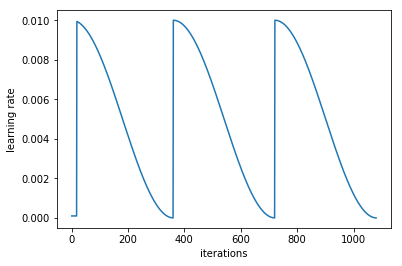

In [94]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [95]:
learn.save('224_lastlayer')

In [96]:
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [97]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [98]:
lr=np.array([1e-4,1e-3,1e-2])

In [99]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:02<13:34,  2.27s/it, loss=0.0691]

  1%|          | 2/360 [00:02<08:18,  1.39s/it, loss=0.113] 

  1%|          | 3/360 [00:03<06:33,  1.10s/it, loss=0.132]

  1%|          | 4/360 [00:03<05:41,  1.04it/s, loss=0.13] 

  1%|▏         | 5/360 [00:04<05:09,  1.15it/s, loss=0.119]

  2%|▏         | 6/360 [00:04<04:47,  1.23it/s, loss=0.107]

  2%|▏         | 7/360 [00:05<04:32,  1.30it/s, loss=0.116]

  2%|▏         | 8/360 [00:05<04:22,  1.34it/s, loss=0.109]

  2%|▎         | 9/360 [00:06<04:13,  1.38it/s, loss=0.107]

  3%|▎         | 10/360 [00:07<04:08,  1.41it/s, loss=0.11]

  3%|▎         | 11/360 [00:07<04:03,  1.43it/s, loss=0.109]

  3%|▎         | 12/360 [00:08<04:00,  1.45it/s, loss=0.117]

  4%|▎         | 13/360 [00:08<03:55,  1.47it/s, loss=0.113]

  4%|▍         | 14/360 [00:09<03:51,  1.49it/s, loss=0.111]

  4%|▍         | 15/360 [00:09<03:48,  1.51it/s, loss=0.108]

  4%|▍         | 16/360 [00:10<03:45,  1.53it/s, loss=0.108]

  5%|▍         | 17/360 [00:11<03:43,  1.54it/s, loss=0.112]

  5%|▌         | 18/360 [00:11<03:40,  1.55it/s, loss=0.112]

  5%|▌         | 19/360 [00:12<03:38,  1.56it/s, loss=0.12] 

  6%|▌         | 20/360 [00:12<03:36,  1.57it/s, loss=0.12]

  6%|▌         | 21/360 [00:13<03:34,  1.58it/s, loss=0.123]

  6%|▌         | 22/360 [00:13<03:32,  1.59it/s, loss=0.121]

  6%|▋         | 23/360 [00:14<03:30,  1.60it/s, loss=0.124]

  7%|▋         | 24/360 [00:14<03:28,  1.61it/s, loss=0.118]

  7%|▋         | 25/360 [00:15<03:27,  1.62it/s, loss=0.114]

  7%|▋         | 26/360 [00:16<03:25,  1.62it/s, loss=0.112]

  8%|▊         | 27/360 [00:16<03:23,  1.63it/s, loss=0.11] 

  8%|▊         | 28/360 [00:17<03:22,  1.64it/s, loss=0.108]

  8%|▊         | 29/360 [00:17<03:21,  1.64it/s, loss=0.105]

  8%|▊         | 30/360 [00:18<03:20,  1.65it/s, loss=0.102]

  9%|▊         | 31/360 [00:18<03:18,  1.66it/s, loss=0.1]  

  9%|▉         | 32/360 [00:19<03:17,  1.66it/s, loss=0.0982]

  9%|▉         | 33/360 [00:19<03:15,  1.67it/s, loss=0.0968]

  9%|▉         | 34/360 [00:20<03:14,  1.67it/s, loss=0.094] 

 10%|▉         | 35/360 [00:20<03:13,  1.68it/s, loss=0.0947]

 10%|█         | 36/360 [00:21<03:12,  1.68it/s, loss=0.0926]

 10%|█         | 37/360 [00:21<03:11,  1.69it/s, loss=0.0903]

 11%|█         | 38/360 [00:22<03:09,  1.70it/s, loss=0.0923]

 11%|█         | 39/360 [00:22<03:08,  1.70it/s, loss=0.0973]

 11%|█         | 40/360 [00:23<03:06,  1.71it/s, loss=0.0956]

 11%|█▏        | 41/360 [00:23<03:05,  1.72it/s, loss=0.0945]

 12%|█▏        | 42/360 [00:24<03:03,  1.73it/s, loss=0.0917]

 12%|█▏        | 43/360 [00:24<03:01,  1.74it/s, loss=0.09]  

 12%|█▏        | 44/360 [00:25<03:00,  1.75it/s, loss=0.092]

 12%|█▎        | 45/360 [00:25<02:58,  1.76it/s, loss=0.0903]

 13%|█▎        | 46/360 [00:25<02:57,  1.77it/s, loss=0.0894]

 13%|█▎        | 47/360 [00:26<02:55,  1.78it/s, loss=0.0882]

 13%|█▎        | 48/360 [00:26<02:54,  1.79it/s, loss=0.0882]

 14%|█▎        | 49/360 [00:27<02:52,  1.80it/s, loss=0.0871]

 14%|█▍        | 50/360 [00:27<02:51,  1.81it/s, loss=0.0867]

 14%|█▍        | 51/360 [00:28<02:50,  1.82it/s, loss=0.0845]

 14%|█▍        | 52/360 [00:28<02:48,  1.83it/s, loss=0.0822]

 15%|█▍        | 53/360 [00:28<02:47,  1.83it/s, loss=0.0822]

 15%|█▌        | 54/360 [00:29<02:46,  1.84it/s, loss=0.0815]

 15%|█▌        | 55/360 [00:29<02:45,  1.85it/s, loss=0.0804]

 16%|█▌        | 56/360 [00:30<02:43,  1.85it/s, loss=0.0807]

 16%|█▌        | 57/360 [00:30<02:42,  1.86it/s, loss=0.081] 

 16%|█▌        | 58/360 [00:31<02:41,  1.87it/s, loss=0.0796]

 16%|█▋        | 59/360 [00:31<02:40,  1.87it/s, loss=0.0817]

 17%|█▋        | 60/360 [00:31<02:39,  1.88it/s, loss=0.0814]

 17%|█▋        | 61/360 [00:32<02:38,  1.89it/s, loss=0.0818]

 17%|█▋        | 62/360 [00:32<02:37,  1.89it/s, loss=0.0805]

 18%|█▊        | 63/360 [00:33<02:36,  1.90it/s, loss=0.0829]

 18%|█▊        | 64/360 [00:33<02:35,  1.90it/s, loss=0.0859]

 18%|█▊        | 65/360 [00:34<02:34,  1.91it/s, loss=0.0861]

 18%|█▊        | 66/360 [00:34<02:33,  1.91it/s, loss=0.085] 

 19%|█▊        | 67/360 [00:34<02:32,  1.92it/s, loss=0.0854]

 19%|█▉        | 68/360 [00:35<02:31,  1.93it/s, loss=0.0841]

 19%|█▉        | 69/360 [00:35<02:30,  1.93it/s, loss=0.082] 

 19%|█▉        | 70/360 [00:36<02:29,  1.94it/s, loss=0.0823]

 20%|█▉        | 71/360 [00:36<02:28,  1.94it/s, loss=0.0824]

 20%|██        | 72/360 [00:37<02:28,  1.94it/s, loss=0.082] 

 20%|██        | 73/360 [00:37<02:27,  1.95it/s, loss=0.082]

 21%|██        | 74/360 [00:37<02:26,  1.95it/s, loss=0.0813]

 21%|██        | 75/360 [00:38<02:25,  1.96it/s, loss=0.0819]

 21%|██        | 76/360 [00:38<02:24,  1.96it/s, loss=0.0834]

 21%|██▏       | 77/360 [00:39<02:23,  1.97it/s, loss=0.0821]

 22%|██▏       | 78/360 [00:39<02:23,  1.97it/s, loss=0.0831]

 22%|██▏       | 79/360 [00:40<02:22,  1.97it/s, loss=0.0875]

 22%|██▏       | 80/360 [00:40<02:21,  1.98it/s, loss=0.0875]

 22%|██▎       | 81/360 [00:42<02:25,  1.92it/s, loss=0.0903]

 23%|██▎       | 82/360 [00:42<02:24,  1.92it/s, loss=0.0884]

 23%|██▎       | 83/360 [00:43<02:24,  1.92it/s, loss=0.0872]

 23%|██▎       | 84/360 [00:43<02:23,  1.92it/s, loss=0.0874]

 24%|██▎       | 85/360 [00:44<02:23,  1.92it/s, loss=0.0857]

 24%|██▍       | 86/360 [00:44<02:22,  1.92it/s, loss=0.0843]

 24%|██▍       | 87/360 [00:45<02:22,  1.92it/s, loss=0.0852]

 24%|██▍       | 88/360 [00:45<02:21,  1.92it/s, loss=0.0866]

 25%|██▍       | 89/360 [00:46<02:21,  1.92it/s, loss=0.0847]

 25%|██▌       | 90/360 [00:46<02:20,  1.92it/s, loss=0.0864]

 25%|██▌       | 91/360 [00:47<02:20,  1.92it/s, loss=0.0853]

 26%|██▌       | 92/360 [00:47<02:19,  1.92it/s, loss=0.0845]

 26%|██▌       | 93/360 [00:48<02:19,  1.92it/s, loss=0.0832]

 26%|██▌       | 94/360 [00:48<02:18,  1.92it/s, loss=0.0814]

 26%|██▋       | 95/360 [00:49<02:18,  1.92it/s, loss=0.0808]

 27%|██▋       | 96/360 [00:50<02:17,  1.92it/s, loss=0.0797]

 27%|██▋       | 97/360 [00:50<02:17,  1.92it/s, loss=0.0806]

 27%|██▋       | 98/360 [00:51<02:16,  1.92it/s, loss=0.0855]

 28%|██▊       | 99/360 [00:51<02:15,  1.92it/s, loss=0.085] 

 28%|██▊       | 100/360 [00:52<02:15,  1.92it/s, loss=0.0839]

 28%|██▊       | 101/360 [00:52<02:14,  1.92it/s, loss=0.0834]

 28%|██▊       | 102/360 [00:53<02:14,  1.92it/s, loss=0.0824]

 29%|██▊       | 103/360 [00:53<02:13,  1.92it/s, loss=0.0814]

 29%|██▉       | 104/360 [00:54<02:13,  1.92it/s, loss=0.0802]

 29%|██▉       | 105/360 [00:54<02:12,  1.92it/s, loss=0.0795]

 29%|██▉       | 106/360 [00:55<02:12,  1.92it/s, loss=0.0784]

 30%|██▉       | 107/360 [00:55<02:11,  1.92it/s, loss=0.0779]

 30%|███       | 108/360 [00:56<02:11,  1.92it/s, loss=0.077] 

 30%|███       | 109/360 [00:56<02:10,  1.92it/s, loss=0.0775]

 31%|███       | 110/360 [00:57<02:10,  1.92it/s, loss=0.0773]

 31%|███       | 111/360 [00:57<02:09,  1.92it/s, loss=0.0763]

 31%|███       | 112/360 [00:58<02:09,  1.92it/s, loss=0.0764]

 31%|███▏      | 113/360 [00:58<02:08,  1.92it/s, loss=0.076] 

 32%|███▏      | 114/360 [00:59<02:08,  1.92it/s, loss=0.0754]

 32%|███▏      | 115/360 [00:59<02:07,  1.92it/s, loss=0.0752]

 32%|███▏      | 116/360 [01:00<02:06,  1.92it/s, loss=0.0777]

 32%|███▎      | 117/360 [01:00<02:06,  1.92it/s, loss=0.0784]

 33%|███▎      | 118/360 [01:01<02:05,  1.92it/s, loss=0.0774]

 33%|███▎      | 119/360 [01:01<02:05,  1.92it/s, loss=0.0772]

 33%|███▎      | 120/360 [01:02<02:04,  1.92it/s, loss=0.0765]

 34%|███▎      | 121/360 [01:02<02:04,  1.92it/s, loss=0.0758]

 34%|███▍      | 122/360 [01:03<02:03,  1.92it/s, loss=0.0745]

 34%|███▍      | 123/360 [01:04<02:03,  1.92it/s, loss=0.076] 

 34%|███▍      | 124/360 [01:04<02:02,  1.92it/s, loss=0.076]

 35%|███▍      | 125/360 [01:04<02:02,  1.92it/s, loss=0.0773]

 35%|███▌      | 126/360 [01:05<02:01,  1.93it/s, loss=0.0768]

 35%|███▌      | 127/360 [01:05<02:00,  1.93it/s, loss=0.0767]

 36%|███▌      | 128/360 [01:06<02:00,  1.93it/s, loss=0.076] 

 36%|███▌      | 129/360 [01:06<01:59,  1.93it/s, loss=0.075]

 36%|███▌      | 130/360 [01:07<01:58,  1.94it/s, loss=0.0742]

 36%|███▋      | 131/360 [01:07<01:58,  1.94it/s, loss=0.0727]

 37%|███▋      | 132/360 [01:08<01:57,  1.94it/s, loss=0.0718]

 37%|███▋      | 133/360 [01:08<01:56,  1.94it/s, loss=0.0719]

 37%|███▋      | 134/360 [01:08<01:56,  1.95it/s, loss=0.0714]

 38%|███▊      | 135/360 [01:09<01:55,  1.95it/s, loss=0.0707]

 38%|███▊      | 136/360 [01:09<01:54,  1.95it/s, loss=0.0702]

 38%|███▊      | 137/360 [01:10<01:54,  1.95it/s, loss=0.069] 

 38%|███▊      | 138/360 [01:10<01:53,  1.95it/s, loss=0.0679]

 39%|███▊      | 139/360 [01:11<01:52,  1.96it/s, loss=0.0667]

 39%|███▉      | 140/360 [01:11<01:52,  1.96it/s, loss=0.0658]

 39%|███▉      | 141/360 [01:11<01:51,  1.96it/s, loss=0.0658]

 39%|███▉      | 142/360 [01:12<01:51,  1.96it/s, loss=0.0648]

 40%|███▉      | 143/360 [01:12<01:50,  1.97it/s, loss=0.0642]

 40%|████      | 144/360 [01:13<01:49,  1.97it/s, loss=0.0633]

 40%|████      | 145/360 [01:13<01:49,  1.97it/s, loss=0.0652]

 41%|████      | 146/360 [01:14<01:48,  1.97it/s, loss=0.0646]

 41%|████      | 147/360 [01:14<01:47,  1.97it/s, loss=0.0663]

 41%|████      | 148/360 [01:14<01:47,  1.98it/s, loss=0.0651]

 41%|████▏     | 149/360 [01:15<01:46,  1.98it/s, loss=0.064] 

 42%|████▏     | 150/360 [01:15<01:46,  1.98it/s, loss=0.0641]

 42%|████▏     | 151/360 [01:16<01:45,  1.98it/s, loss=0.0643]

 42%|████▏     | 152/360 [01:16<01:44,  1.98it/s, loss=0.0635]

 42%|████▎     | 153/360 [01:17<01:44,  1.99it/s, loss=0.0639]

 43%|████▎     | 154/360 [01:17<01:43,  1.99it/s, loss=0.0631]

 43%|████▎     | 155/360 [01:17<01:43,  1.99it/s, loss=0.0636]

 43%|████▎     | 156/360 [01:18<01:42,  1.99it/s, loss=0.0625]

 44%|████▎     | 157/360 [01:18<01:41,  1.99it/s, loss=0.0619]

 44%|████▍     | 158/360 [01:19<01:41,  1.99it/s, loss=0.0628]

 44%|████▍     | 159/360 [01:19<01:40,  2.00it/s, loss=0.0639]

 44%|████▍     | 160/360 [01:20<01:40,  2.00it/s, loss=0.0629]

 45%|████▍     | 161/360 [01:21<01:41,  1.97it/s, loss=0.062] 

 45%|████▌     | 162/360 [01:22<01:40,  1.97it/s, loss=0.0621]

 45%|████▌     | 163/360 [01:22<01:40,  1.97it/s, loss=0.0612]

 46%|████▌     | 164/360 [01:23<01:39,  1.97it/s, loss=0.0601]

 46%|████▌     | 165/360 [01:23<01:39,  1.97it/s, loss=0.0605]

 46%|████▌     | 166/360 [01:24<01:38,  1.97it/s, loss=0.0595]

 46%|████▋     | 167/360 [01:25<01:38,  1.96it/s, loss=0.0594]

 47%|████▋     | 168/360 [01:25<01:37,  1.96it/s, loss=0.0586]

 47%|████▋     | 169/360 [01:26<01:37,  1.96it/s, loss=0.0578]

 47%|████▋     | 170/360 [01:26<01:36,  1.96it/s, loss=0.057] 

 48%|████▊     | 171/360 [01:27<01:36,  1.96it/s, loss=0.0567]

 48%|████▊     | 172/360 [01:27<01:35,  1.96it/s, loss=0.0569]

 48%|████▊     | 173/360 [01:28<01:35,  1.96it/s, loss=0.0594]

 48%|████▊     | 174/360 [01:28<01:34,  1.96it/s, loss=0.0593]

 49%|████▊     | 175/360 [01:29<01:34,  1.96it/s, loss=0.0593]

 49%|████▉     | 176/360 [01:29<01:33,  1.96it/s, loss=0.0602]

 49%|████▉     | 177/360 [01:30<01:33,  1.96it/s, loss=0.0602]

 49%|████▉     | 178/360 [01:30<01:32,  1.96it/s, loss=0.0595]

 50%|████▉     | 179/360 [01:31<01:32,  1.96it/s, loss=0.0596]

 50%|█████     | 180/360 [01:31<01:31,  1.96it/s, loss=0.0587]

 50%|█████     | 181/360 [01:32<01:31,  1.96it/s, loss=0.058] 

 51%|█████     | 182/360 [01:32<01:30,  1.96it/s, loss=0.0585]

 51%|█████     | 183/360 [01:33<01:30,  1.96it/s, loss=0.0575]

 51%|█████     | 184/360 [01:33<01:29,  1.96it/s, loss=0.0572]

 51%|█████▏    | 185/360 [01:34<01:29,  1.96it/s, loss=0.0567]

 52%|█████▏    | 186/360 [01:34<01:28,  1.96it/s, loss=0.0558]

 52%|█████▏    | 187/360 [01:35<01:28,  1.96it/s, loss=0.0549]

 52%|█████▏    | 188/360 [01:35<01:27,  1.96it/s, loss=0.0573]

 52%|█████▎    | 189/360 [01:36<01:27,  1.96it/s, loss=0.0581]

 53%|█████▎    | 190/360 [01:37<01:26,  1.96it/s, loss=0.0592]

 53%|█████▎    | 191/360 [01:37<01:26,  1.96it/s, loss=0.0594]

 53%|█████▎    | 192/360 [01:38<01:25,  1.96it/s, loss=0.0586]

 54%|█████▎    | 193/360 [01:38<01:25,  1.96it/s, loss=0.0617]

 54%|█████▍    | 194/360 [01:39<01:24,  1.96it/s, loss=0.0607]

 54%|█████▍    | 195/360 [01:39<01:24,  1.96it/s, loss=0.0599]

 54%|█████▍    | 196/360 [01:40<01:23,  1.96it/s, loss=0.0598]

 55%|█████▍    | 197/360 [01:40<01:23,  1.96it/s, loss=0.0602]

 55%|█████▌    | 198/360 [01:41<01:22,  1.96it/s, loss=0.0594]

 55%|█████▌    | 199/360 [01:41<01:22,  1.96it/s, loss=0.0583]

 56%|█████▌    | 200/360 [01:42<01:21,  1.96it/s, loss=0.0602]

 56%|█████▌    | 201/360 [01:42<01:21,  1.96it/s, loss=0.0592]

 56%|█████▌    | 202/360 [01:43<01:20,  1.96it/s, loss=0.0592]

 56%|█████▋    | 203/360 [01:43<01:20,  1.96it/s, loss=0.0582]

 57%|█████▋    | 204/360 [01:44<01:19,  1.96it/s, loss=0.0572]

 57%|█████▋    | 205/360 [01:44<01:19,  1.96it/s, loss=0.0564]

 57%|█████▋    | 206/360 [01:45<01:18,  1.96it/s, loss=0.0588]

 57%|█████▊    | 207/360 [01:45<01:18,  1.96it/s, loss=0.0587]

 58%|█████▊    | 208/360 [01:46<01:17,  1.96it/s, loss=0.0585]

 58%|█████▊    | 209/360 [01:46<01:16,  1.96it/s, loss=0.0586]

 58%|█████▊    | 210/360 [01:46<01:16,  1.96it/s, loss=0.0575]

 59%|█████▊    | 211/360 [01:47<01:15,  1.97it/s, loss=0.0567]

 59%|█████▉    | 212/360 [01:47<01:15,  1.97it/s, loss=0.056] 

 59%|█████▉    | 213/360 [01:48<01:14,  1.97it/s, loss=0.0556]

 59%|█████▉    | 214/360 [01:48<01:14,  1.97it/s, loss=0.0546]

 60%|█████▉    | 215/360 [01:49<01:13,  1.97it/s, loss=0.0537]

 60%|██████    | 216/360 [01:49<01:12,  1.97it/s, loss=0.053] 

 60%|██████    | 217/360 [01:49<01:12,  1.97it/s, loss=0.053]

 61%|██████    | 218/360 [01:50<01:11,  1.98it/s, loss=0.0526]

 61%|██████    | 219/360 [01:50<01:11,  1.98it/s, loss=0.0535]

 61%|██████    | 220/360 [01:51<01:10,  1.98it/s, loss=0.0546]

 61%|██████▏   | 221/360 [01:51<01:10,  1.98it/s, loss=0.0543]

 62%|██████▏   | 222/360 [01:52<01:09,  1.98it/s, loss=0.0533]

 62%|██████▏   | 223/360 [01:52<01:09,  1.98it/s, loss=0.0554]

 62%|██████▏   | 224/360 [01:52<01:08,  1.98it/s, loss=0.0546]

 62%|██████▎   | 225/360 [01:53<01:07,  1.99it/s, loss=0.0551]

 63%|██████▎   | 226/360 [01:53<01:07,  1.99it/s, loss=0.0546]

 63%|██████▎   | 227/360 [01:54<01:06,  1.99it/s, loss=0.0539]

 63%|██████▎   | 228/360 [01:54<01:06,  1.99it/s, loss=0.0542]

 64%|██████▎   | 229/360 [01:55<01:05,  1.99it/s, loss=0.0554]

 64%|██████▍   | 230/360 [01:55<01:05,  1.99it/s, loss=0.0547]

 64%|██████▍   | 231/360 [01:55<01:04,  1.99it/s, loss=0.0555]

 64%|██████▍   | 232/360 [01:56<01:04,  1.99it/s, loss=0.0546]

 65%|██████▍   | 233/360 [01:56<01:03,  2.00it/s, loss=0.0547]

 65%|██████▌   | 234/360 [01:57<01:03,  2.00it/s, loss=0.0548]

 65%|██████▌   | 235/360 [01:57<01:02,  2.00it/s, loss=0.0539]

 66%|██████▌   | 236/360 [01:58<01:02,  2.00it/s, loss=0.0539]

 66%|██████▌   | 237/360 [01:58<01:01,  2.00it/s, loss=0.0545]

 66%|██████▌   | 238/360 [01:58<01:00,  2.00it/s, loss=0.0537]

 66%|██████▋   | 239/360 [01:59<01:00,  2.00it/s, loss=0.0531]

 67%|██████▋   | 240/360 [01:59<00:59,  2.00it/s, loss=0.0528]

 67%|██████▋   | 241/360 [02:01<01:00,  1.98it/s, loss=0.0528]

 67%|██████▋   | 242/360 [02:02<00:59,  1.98it/s, loss=0.0538]

 68%|██████▊   | 243/360 [02:02<00:59,  1.98it/s, loss=0.056] 

 68%|██████▊   | 244/360 [02:03<00:58,  1.98it/s, loss=0.0562]

 68%|██████▊   | 245/360 [02:03<00:58,  1.98it/s, loss=0.0583]

 68%|██████▊   | 246/360 [02:04<00:57,  1.98it/s, loss=0.0575]

 69%|██████▊   | 247/360 [02:04<00:57,  1.98it/s, loss=0.058] 

 69%|██████▉   | 248/360 [02:05<00:56,  1.98it/s, loss=0.0576]

 69%|██████▉   | 249/360 [02:05<00:56,  1.98it/s, loss=0.0571]

 69%|██████▉   | 250/360 [02:06<00:55,  1.98it/s, loss=0.0576]

 70%|██████▉   | 251/360 [02:06<00:55,  1.98it/s, loss=0.0584]

 70%|███████   | 252/360 [02:07<00:54,  1.98it/s, loss=0.058] 

 70%|███████   | 253/360 [02:07<00:54,  1.98it/s, loss=0.0578]

 71%|███████   | 254/360 [02:08<00:53,  1.98it/s, loss=0.0567]

 71%|███████   | 255/360 [02:08<00:53,  1.98it/s, loss=0.0559]

 71%|███████   | 256/360 [02:09<00:52,  1.98it/s, loss=0.0551]

 71%|███████▏  | 257/360 [02:09<00:52,  1.98it/s, loss=0.0579]

 72%|███████▏  | 258/360 [02:10<00:51,  1.98it/s, loss=0.0588]

 72%|███████▏  | 259/360 [02:10<00:51,  1.98it/s, loss=0.06]  

 72%|███████▏  | 260/360 [02:11<00:50,  1.98it/s, loss=0.0593]

 72%|███████▎  | 261/360 [02:11<00:50,  1.98it/s, loss=0.0601]

 73%|███████▎  | 262/360 [02:12<00:49,  1.98it/s, loss=0.0599]

 73%|███████▎  | 263/360 [02:12<00:49,  1.98it/s, loss=0.0599]

 73%|███████▎  | 264/360 [02:13<00:48,  1.98it/s, loss=0.0599]

 74%|███████▎  | 265/360 [02:13<00:48,  1.98it/s, loss=0.0607]

 74%|███████▍  | 266/360 [02:14<00:47,  1.98it/s, loss=0.0622]

 74%|███████▍  | 267/360 [02:14<00:47,  1.98it/s, loss=0.0622]

 74%|███████▍  | 268/360 [02:15<00:46,  1.98it/s, loss=0.0627]

 75%|███████▍  | 269/360 [02:15<00:46,  1.98it/s, loss=0.0617]

 75%|███████▌  | 270/360 [02:16<00:45,  1.98it/s, loss=0.0622]

 75%|███████▌  | 271/360 [02:17<00:45,  1.98it/s, loss=0.0615]

 76%|███████▌  | 272/360 [02:17<00:44,  1.98it/s, loss=0.0628]

 76%|███████▌  | 273/360 [02:18<00:44,  1.98it/s, loss=0.0616]

 76%|███████▌  | 274/360 [02:18<00:43,  1.98it/s, loss=0.0616]

 76%|███████▋  | 275/360 [02:19<00:43,  1.98it/s, loss=0.0613]

 77%|███████▋  | 276/360 [02:19<00:42,  1.98it/s, loss=0.0614]

 77%|███████▋  | 277/360 [02:20<00:42,  1.98it/s, loss=0.0614]

 77%|███████▋  | 278/360 [02:20<00:41,  1.98it/s, loss=0.0617]

 78%|███████▊  | 279/360 [02:21<00:40,  1.98it/s, loss=0.0622]

 78%|███████▊  | 280/360 [02:21<00:40,  1.98it/s, loss=0.0613]

 78%|███████▊  | 281/360 [02:22<00:39,  1.98it/s, loss=0.0609]

 78%|███████▊  | 282/360 [02:22<00:39,  1.98it/s, loss=0.0599]

 79%|███████▊  | 283/360 [02:23<00:38,  1.98it/s, loss=0.0591]

 79%|███████▉  | 284/360 [02:23<00:38,  1.98it/s, loss=0.061] 

 79%|███████▉  | 285/360 [02:24<00:37,  1.98it/s, loss=0.0601]

 79%|███████▉  | 286/360 [02:24<00:37,  1.98it/s, loss=0.0601]

 80%|███████▉  | 287/360 [02:25<00:36,  1.98it/s, loss=0.0606]

 80%|████████  | 288/360 [02:25<00:36,  1.98it/s, loss=0.0602]

 80%|████████  | 289/360 [02:25<00:35,  1.98it/s, loss=0.0593]

 81%|████████  | 290/360 [02:26<00:35,  1.98it/s, loss=0.0582]

 81%|████████  | 291/360 [02:26<00:34,  1.98it/s, loss=0.0575]

 81%|████████  | 292/360 [02:27<00:34,  1.98it/s, loss=0.0586]

 81%|████████▏ | 293/360 [02:27<00:33,  1.98it/s, loss=0.0581]

 82%|████████▏ | 294/360 [02:28<00:33,  1.98it/s, loss=0.057] 

 82%|████████▏ | 295/360 [02:28<00:32,  1.99it/s, loss=0.0571]

 82%|████████▏ | 296/360 [02:28<00:32,  1.99it/s, loss=0.0573]

 82%|████████▎ | 297/360 [02:29<00:31,  1.99it/s, loss=0.0579]

 83%|████████▎ | 298/360 [02:29<00:31,  1.99it/s, loss=0.0577]

 83%|████████▎ | 299/360 [02:30<00:30,  1.99it/s, loss=0.0573]

 83%|████████▎ | 300/360 [02:30<00:30,  1.99it/s, loss=0.0568]

 84%|████████▎ | 301/360 [02:31<00:29,  1.99it/s, loss=0.058] 

 84%|████████▍ | 302/360 [02:31<00:29,  1.99it/s, loss=0.0578]

 84%|████████▍ | 303/360 [02:32<00:28,  1.99it/s, loss=0.058] 

 84%|████████▍ | 304/360 [02:32<00:28,  1.99it/s, loss=0.0574]

 85%|████████▍ | 305/360 [02:32<00:27,  2.00it/s, loss=0.0571]

 85%|████████▌ | 306/360 [02:33<00:27,  2.00it/s, loss=0.0569]

 85%|████████▌ | 307/360 [02:33<00:26,  2.00it/s, loss=0.0563]

 86%|████████▌ | 308/360 [02:34<00:26,  2.00it/s, loss=0.058] 

 86%|████████▌ | 309/360 [02:34<00:25,  2.00it/s, loss=0.0573]

 86%|████████▌ | 310/360 [02:35<00:25,  2.00it/s, loss=0.0577]

 86%|████████▋ | 311/360 [02:35<00:24,  2.00it/s, loss=0.0569]

 87%|████████▋ | 312/360 [02:35<00:23,  2.00it/s, loss=0.0575]

 87%|████████▋ | 313/360 [02:36<00:23,  2.00it/s, loss=0.0567]

 87%|████████▋ | 314/360 [02:36<00:22,  2.00it/s, loss=0.056] 

 88%|████████▊ | 315/360 [02:37<00:22,  2.00it/s, loss=0.0553]

 88%|████████▊ | 316/360 [02:37<00:21,  2.01it/s, loss=0.0543]

 88%|████████▊ | 317/360 [02:38<00:21,  2.01it/s, loss=0.0544]

 88%|████████▊ | 318/360 [02:38<00:20,  2.01it/s, loss=0.054] 

 89%|████████▊ | 319/360 [02:38<00:20,  2.01it/s, loss=0.0536]

 89%|████████▉ | 320/360 [02:39<00:19,  2.01it/s, loss=0.0534]

 89%|████████▉ | 321/360 [02:41<00:19,  1.99it/s, loss=0.0533]

 89%|████████▉ | 322/360 [02:41<00:19,  1.99it/s, loss=0.0528]

 90%|████████▉ | 323/360 [02:42<00:18,  1.99it/s, loss=0.0521]

 90%|█████████ | 324/360 [02:42<00:18,  1.99it/s, loss=0.0518]

 90%|█████████ | 325/360 [02:43<00:17,  1.99it/s, loss=0.0517]

 91%|█████████ | 326/360 [02:43<00:17,  1.99it/s, loss=0.0517]

 91%|█████████ | 327/360 [02:44<00:16,  1.99it/s, loss=0.0511]

 91%|█████████ | 328/360 [02:44<00:16,  1.99it/s, loss=0.0539]

 91%|█████████▏| 329/360 [02:45<00:15,  1.99it/s, loss=0.0543]

 92%|█████████▏| 330/360 [02:45<00:15,  1.99it/s, loss=0.0545]

 92%|█████████▏| 331/360 [02:46<00:14,  1.99it/s, loss=0.0544]

 92%|█████████▏| 332/360 [02:46<00:14,  1.99it/s, loss=0.0538]

 92%|█████████▎| 333/360 [02:47<00:13,  1.99it/s, loss=0.0531]

 93%|█████████▎| 334/360 [02:47<00:13,  1.99it/s, loss=0.0523]

 93%|█████████▎| 335/360 [02:48<00:12,  1.99it/s, loss=0.0536]

 93%|█████████▎| 336/360 [02:48<00:12,  1.99it/s, loss=0.0535]

 94%|█████████▎| 337/360 [02:49<00:11,  1.99it/s, loss=0.0527]

 94%|█████████▍| 338/360 [02:49<00:11,  1.99it/s, loss=0.0529]

 94%|█████████▍| 339/360 [02:50<00:10,  1.99it/s, loss=0.0524]

 94%|█████████▍| 340/360 [02:50<00:10,  1.99it/s, loss=0.0514]

 95%|█████████▍| 341/360 [02:51<00:09,  1.99it/s, loss=0.0508]

 95%|█████████▌| 342/360 [02:51<00:09,  1.99it/s, loss=0.0504]

 95%|█████████▌| 343/360 [02:52<00:08,  1.99it/s, loss=0.0501]

 96%|█████████▌| 344/360 [02:52<00:08,  1.99it/s, loss=0.0491]

 96%|█████████▌| 345/360 [02:53<00:07,  1.99it/s, loss=0.0484]

 96%|█████████▌| 346/360 [02:53<00:07,  1.99it/s, loss=0.0479]

 96%|█████████▋| 347/360 [02:53<00:06,  1.99it/s, loss=0.0484]

 97%|█████████▋| 348/360 [02:54<00:06,  2.00it/s, loss=0.0484]

 97%|█████████▋| 349/360 [02:54<00:05,  2.00it/s, loss=0.0476]

 97%|█████████▋| 350/360 [02:55<00:05,  2.00it/s, loss=0.0479]

 98%|█████████▊| 351/360 [02:55<00:04,  2.00it/s, loss=0.0476]

 98%|█████████▊| 352/360 [02:56<00:04,  2.00it/s, loss=0.0476]

 98%|█████████▊| 353/360 [02:56<00:03,  2.00it/s, loss=0.0472]

 98%|█████████▊| 354/360 [02:56<00:02,  2.00it/s, loss=0.0472]

 99%|█████████▊| 355/360 [02:57<00:02,  2.00it/s, loss=0.0473]

 99%|█████████▉| 356/360 [02:57<00:01,  2.00it/s, loss=0.0466]

 99%|█████████▉| 357/360 [02:58<00:01,  2.00it/s, loss=0.0499]

 99%|█████████▉| 358/360 [02:58<00:00,  2.00it/s, loss=0.049] 

100%|█████████▉| 359/360 [02:59<00:00,  2.00it/s, loss=0.0494]

100%|██████████| 360/360 [02:59<00:00,  2.01it/s, loss=0.0484]

epoch      trn_loss   val_loss   accuracy   

    0      0.048391   0.026249   0.99      

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:01<10:41,  1.79s/it, loss=0.0482]

  1%|          | 2/360 [00:02<06:50,  1.15s/it, loss=0.0475]

  1%|          | 3/360 [00:02<05:36,  1.06it/s, loss=0.0466]

  1%|          | 4/360 [00:03<04:57,  1.20it/s, loss=0.0477]

  1%|▏         | 5/360 [00:03<04:33,  1.30it/s, loss=0.0472]

  2%|▏         | 6/360 [00:04<04:19,  1.36it/s, loss=0.0469]

  2%|▏         | 7/360 [00:04<04:08,  1.42it/s, loss=0.046] 

  2%|▏         | 8/360 [00:05<03:59,  1.47it/s, loss=0.0455]

  2%|▎         | 9/360 [00:05<03:51,  1.51it/s, loss=0.0454]

  3%|▎         | 10/360 [00:06<03:45,  1.55it/s, loss=0.0447]

  3%|▎         | 11/360 [00:06<03:41,  1.57it/s, loss=0.045] 

  3%|▎         | 12/360 [00:07<03:38,  1.60it/s, loss=0.0505]

  4%|▎         | 13/360 [00:08<03:34,  1.62it/s, loss=0.05]  

  4%|▍         | 14/360 [00:08<03:31,  1.64it/s, loss=0.0494]

  4%|▍         | 15/360 [00:09<03:28,  1.65it/s, loss=0.0492]

  4%|▍         | 16/360 [00:09<03:26,  1.67it/s, loss=0.0491]

  5%|▍         | 17/360 [00:10<03:23,  1.68it/s, loss=0.0508]

  5%|▌         | 18/360 [00:10<03:21,  1.69it/s, loss=0.0511]

  5%|▌         | 19/360 [00:11<03:19,  1.71it/s, loss=0.0503]

  6%|▌         | 20/360 [00:11<03:17,  1.72it/s, loss=0.0495]

  6%|▌         | 21/360 [00:12<03:16,  1.73it/s, loss=0.0508]

  6%|▌         | 22/360 [00:12<03:14,  1.73it/s, loss=0.0505]

  6%|▋         | 23/360 [00:13<03:13,  1.74it/s, loss=0.0496]

  7%|▋         | 24/360 [00:13<03:12,  1.75it/s, loss=0.0498]

  7%|▋         | 25/360 [00:14<03:10,  1.76it/s, loss=0.0503]

  7%|▋         | 26/360 [00:14<03:09,  1.76it/s, loss=0.053] 

  8%|▊         | 27/360 [00:15<03:08,  1.76it/s, loss=0.0523]

  8%|▊         | 28/360 [00:15<03:07,  1.77it/s, loss=0.0521]

  8%|▊         | 29/360 [00:16<03:06,  1.78it/s, loss=0.0512]

  8%|▊         | 30/360 [00:16<03:05,  1.78it/s, loss=0.0512]

  9%|▊         | 31/360 [00:17<03:04,  1.78it/s, loss=0.0507]

  9%|▉         | 32/360 [00:17<03:03,  1.79it/s, loss=0.0498]

  9%|▉         | 33/360 [00:18<03:02,  1.79it/s, loss=0.0492]

  9%|▉         | 34/360 [00:18<03:01,  1.80it/s, loss=0.0483]

 10%|▉         | 35/360 [00:19<03:00,  1.80it/s, loss=0.0508]

 10%|█         | 36/360 [00:19<02:59,  1.81it/s, loss=0.0524]

 10%|█         | 37/360 [00:20<02:58,  1.81it/s, loss=0.0517]

 11%|█         | 38/360 [00:20<02:57,  1.81it/s, loss=0.0509]

 11%|█         | 39/360 [00:21<02:56,  1.82it/s, loss=0.0505]

 11%|█         | 40/360 [00:22<02:56,  1.82it/s, loss=0.0507]

 11%|█▏        | 41/360 [00:22<02:55,  1.82it/s, loss=0.05]  

 12%|█▏        | 42/360 [00:23<02:54,  1.82it/s, loss=0.0499]

 12%|█▏        | 43/360 [00:23<02:53,  1.83it/s, loss=0.049] 

 12%|█▏        | 44/360 [00:24<02:52,  1.83it/s, loss=0.0481]

 12%|█▎        | 45/360 [00:24<02:51,  1.83it/s, loss=0.0473]

 13%|█▎        | 46/360 [00:25<02:50,  1.84it/s, loss=0.0464]

 13%|█▎        | 47/360 [00:25<02:49,  1.85it/s, loss=0.0465]

 13%|█▎        | 48/360 [00:25<02:48,  1.85it/s, loss=0.046] 

 14%|█▎        | 49/360 [00:26<02:47,  1.86it/s, loss=0.0452]

 14%|█▍        | 50/360 [00:26<02:46,  1.87it/s, loss=0.0461]

 14%|█▍        | 51/360 [00:27<02:44,  1.87it/s, loss=0.0482]

 14%|█▍        | 52/360 [00:27<02:43,  1.88it/s, loss=0.0478]

 15%|█▍        | 53/360 [00:28<02:42,  1.89it/s, loss=0.0474]

 15%|█▌        | 54/360 [00:28<02:41,  1.90it/s, loss=0.0477]

 15%|█▌        | 55/360 [00:28<02:40,  1.90it/s, loss=0.0471]

 16%|█▌        | 56/360 [00:29<02:39,  1.91it/s, loss=0.0471]

 16%|█▌        | 57/360 [00:29<02:38,  1.91it/s, loss=0.0468]

 16%|█▌        | 58/360 [00:30<02:37,  1.92it/s, loss=0.0467]

 16%|█▋        | 59/360 [00:30<02:36,  1.93it/s, loss=0.0485]

 17%|█▋        | 60/360 [00:31<02:35,  1.93it/s, loss=0.0477]

 17%|█▋        | 61/360 [00:31<02:34,  1.94it/s, loss=0.0473]

 17%|█▋        | 62/360 [00:31<02:33,  1.94it/s, loss=0.0477]

 18%|█▊        | 63/360 [00:32<02:32,  1.95it/s, loss=0.047] 

 18%|█▊        | 64/360 [00:32<02:31,  1.95it/s, loss=0.0466]

 18%|█▊        | 65/360 [00:33<02:30,  1.96it/s, loss=0.0465]

 18%|█▊        | 66/360 [00:33<02:29,  1.96it/s, loss=0.0457]

 19%|█▊        | 67/360 [00:34<02:28,  1.97it/s, loss=0.0456]

 19%|█▉        | 68/360 [00:34<02:28,  1.97it/s, loss=0.0463]

 19%|█▉        | 69/360 [00:34<02:27,  1.98it/s, loss=0.0456]

 19%|█▉        | 70/360 [00:35<02:26,  1.98it/s, loss=0.0449]

 20%|█▉        | 71/360 [00:35<02:25,  1.98it/s, loss=0.0444]

 20%|██        | 72/360 [00:36<02:24,  1.99it/s, loss=0.0437]

 20%|██        | 73/360 [00:36<02:24,  1.99it/s, loss=0.0437]

 21%|██        | 74/360 [00:37<02:23,  2.00it/s, loss=0.0461]

 21%|██        | 75/360 [00:37<02:22,  2.00it/s, loss=0.0463]

 21%|██        | 76/360 [00:37<02:21,  2.00it/s, loss=0.0468]

 21%|██▏       | 77/360 [00:38<02:21,  2.01it/s, loss=0.0471]

 22%|██▏       | 78/360 [00:38<02:20,  2.01it/s, loss=0.0487]

 22%|██▏       | 79/360 [00:39<02:19,  2.01it/s, loss=0.0488]

 22%|██▏       | 80/360 [00:39<02:18,  2.02it/s, loss=0.0499]

 22%|██▎       | 81/360 [00:41<02:22,  1.96it/s, loss=0.05]  

 23%|██▎       | 82/360 [00:41<02:22,  1.96it/s, loss=0.0501]

 23%|██▎       | 83/360 [00:42<02:21,  1.96it/s, loss=0.0496]

 23%|██▎       | 84/360 [00:42<02:21,  1.96it/s, loss=0.0496]

 24%|██▎       | 85/360 [00:43<02:20,  1.96it/s, loss=0.0491]

 24%|██▍       | 86/360 [00:43<02:20,  1.96it/s, loss=0.0488]

 24%|██▍       | 87/360 [00:44<02:19,  1.96it/s, loss=0.048] 

 24%|██▍       | 88/360 [00:45<02:19,  1.95it/s, loss=0.0474]

 25%|██▍       | 89/360 [00:45<02:18,  1.95it/s, loss=0.0465]

 25%|██▌       | 90/360 [00:46<02:18,  1.95it/s, loss=0.0476]

 25%|██▌       | 91/360 [00:46<02:17,  1.95it/s, loss=0.0471]

 26%|██▌       | 92/360 [00:47<02:17,  1.95it/s, loss=0.0484]

 26%|██▌       | 93/360 [00:47<02:16,  1.95it/s, loss=0.0481]

 26%|██▌       | 94/360 [00:48<02:16,  1.95it/s, loss=0.0487]

 26%|██▋       | 95/360 [00:48<02:15,  1.95it/s, loss=0.0481]

 27%|██▋       | 96/360 [00:49<02:15,  1.95it/s, loss=0.0474]

 27%|██▋       | 97/360 [00:49<02:14,  1.95it/s, loss=0.0482]

 27%|██▋       | 98/360 [00:50<02:14,  1.95it/s, loss=0.0473]

 28%|██▊       | 99/360 [00:50<02:13,  1.95it/s, loss=0.0465]

 28%|██▊       | 100/360 [00:51<02:13,  1.95it/s, loss=0.0457]

 28%|██▊       | 101/360 [00:51<02:12,  1.95it/s, loss=0.045] 

 28%|██▊       | 102/360 [00:52<02:12,  1.95it/s, loss=0.045]

 29%|██▊       | 103/360 [00:52<02:11,  1.95it/s, loss=0.0448]

 29%|██▉       | 104/360 [00:53<02:11,  1.95it/s, loss=0.044] 

 29%|██▉       | 105/360 [00:53<02:10,  1.95it/s, loss=0.0446]

 29%|██▉       | 106/360 [00:54<02:10,  1.95it/s, loss=0.0441]

 30%|██▉       | 107/360 [00:55<02:10,  1.94it/s, loss=0.0445]

 30%|███       | 108/360 [00:55<02:09,  1.94it/s, loss=0.0456]

 30%|███       | 109/360 [00:56<02:09,  1.94it/s, loss=0.0458]

 31%|███       | 110/360 [00:56<02:08,  1.94it/s, loss=0.0455]

 31%|███       | 111/360 [00:57<02:08,  1.94it/s, loss=0.045] 

 31%|███       | 112/360 [00:57<02:07,  1.94it/s, loss=0.0448]

 31%|███▏      | 113/360 [00:58<02:07,  1.94it/s, loss=0.0465]

 32%|███▏      | 114/360 [00:58<02:06,  1.94it/s, loss=0.0461]

 32%|███▏      | 115/360 [00:59<02:06,  1.94it/s, loss=0.047] 

 32%|███▏      | 116/360 [00:59<02:06,  1.94it/s, loss=0.047]

 32%|███▎      | 117/360 [01:00<02:05,  1.94it/s, loss=0.0466]

 33%|███▎      | 118/360 [01:01<02:05,  1.93it/s, loss=0.0462]

 33%|███▎      | 119/360 [01:01<02:04,  1.93it/s, loss=0.0464]

 33%|███▎      | 120/360 [01:02<02:04,  1.93it/s, loss=0.0464]

 34%|███▎      | 121/360 [01:02<02:03,  1.93it/s, loss=0.0482]

 34%|███▍      | 122/360 [01:03<02:03,  1.93it/s, loss=0.0475]

 34%|███▍      | 123/360 [01:03<02:02,  1.93it/s, loss=0.047] 

 34%|███▍      | 124/360 [01:04<02:02,  1.93it/s, loss=0.0466]

 35%|███▍      | 125/360 [01:04<02:01,  1.93it/s, loss=0.046] 

 35%|███▌      | 126/360 [01:05<02:00,  1.94it/s, loss=0.0467]

 35%|███▌      | 127/360 [01:05<02:00,  1.94it/s, loss=0.048] 

 36%|███▌      | 128/360 [01:05<01:59,  1.94it/s, loss=0.0472]

 36%|███▌      | 129/360 [01:06<01:58,  1.94it/s, loss=0.0476]

 36%|███▌      | 130/360 [01:06<01:58,  1.95it/s, loss=0.047] 

 36%|███▋      | 131/360 [01:07<01:57,  1.95it/s, loss=0.0464]

 37%|███▋      | 132/360 [01:07<01:56,  1.95it/s, loss=0.0475]

 37%|███▋      | 133/360 [01:08<01:56,  1.95it/s, loss=0.0474]

 37%|███▋      | 134/360 [01:08<01:55,  1.96it/s, loss=0.0466]

 38%|███▊      | 135/360 [01:08<01:54,  1.96it/s, loss=0.0457]

 38%|███▊      | 136/360 [01:09<01:54,  1.96it/s, loss=0.0454]

 38%|███▊      | 137/360 [01:09<01:53,  1.96it/s, loss=0.046] 

 38%|███▊      | 138/360 [01:10<01:53,  1.96it/s, loss=0.0451]

 39%|███▊      | 139/360 [01:10<01:52,  1.97it/s, loss=0.0454]

 39%|███▉      | 140/360 [01:11<01:51,  1.97it/s, loss=0.0461]

 39%|███▉      | 141/360 [01:11<01:51,  1.97it/s, loss=0.0458]

 39%|███▉      | 142/360 [01:11<01:50,  1.97it/s, loss=0.0451]

 40%|███▉      | 143/360 [01:12<01:49,  1.98it/s, loss=0.0452]

 40%|████      | 144/360 [01:12<01:49,  1.98it/s, loss=0.0449]

 40%|████      | 145/360 [01:13<01:48,  1.98it/s, loss=0.0441]

 41%|████      | 146/360 [01:13<01:48,  1.98it/s, loss=0.044] 

 41%|████      | 147/360 [01:14<01:47,  1.98it/s, loss=0.045]

 41%|████      | 148/360 [01:14<01:46,  1.99it/s, loss=0.0451]

 41%|████▏     | 149/360 [01:14<01:46,  1.99it/s, loss=0.045] 

 42%|████▏     | 150/360 [01:15<01:45,  1.99it/s, loss=0.047]

 42%|████▏     | 151/360 [01:15<01:44,  1.99it/s, loss=0.0465]

 42%|████▏     | 152/360 [01:16<01:44,  1.99it/s, loss=0.047] 

 42%|████▎     | 153/360 [01:16<01:43,  1.99it/s, loss=0.0472]

 43%|████▎     | 154/360 [01:17<01:43,  2.00it/s, loss=0.0475]

 43%|████▎     | 155/360 [01:17<01:42,  2.00it/s, loss=0.047] 

 43%|████▎     | 156/360 [01:17<01:41,  2.00it/s, loss=0.047]

 44%|████▎     | 157/360 [01:18<01:41,  2.00it/s, loss=0.0463]

 44%|████▍     | 158/360 [01:18<01:40,  2.00it/s, loss=0.0455]

 44%|████▍     | 159/360 [01:19<01:40,  2.01it/s, loss=0.0463]

 44%|████▍     | 160/360 [01:19<01:39,  2.01it/s, loss=0.0468]

 45%|████▍     | 161/360 [01:21<01:40,  1.97it/s, loss=0.0501]

 45%|████▌     | 162/360 [01:22<01:40,  1.97it/s, loss=0.0508]

 45%|████▌     | 163/360 [01:22<01:39,  1.97it/s, loss=0.0503]

 46%|████▌     | 164/360 [01:23<01:39,  1.97it/s, loss=0.0505]

 46%|████▌     | 165/360 [01:23<01:38,  1.97it/s, loss=0.0497]

 46%|████▌     | 166/360 [01:24<01:38,  1.97it/s, loss=0.0493]

 46%|████▋     | 167/360 [01:24<01:37,  1.97it/s, loss=0.0502]

 47%|████▋     | 168/360 [01:25<01:37,  1.97it/s, loss=0.0494]

 47%|████▋     | 169/360 [01:25<01:36,  1.97it/s, loss=0.0496]

 47%|████▋     | 170/360 [01:26<01:36,  1.97it/s, loss=0.0488]

 48%|████▊     | 171/360 [01:26<01:35,  1.97it/s, loss=0.0493]

 48%|████▊     | 172/360 [01:27<01:35,  1.97it/s, loss=0.0485]

 48%|████▊     | 173/360 [01:27<01:34,  1.97it/s, loss=0.049] 

 48%|████▊     | 174/360 [01:28<01:34,  1.97it/s, loss=0.0503]

 49%|████▊     | 175/360 [01:28<01:33,  1.97it/s, loss=0.0495]

 49%|████▉     | 176/360 [01:29<01:33,  1.97it/s, loss=0.0495]

 49%|████▉     | 177/360 [01:29<01:32,  1.97it/s, loss=0.0493]

 49%|████▉     | 178/360 [01:30<01:32,  1.97it/s, loss=0.0525]

 50%|████▉     | 179/360 [01:30<01:31,  1.97it/s, loss=0.0523]

 50%|█████     | 180/360 [01:31<01:31,  1.97it/s, loss=0.0518]

 50%|█████     | 181/360 [01:31<01:30,  1.97it/s, loss=0.0509]

 51%|█████     | 182/360 [01:32<01:30,  1.97it/s, loss=0.05]  

 51%|█████     | 183/360 [01:32<01:29,  1.97it/s, loss=0.05]

 51%|█████     | 184/360 [01:33<01:29,  1.97it/s, loss=0.0508]

 51%|█████▏    | 185/360 [01:33<01:28,  1.97it/s, loss=0.05]  

 52%|█████▏    | 186/360 [01:34<01:28,  1.97it/s, loss=0.0494]

 52%|█████▏    | 187/360 [01:35<01:27,  1.97it/s, loss=0.0487]

 52%|█████▏    | 188/360 [01:35<01:27,  1.97it/s, loss=0.0486]

 52%|█████▎    | 189/360 [01:36<01:26,  1.97it/s, loss=0.0495]

 53%|█████▎    | 190/360 [01:36<01:26,  1.97it/s, loss=0.0487]

 53%|█████▎    | 191/360 [01:37<01:25,  1.97it/s, loss=0.0483]

 53%|█████▎    | 192/360 [01:37<01:25,  1.97it/s, loss=0.0475]

 54%|█████▎    | 193/360 [01:38<01:24,  1.97it/s, loss=0.0469]

 54%|█████▍    | 194/360 [01:38<01:24,  1.97it/s, loss=0.0469]

 54%|█████▍    | 195/360 [01:39<01:23,  1.97it/s, loss=0.0465]

 54%|█████▍    | 196/360 [01:39<01:23,  1.97it/s, loss=0.0463]

 55%|█████▍    | 197/360 [01:40<01:22,  1.96it/s, loss=0.0461]

 55%|█████▌    | 198/360 [01:40<01:22,  1.96it/s, loss=0.0455]

 55%|█████▌    | 199/360 [01:41<01:21,  1.96it/s, loss=0.0456]

 56%|█████▌    | 200/360 [01:41<01:21,  1.96it/s, loss=0.0458]

 56%|█████▌    | 201/360 [01:42<01:20,  1.96it/s, loss=0.0451]

 56%|█████▌    | 202/360 [01:42<01:20,  1.96it/s, loss=0.0445]

 56%|█████▋    | 203/360 [01:43<01:19,  1.96it/s, loss=0.0452]

 57%|█████▋    | 204/360 [01:43<01:19,  1.96it/s, loss=0.0449]

 57%|█████▋    | 205/360 [01:44<01:18,  1.97it/s, loss=0.0441]

 57%|█████▋    | 206/360 [01:44<01:18,  1.97it/s, loss=0.0438]

 57%|█████▊    | 207/360 [01:45<01:17,  1.97it/s, loss=0.0468]

 58%|█████▊    | 208/360 [01:45<01:17,  1.97it/s, loss=0.0471]

 58%|█████▊    | 209/360 [01:46<01:16,  1.97it/s, loss=0.0474]

 58%|█████▊    | 210/360 [01:46<01:16,  1.97it/s, loss=0.0474]

 59%|█████▊    | 211/360 [01:46<01:15,  1.97it/s, loss=0.0476]

 59%|█████▉    | 212/360 [01:47<01:14,  1.97it/s, loss=0.0469]

 59%|█████▉    | 213/360 [01:47<01:14,  1.98it/s, loss=0.0461]

 59%|█████▉    | 214/360 [01:48<01:13,  1.98it/s, loss=0.0453]

 60%|█████▉    | 215/360 [01:48<01:13,  1.98it/s, loss=0.0465]

 60%|██████    | 216/360 [01:49<01:12,  1.98it/s, loss=0.0483]

 60%|██████    | 217/360 [01:49<01:12,  1.98it/s, loss=0.0475]

 61%|██████    | 218/360 [01:49<01:11,  1.98it/s, loss=0.0488]

 61%|██████    | 219/360 [01:50<01:11,  1.98it/s, loss=0.0485]

 61%|██████    | 220/360 [01:50<01:10,  1.98it/s, loss=0.0481]

 61%|██████▏   | 221/360 [01:51<01:09,  1.99it/s, loss=0.0478]

 62%|██████▏   | 222/360 [01:51<01:09,  1.99it/s, loss=0.0482]

 62%|██████▏   | 223/360 [01:52<01:08,  1.99it/s, loss=0.0481]

 62%|██████▏   | 224/360 [01:52<01:08,  1.99it/s, loss=0.0479]

 62%|██████▎   | 225/360 [01:52<01:07,  1.99it/s, loss=0.0474]

 63%|██████▎   | 226/360 [01:53<01:07,  1.99it/s, loss=0.0467]

 63%|██████▎   | 227/360 [01:53<01:06,  1.99it/s, loss=0.0458]

 63%|██████▎   | 228/360 [01:54<01:06,  1.99it/s, loss=0.0458]

 64%|██████▎   | 229/360 [01:54<01:05,  2.00it/s, loss=0.0463]

 64%|██████▍   | 230/360 [01:55<01:05,  2.00it/s, loss=0.0455]

 64%|██████▍   | 231/360 [01:55<01:04,  2.00it/s, loss=0.0447]

 64%|██████▍   | 232/360 [01:56<01:04,  2.00it/s, loss=0.0462]

 65%|██████▍   | 233/360 [01:56<01:03,  2.00it/s, loss=0.0461]

 65%|██████▌   | 234/360 [01:56<01:02,  2.00it/s, loss=0.0478]

 65%|██████▌   | 235/360 [01:57<01:02,  2.00it/s, loss=0.0472]

 66%|██████▌   | 236/360 [01:57<01:01,  2.00it/s, loss=0.0466]

 66%|██████▌   | 237/360 [01:58<01:01,  2.01it/s, loss=0.0462]

 66%|██████▌   | 238/360 [01:58<01:00,  2.01it/s, loss=0.0454]

 66%|██████▋   | 239/360 [01:59<01:00,  2.01it/s, loss=0.0451]

 67%|██████▋   | 240/360 [01:59<00:59,  2.01it/s, loss=0.0457]

 67%|██████▋   | 241/360 [02:01<00:59,  1.99it/s, loss=0.0488]

 67%|██████▋   | 242/360 [02:01<00:59,  1.99it/s, loss=0.049] 

 68%|██████▊   | 243/360 [02:02<00:58,  1.99it/s, loss=0.0482]

 68%|██████▊   | 244/360 [02:02<00:58,  1.99it/s, loss=0.048] 

 68%|██████▊   | 245/360 [02:03<00:57,  1.99it/s, loss=0.0477]

 68%|██████▊   | 246/360 [02:03<00:57,  1.99it/s, loss=0.0469]

 69%|██████▊   | 247/360 [02:04<00:56,  1.99it/s, loss=0.0468]

 69%|██████▉   | 248/360 [02:04<00:56,  1.99it/s, loss=0.0462]

 69%|██████▉   | 249/360 [02:05<00:55,  1.99it/s, loss=0.0454]

 69%|██████▉   | 250/360 [02:05<00:55,  1.99it/s, loss=0.0447]

 70%|██████▉   | 251/360 [02:06<00:54,  1.98it/s, loss=0.0438]

 70%|███████   | 252/360 [02:07<00:54,  1.98it/s, loss=0.0431]

 70%|███████   | 253/360 [02:07<00:53,  1.98it/s, loss=0.0428]

 71%|███████   | 254/360 [02:08<00:53,  1.98it/s, loss=0.0452]

 71%|███████   | 255/360 [02:08<00:52,  1.98it/s, loss=0.0451]

 71%|███████   | 256/360 [02:09<00:52,  1.98it/s, loss=0.0463]

 71%|███████▏  | 257/360 [02:09<00:51,  1.98it/s, loss=0.0475]

 72%|███████▏  | 258/360 [02:10<00:51,  1.98it/s, loss=0.0468]

 72%|███████▏  | 259/360 [02:10<00:50,  1.98it/s, loss=0.0465]

 72%|███████▏  | 260/360 [02:11<00:50,  1.98it/s, loss=0.0457]

 72%|███████▎  | 261/360 [02:11<00:49,  1.98it/s, loss=0.0459]

 73%|███████▎  | 262/360 [02:12<00:49,  1.98it/s, loss=0.0472]

 73%|███████▎  | 263/360 [02:12<00:48,  1.98it/s, loss=0.0469]

 73%|███████▎  | 264/360 [02:13<00:48,  1.98it/s, loss=0.0461]

 74%|███████▎  | 265/360 [02:13<00:47,  1.98it/s, loss=0.0458]

 74%|███████▍  | 266/360 [02:14<00:47,  1.98it/s, loss=0.0451]

 74%|███████▍  | 267/360 [02:14<00:46,  1.98it/s, loss=0.0446]

 74%|███████▍  | 268/360 [02:15<00:46,  1.98it/s, loss=0.044] 

 75%|███████▍  | 269/360 [02:15<00:45,  1.98it/s, loss=0.0432]

 75%|███████▌  | 270/360 [02:16<00:45,  1.98it/s, loss=0.0424]

 75%|███████▌  | 271/360 [02:16<00:44,  1.98it/s, loss=0.0421]

 76%|███████▌  | 272/360 [02:17<00:44,  1.98it/s, loss=0.043] 

 76%|███████▌  | 273/360 [02:17<00:43,  1.98it/s, loss=0.0431]

 76%|███████▌  | 274/360 [02:18<00:43,  1.98it/s, loss=0.0436]

 76%|███████▋  | 275/360 [02:19<00:42,  1.98it/s, loss=0.0434]

 77%|███████▋  | 276/360 [02:19<00:42,  1.98it/s, loss=0.0437]

 77%|███████▋  | 277/360 [02:20<00:41,  1.98it/s, loss=0.045] 

 77%|███████▋  | 278/360 [02:20<00:41,  1.98it/s, loss=0.0445]

 78%|███████▊  | 279/360 [02:21<00:40,  1.98it/s, loss=0.0465]

 78%|███████▊  | 280/360 [02:21<00:40,  1.98it/s, loss=0.0457]

 78%|███████▊  | 281/360 [02:22<00:39,  1.98it/s, loss=0.0463]

 78%|███████▊  | 282/360 [02:22<00:39,  1.98it/s, loss=0.0461]

 79%|███████▊  | 283/360 [02:23<00:38,  1.98it/s, loss=0.0465]

 79%|███████▉  | 284/360 [02:23<00:38,  1.98it/s, loss=0.0463]

 79%|███████▉  | 285/360 [02:24<00:37,  1.98it/s, loss=0.0466]

 79%|███████▉  | 286/360 [02:24<00:37,  1.98it/s, loss=0.0473]

 80%|███████▉  | 287/360 [02:25<00:36,  1.98it/s, loss=0.0472]

 80%|████████  | 288/360 [02:25<00:36,  1.98it/s, loss=0.0467]

 80%|████████  | 289/360 [02:25<00:35,  1.98it/s, loss=0.0459]

 81%|████████  | 290/360 [02:26<00:35,  1.98it/s, loss=0.0452]

 81%|████████  | 291/360 [02:26<00:34,  1.98it/s, loss=0.0447]

 81%|████████  | 292/360 [02:27<00:34,  1.98it/s, loss=0.045] 

 81%|████████▏ | 293/360 [02:27<00:33,  1.99it/s, loss=0.0449]

 82%|████████▏ | 294/360 [02:28<00:33,  1.99it/s, loss=0.0454]

 82%|████████▏ | 295/360 [02:28<00:32,  1.99it/s, loss=0.0454]

 82%|████████▏ | 296/360 [02:28<00:32,  1.99it/s, loss=0.0452]

 82%|████████▎ | 297/360 [02:29<00:31,  1.99it/s, loss=0.0454]

 83%|████████▎ | 298/360 [02:29<00:31,  1.99it/s, loss=0.0454]

 83%|████████▎ | 299/360 [02:30<00:30,  1.99it/s, loss=0.0459]

 83%|████████▎ | 300/360 [02:30<00:30,  1.99it/s, loss=0.0451]

 84%|████████▎ | 301/360 [02:31<00:29,  1.99it/s, loss=0.0443]

 84%|████████▍ | 302/360 [02:31<00:29,  1.99it/s, loss=0.044] 

 84%|████████▍ | 303/360 [02:31<00:28,  1.99it/s, loss=0.0432]

 84%|████████▍ | 304/360 [02:32<00:28,  2.00it/s, loss=0.0425]

 85%|████████▍ | 305/360 [02:32<00:27,  2.00it/s, loss=0.0427]

 85%|████████▌ | 306/360 [02:33<00:27,  2.00it/s, loss=0.0439]

 85%|████████▌ | 307/360 [02:33<00:26,  2.00it/s, loss=0.0447]

 86%|████████▌ | 308/360 [02:34<00:26,  2.00it/s, loss=0.0442]

 86%|████████▌ | 309/360 [02:34<00:25,  2.00it/s, loss=0.0437]

 86%|████████▌ | 310/360 [02:34<00:24,  2.00it/s, loss=0.0432]

 86%|████████▋ | 311/360 [02:35<00:24,  2.00it/s, loss=0.0442]

 87%|████████▋ | 312/360 [02:35<00:23,  2.00it/s, loss=0.0435]

 87%|████████▋ | 313/360 [02:36<00:23,  2.00it/s, loss=0.044] 

 87%|████████▋ | 314/360 [02:36<00:22,  2.00it/s, loss=0.0434]

 88%|████████▊ | 315/360 [02:37<00:22,  2.01it/s, loss=0.0426]

 88%|████████▊ | 316/360 [02:37<00:21,  2.01it/s, loss=0.0423]

 88%|████████▊ | 317/360 [02:37<00:21,  2.01it/s, loss=0.0417]

 88%|████████▊ | 318/360 [02:38<00:20,  2.01it/s, loss=0.0418]

 89%|████████▊ | 319/360 [02:38<00:20,  2.01it/s, loss=0.0416]

 89%|████████▉ | 320/360 [02:39<00:19,  2.01it/s, loss=0.0417]

 89%|████████▉ | 321/360 [02:41<00:19,  1.99it/s, loss=0.0425]

 89%|████████▉ | 322/360 [02:41<00:19,  1.99it/s, loss=0.0417]

 90%|████████▉ | 323/360 [02:42<00:18,  1.99it/s, loss=0.0411]

 90%|█████████ | 324/360 [02:42<00:18,  1.99it/s, loss=0.0406]

 90%|█████████ | 325/360 [02:43<00:17,  1.99it/s, loss=0.04]  

 91%|█████████ | 326/360 [02:43<00:17,  1.99it/s, loss=0.0396]

 91%|█████████ | 327/360 [02:44<00:16,  1.99it/s, loss=0.0407]

 91%|█████████ | 328/360 [02:44<00:16,  1.99it/s, loss=0.0405]

 91%|█████████▏| 329/360 [02:45<00:15,  1.99it/s, loss=0.0399]

 92%|█████████▏| 330/360 [02:45<00:15,  1.99it/s, loss=0.0391]

 92%|█████████▏| 331/360 [02:46<00:14,  1.99it/s, loss=0.0386]

 92%|█████████▏| 332/360 [02:46<00:14,  1.99it/s, loss=0.0381]

 92%|█████████▎| 333/360 [02:47<00:13,  1.99it/s, loss=0.0377]

 93%|█████████▎| 334/360 [02:47<00:13,  1.99it/s, loss=0.0377]

 93%|█████████▎| 335/360 [02:48<00:12,  1.99it/s, loss=0.0372]

 93%|█████████▎| 336/360 [02:48<00:12,  1.99it/s, loss=0.0391]

 94%|█████████▎| 337/360 [02:49<00:11,  1.99it/s, loss=0.0386]

 94%|█████████▍| 338/360 [02:49<00:11,  1.99it/s, loss=0.038] 

 94%|█████████▍| 339/360 [02:50<00:10,  1.99it/s, loss=0.0385]

 94%|█████████▍| 340/360 [02:50<00:10,  1.99it/s, loss=0.0393]

 95%|█████████▍| 341/360 [02:51<00:09,  1.99it/s, loss=0.0387]

 95%|█████████▌| 342/360 [02:51<00:09,  1.99it/s, loss=0.0402]

 95%|█████████▌| 343/360 [02:52<00:08,  1.99it/s, loss=0.0409]

 96%|█████████▌| 344/360 [02:52<00:08,  1.99it/s, loss=0.0405]

 96%|█████████▌| 345/360 [02:53<00:07,  1.99it/s, loss=0.0397]

 96%|█████████▌| 346/360 [02:53<00:07,  1.99it/s, loss=0.0395]

 96%|█████████▋| 347/360 [02:53<00:06,  1.99it/s, loss=0.0396]

 97%|█████████▋| 348/360 [02:54<00:06,  2.00it/s, loss=0.0395]

 97%|█████████▋| 349/360 [02:54<00:05,  2.00it/s, loss=0.0399]

 97%|█████████▋| 350/360 [02:55<00:05,  2.00it/s, loss=0.0392]

 98%|█████████▊| 351/360 [02:55<00:04,  2.00it/s, loss=0.0386]

 98%|█████████▊| 352/360 [02:56<00:04,  2.00it/s, loss=0.0385]

 98%|█████████▊| 353/360 [02:56<00:03,  2.00it/s, loss=0.039] 

 98%|█████████▊| 354/360 [02:56<00:02,  2.00it/s, loss=0.0385]

 99%|█████████▊| 355/360 [02:57<00:02,  2.00it/s, loss=0.0379]

 99%|█████████▉| 356/360 [02:57<00:01,  2.00it/s, loss=0.0374]

 99%|█████████▉| 357/360 [02:58<00:01,  2.00it/s, loss=0.0403]

 99%|█████████▉| 358/360 [02:58<00:00,  2.00it/s, loss=0.0396]

100%|█████████▉| 359/360 [02:59<00:00,  2.00it/s, loss=0.0391]

100%|██████████| 360/360 [02:59<00:00,  2.01it/s, loss=0.0409]

    1      0.040928   0.025776   0.9905    

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:01<10:52,  1.82s/it, loss=0.0409]

  1%|          | 2/360 [00:02<06:54,  1.16s/it, loss=0.0403]

  1%|          | 3/360 [00:02<05:37,  1.06it/s, loss=0.0395]

  1%|          | 4/360 [00:03<04:58,  1.19it/s, loss=0.0388]

  1%|▏         | 5/360 [00:03<04:34,  1.29it/s, loss=0.0384]

  2%|▏         | 6/360 [00:04<04:18,  1.37it/s, loss=0.0379]

  2%|▏         | 7/360 [00:04<04:08,  1.42it/s, loss=0.0373]

  2%|▏         | 8/360 [00:05<04:00,  1.47it/s, loss=0.0384]

  2%|▎         | 9/360 [00:05<03:52,  1.51it/s, loss=0.0381]

  3%|▎         | 10/360 [00:06<03:46,  1.54it/s, loss=0.0375]

  3%|▎         | 11/360 [00:06<03:41,  1.58it/s, loss=0.0371]

  3%|▎         | 12/360 [00:07<03:37,  1.60it/s, loss=0.0367]

  4%|▎         | 13/360 [00:08<03:34,  1.62it/s, loss=0.037] 

  4%|▍         | 14/360 [00:08<03:31,  1.64it/s, loss=0.0377]

  4%|▍         | 15/360 [00:09<03:28,  1.65it/s, loss=0.0373]

  4%|▍         | 16/360 [00:09<03:25,  1.67it/s, loss=0.0368]

  5%|▍         | 17/360 [00:10<03:23,  1.68it/s, loss=0.0374]

  5%|▌         | 18/360 [00:10<03:21,  1.69it/s, loss=0.0372]

  5%|▌         | 19/360 [00:11<03:19,  1.71it/s, loss=0.0367]

  6%|▌         | 20/360 [00:11<03:18,  1.71it/s, loss=0.0371]

  6%|▌         | 21/360 [00:12<03:16,  1.72it/s, loss=0.0366]

  6%|▌         | 22/360 [00:12<03:15,  1.73it/s, loss=0.0361]

  6%|▋         | 23/360 [00:13<03:13,  1.74it/s, loss=0.0355]

  7%|▋         | 24/360 [00:13<03:12,  1.75it/s, loss=0.0349]

  7%|▋         | 25/360 [00:14<03:10,  1.75it/s, loss=0.0349]

  7%|▋         | 26/360 [00:14<03:09,  1.76it/s, loss=0.0346]

  8%|▊         | 27/360 [00:15<03:08,  1.77it/s, loss=0.0343]

  8%|▊         | 28/360 [00:15<03:07,  1.77it/s, loss=0.0353]

  8%|▊         | 29/360 [00:16<03:06,  1.78it/s, loss=0.035] 

  8%|▊         | 30/360 [00:16<03:05,  1.78it/s, loss=0.0345]

  9%|▊         | 31/360 [00:17<03:04,  1.79it/s, loss=0.034] 

  9%|▉         | 32/360 [00:17<03:03,  1.79it/s, loss=0.0334]

  9%|▉         | 33/360 [00:18<03:02,  1.79it/s, loss=0.0327]

  9%|▉         | 34/360 [00:18<03:01,  1.80it/s, loss=0.0329]

 10%|▉         | 35/360 [00:19<03:00,  1.80it/s, loss=0.0336]

 10%|█         | 36/360 [00:20<03:00,  1.80it/s, loss=0.0335]

 10%|█         | 37/360 [00:20<02:59,  1.80it/s, loss=0.033] 

 11%|█         | 38/360 [00:21<02:58,  1.81it/s, loss=0.033]

 11%|█         | 39/360 [00:21<02:57,  1.81it/s, loss=0.0325]

 11%|█         | 40/360 [00:22<02:56,  1.81it/s, loss=0.0321]

 11%|█▏        | 41/360 [00:22<02:55,  1.81it/s, loss=0.033] 

 12%|█▏        | 42/360 [00:23<02:55,  1.82it/s, loss=0.0324]

 12%|█▏        | 43/360 [00:23<02:54,  1.82it/s, loss=0.0327]

 12%|█▏        | 44/360 [00:24<02:53,  1.82it/s, loss=0.0336]

 12%|█▎        | 45/360 [00:24<02:52,  1.83it/s, loss=0.0341]

 13%|█▎        | 46/360 [00:25<02:51,  1.83it/s, loss=0.0342]

 13%|█▎        | 47/360 [00:25<02:49,  1.84it/s, loss=0.0361]

 13%|█▎        | 48/360 [00:25<02:48,  1.85it/s, loss=0.036] 

 14%|█▎        | 49/360 [00:26<02:47,  1.86it/s, loss=0.036]

 14%|█▍        | 50/360 [00:26<02:46,  1.87it/s, loss=0.036]

 14%|█▍        | 51/360 [00:27<02:45,  1.87it/s, loss=0.0362]

 14%|█▍        | 52/360 [00:27<02:43,  1.88it/s, loss=0.0358]

 15%|█▍        | 53/360 [00:28<02:42,  1.89it/s, loss=0.0352]

 15%|█▌        | 54/360 [00:28<02:41,  1.89it/s, loss=0.0349]

 15%|█▌        | 55/360 [00:28<02:40,  1.90it/s, loss=0.0343]

 16%|█▌        | 56/360 [00:29<02:39,  1.91it/s, loss=0.0338]

 16%|█▌        | 57/360 [00:29<02:38,  1.91it/s, loss=0.0365]

 16%|█▌        | 58/360 [00:30<02:37,  1.92it/s, loss=0.0359]

 16%|█▋        | 59/360 [00:30<02:36,  1.92it/s, loss=0.0356]

 17%|█▋        | 60/360 [00:31<02:35,  1.93it/s, loss=0.0356]

 17%|█▋        | 61/360 [00:31<02:34,  1.93it/s, loss=0.035] 

 17%|█▋        | 62/360 [00:31<02:33,  1.94it/s, loss=0.0345]

 18%|█▊        | 63/360 [00:32<02:32,  1.94it/s, loss=0.0345]

 18%|█▊        | 64/360 [00:32<02:31,  1.95it/s, loss=0.0344]

 18%|█▊        | 65/360 [00:33<02:30,  1.95it/s, loss=0.0341]

 18%|█▊        | 66/360 [00:33<02:30,  1.96it/s, loss=0.0337]

 19%|█▊        | 67/360 [00:34<02:29,  1.96it/s, loss=0.0331]

 19%|█▉        | 68/360 [00:34<02:28,  1.97it/s, loss=0.0325]

 19%|█▉        | 69/360 [00:34<02:27,  1.97it/s, loss=0.0342]

 19%|█▉        | 70/360 [00:35<02:26,  1.98it/s, loss=0.0337]

 20%|█▉        | 71/360 [00:35<02:25,  1.98it/s, loss=0.0334]

 20%|██        | 72/360 [00:36<02:25,  1.99it/s, loss=0.0329]

 20%|██        | 73/360 [00:36<02:24,  1.99it/s, loss=0.0337]

 21%|██        | 74/360 [00:37<02:23,  1.99it/s, loss=0.0348]

 21%|██        | 75/360 [00:37<02:22,  2.00it/s, loss=0.035] 

 21%|██        | 76/360 [00:37<02:21,  2.00it/s, loss=0.036]

 21%|██▏       | 77/360 [00:38<02:21,  2.00it/s, loss=0.037]

 22%|██▏       | 78/360 [00:38<02:20,  2.01it/s, loss=0.0372]

 22%|██▏       | 79/360 [00:39<02:19,  2.01it/s, loss=0.0381]

 22%|██▏       | 80/360 [00:39<02:18,  2.01it/s, loss=0.0378]

 22%|██▎       | 81/360 [00:41<02:22,  1.96it/s, loss=0.0386]

 23%|██▎       | 82/360 [00:41<02:22,  1.96it/s, loss=0.0381]

 23%|██▎       | 83/360 [00:42<02:21,  1.96it/s, loss=0.0376]

 23%|██▎       | 84/360 [00:42<02:21,  1.96it/s, loss=0.0371]

 24%|██▎       | 85/360 [00:43<02:20,  1.96it/s, loss=0.0371]

 24%|██▍       | 86/360 [00:44<02:20,  1.95it/s, loss=0.0364]

 24%|██▍       | 87/360 [00:44<02:19,  1.95it/s, loss=0.0357]

 24%|██▍       | 88/360 [00:45<02:19,  1.95it/s, loss=0.0355]

 25%|██▍       | 89/360 [00:45<02:18,  1.95it/s, loss=0.0349]

 25%|██▌       | 90/360 [00:46<02:18,  1.95it/s, loss=0.0351]

 25%|██▌       | 91/360 [00:46<02:17,  1.95it/s, loss=0.0347]

 26%|██▌       | 92/360 [00:47<02:17,  1.95it/s, loss=0.0342]

 26%|██▌       | 93/360 [00:47<02:16,  1.95it/s, loss=0.0338]

 26%|██▌       | 94/360 [00:48<02:16,  1.95it/s, loss=0.0334]

 26%|██▋       | 95/360 [00:48<02:15,  1.95it/s, loss=0.0331]

 27%|██▋       | 96/360 [00:49<02:15,  1.95it/s, loss=0.0326]

 27%|██▋       | 97/360 [00:49<02:14,  1.95it/s, loss=0.0332]

 27%|██▋       | 98/360 [00:50<02:14,  1.95it/s, loss=0.0332]

 28%|██▊       | 99/360 [00:50<02:13,  1.95it/s, loss=0.0339]

 28%|██▊       | 100/360 [00:51<02:13,  1.95it/s, loss=0.0351]

 28%|██▊       | 101/360 [00:51<02:12,  1.95it/s, loss=0.0344]

 28%|██▊       | 102/360 [00:52<02:12,  1.95it/s, loss=0.0339]

 29%|██▊       | 103/360 [00:52<02:11,  1.95it/s, loss=0.0336]

 29%|██▉       | 104/360 [00:53<02:11,  1.95it/s, loss=0.0331]

 29%|██▉       | 105/360 [00:53<02:10,  1.95it/s, loss=0.0327]

 29%|██▉       | 106/360 [00:54<02:10,  1.95it/s, loss=0.0322]

 30%|██▉       | 107/360 [00:54<02:09,  1.95it/s, loss=0.0316]

 30%|███       | 108/360 [00:55<02:09,  1.95it/s, loss=0.0311]

 30%|███       | 109/360 [00:56<02:08,  1.95it/s, loss=0.0306]

 31%|███       | 110/360 [00:56<02:08,  1.95it/s, loss=0.0302]

 31%|███       | 111/360 [00:57<02:08,  1.94it/s, loss=0.0299]

 31%|███       | 112/360 [00:57<02:07,  1.94it/s, loss=0.0293]

 31%|███▏      | 113/360 [00:58<02:07,  1.94it/s, loss=0.0289]

 32%|███▏      | 114/360 [00:58<02:06,  1.94it/s, loss=0.0295]

 32%|███▏      | 115/360 [00:59<02:05,  1.94it/s, loss=0.029] 

 32%|███▏      | 116/360 [00:59<02:05,  1.94it/s, loss=0.0291]

 32%|███▎      | 117/360 [01:00<02:05,  1.94it/s, loss=0.0305]

 33%|███▎      | 118/360 [01:00<02:04,  1.94it/s, loss=0.0302]

 33%|███▎      | 119/360 [01:01<02:03,  1.94it/s, loss=0.0298]

 33%|███▎      | 120/360 [01:01<02:03,  1.94it/s, loss=0.0293]

 34%|███▎      | 121/360 [01:02<02:03,  1.94it/s, loss=0.0291]

 34%|███▍      | 122/360 [01:02<02:02,  1.94it/s, loss=0.0288]

 34%|███▍      | 123/360 [01:03<02:01,  1.94it/s, loss=0.0283]

 34%|███▍      | 124/360 [01:03<02:01,  1.95it/s, loss=0.0279]

 35%|███▍      | 125/360 [01:04<02:00,  1.95it/s, loss=0.0274]

 35%|███▌      | 126/360 [01:04<02:00,  1.95it/s, loss=0.0273]

 35%|███▌      | 127/360 [01:05<01:59,  1.95it/s, loss=0.0268]

 36%|███▌      | 128/360 [01:05<01:58,  1.95it/s, loss=0.0264]

 36%|███▌      | 129/360 [01:05<01:58,  1.95it/s, loss=0.0259]

 36%|███▌      | 130/360 [01:06<01:57,  1.96it/s, loss=0.026] 

 36%|███▋      | 131/360 [01:06<01:56,  1.96it/s, loss=0.0261]

 37%|███▋      | 132/360 [01:07<01:56,  1.96it/s, loss=0.0259]

 37%|███▋      | 133/360 [01:07<01:55,  1.96it/s, loss=0.0256]

 37%|███▋      | 134/360 [01:08<01:54,  1.97it/s, loss=0.0251]

 38%|███▊      | 135/360 [01:08<01:54,  1.97it/s, loss=0.0262]

 38%|███▊      | 136/360 [01:09<01:53,  1.97it/s, loss=0.0259]

 38%|███▊      | 137/360 [01:09<01:53,  1.97it/s, loss=0.0271]

 38%|███▊      | 138/360 [01:09<01:52,  1.98it/s, loss=0.027] 

 39%|███▊      | 139/360 [01:10<01:51,  1.98it/s, loss=0.0278]

 39%|███▉      | 140/360 [01:10<01:51,  1.98it/s, loss=0.0275]

 39%|███▉      | 141/360 [01:11<01:50,  1.98it/s, loss=0.0288]

 39%|███▉      | 142/360 [01:11<01:49,  1.98it/s, loss=0.0287]

 40%|███▉      | 143/360 [01:12<01:49,  1.99it/s, loss=0.0283]

 40%|████      | 144/360 [01:12<01:48,  1.99it/s, loss=0.0281]

 40%|████      | 145/360 [01:12<01:48,  1.99it/s, loss=0.0276]

 41%|████      | 146/360 [01:13<01:47,  1.99it/s, loss=0.0275]

 41%|████      | 147/360 [01:13<01:46,  1.99it/s, loss=0.0272]

 41%|████      | 148/360 [01:14<01:46,  2.00it/s, loss=0.0276]

 41%|████▏     | 149/360 [01:14<01:45,  2.00it/s, loss=0.0274]

 42%|████▏     | 150/360 [01:15<01:45,  2.00it/s, loss=0.0269]

 42%|████▏     | 151/360 [01:15<01:44,  2.00it/s, loss=0.0276]

 42%|████▏     | 152/360 [01:15<01:43,  2.00it/s, loss=0.0271]

 42%|████▎     | 153/360 [01:16<01:43,  2.00it/s, loss=0.0266]

 43%|████▎     | 154/360 [01:16<01:42,  2.01it/s, loss=0.0271]

 43%|████▎     | 155/360 [01:17<01:42,  2.01it/s, loss=0.0266]

 43%|████▎     | 156/360 [01:17<01:41,  2.01it/s, loss=0.0262]

 44%|████▎     | 157/360 [01:18<01:40,  2.01it/s, loss=0.0273]

 44%|████▍     | 158/360 [01:18<01:40,  2.01it/s, loss=0.0274]

 44%|████▍     | 159/360 [01:18<01:39,  2.02it/s, loss=0.0273]

 44%|████▍     | 160/360 [01:19<01:39,  2.02it/s, loss=0.0274]

 45%|████▍     | 161/360 [01:21<01:40,  1.98it/s, loss=0.029] 

 45%|████▌     | 162/360 [01:21<01:39,  1.98it/s, loss=0.0287]

 45%|████▌     | 163/360 [01:22<01:39,  1.98it/s, loss=0.0296]

 46%|████▌     | 164/360 [01:22<01:38,  1.98it/s, loss=0.0313]

 46%|████▌     | 165/360 [01:23<01:38,  1.98it/s, loss=0.0328]

 46%|████▌     | 166/360 [01:23<01:37,  1.98it/s, loss=0.0328]

 46%|████▋     | 167/360 [01:24<01:37,  1.98it/s, loss=0.0323]

 47%|████▋     | 168/360 [01:24<01:36,  1.98it/s, loss=0.0318]

 47%|████▋     | 169/360 [01:25<01:36,  1.98it/s, loss=0.0317]

 47%|████▋     | 170/360 [01:25<01:35,  1.98it/s, loss=0.0315]

 48%|████▊     | 171/360 [01:26<01:35,  1.98it/s, loss=0.0309]

 48%|████▊     | 172/360 [01:26<01:34,  1.98it/s, loss=0.0311]

 48%|████▊     | 173/360 [01:27<01:34,  1.98it/s, loss=0.0307]

 48%|████▊     | 174/360 [01:27<01:33,  1.98it/s, loss=0.0314]

 49%|████▊     | 175/360 [01:28<01:33,  1.98it/s, loss=0.0309]

 49%|████▉     | 176/360 [01:28<01:32,  1.98it/s, loss=0.0313]

 49%|████▉     | 177/360 [01:29<01:32,  1.98it/s, loss=0.031] 

 49%|████▉     | 178/360 [01:29<01:31,  1.98it/s, loss=0.031]

 50%|████▉     | 179/360 [01:30<01:31,  1.98it/s, loss=0.0306]

 50%|█████     | 180/360 [01:30<01:30,  1.98it/s, loss=0.032] 

 50%|█████     | 181/360 [01:31<01:30,  1.98it/s, loss=0.0325]

 51%|█████     | 182/360 [01:31<01:29,  1.98it/s, loss=0.0324]

 51%|█████     | 183/360 [01:32<01:29,  1.98it/s, loss=0.0323]

 51%|█████     | 184/360 [01:33<01:28,  1.98it/s, loss=0.0324]

 51%|█████▏    | 185/360 [01:33<01:28,  1.98it/s, loss=0.032] 

 52%|█████▏    | 186/360 [01:34<01:27,  1.98it/s, loss=0.0322]

 52%|█████▏    | 187/360 [01:34<01:27,  1.98it/s, loss=0.0328]

 52%|█████▏    | 188/360 [01:35<01:26,  1.98it/s, loss=0.0331]

 52%|█████▎    | 189/360 [01:35<01:26,  1.98it/s, loss=0.0331]

 53%|█████▎    | 190/360 [01:36<01:26,  1.98it/s, loss=0.0329]

 53%|█████▎    | 191/360 [01:36<01:25,  1.98it/s, loss=0.0324]

 53%|█████▎    | 192/360 [01:37<01:25,  1.98it/s, loss=0.0327]

 54%|█████▎    | 193/360 [01:37<01:24,  1.98it/s, loss=0.0333]

 54%|█████▍    | 194/360 [01:38<01:24,  1.98it/s, loss=0.0328]

 54%|█████▍    | 195/360 [01:38<01:23,  1.98it/s, loss=0.0326]

 54%|█████▍    | 196/360 [01:39<01:23,  1.98it/s, loss=0.0333]

 55%|█████▍    | 197/360 [01:39<01:22,  1.98it/s, loss=0.0327]

 55%|█████▌    | 198/360 [01:40<01:22,  1.97it/s, loss=0.034] 

 55%|█████▌    | 199/360 [01:40<01:21,  1.97it/s, loss=0.0335]

 56%|█████▌    | 200/360 [01:41<01:21,  1.97it/s, loss=0.0333]

 56%|█████▌    | 201/360 [01:41<01:20,  1.97it/s, loss=0.0333]

 56%|█████▌    | 202/360 [01:42<01:20,  1.97it/s, loss=0.0336]

 56%|█████▋    | 203/360 [01:42<01:19,  1.97it/s, loss=0.033] 

 57%|█████▋    | 204/360 [01:43<01:19,  1.97it/s, loss=0.0327]

 57%|█████▋    | 205/360 [01:43<01:18,  1.97it/s, loss=0.0326]

 57%|█████▋    | 206/360 [01:44<01:17,  1.97it/s, loss=0.0338]

 57%|█████▊    | 207/360 [01:44<01:17,  1.98it/s, loss=0.0343]

 58%|█████▊    | 208/360 [01:45<01:16,  1.98it/s, loss=0.0347]

 58%|█████▊    | 209/360 [01:45<01:16,  1.98it/s, loss=0.0357]

 58%|█████▊    | 210/360 [01:46<01:15,  1.98it/s, loss=0.0357]

 59%|█████▊    | 211/360 [01:46<01:15,  1.98it/s, loss=0.0351]

 59%|█████▉    | 212/360 [01:46<01:14,  1.98it/s, loss=0.0344]

 59%|█████▉    | 213/360 [01:47<01:14,  1.98it/s, loss=0.0348]

 59%|█████▉    | 214/360 [01:47<01:13,  1.99it/s, loss=0.0343]

 60%|█████▉    | 215/360 [01:48<01:12,  1.99it/s, loss=0.0338]

 60%|██████    | 216/360 [01:48<01:12,  1.99it/s, loss=0.0342]

 60%|██████    | 217/360 [01:49<01:11,  1.99it/s, loss=0.0352]

 61%|██████    | 218/360 [01:49<01:11,  1.99it/s, loss=0.0347]

 61%|██████    | 219/360 [01:49<01:10,  1.99it/s, loss=0.0342]

 61%|██████    | 220/360 [01:50<01:10,  1.99it/s, loss=0.0339]

 61%|██████▏   | 221/360 [01:50<01:09,  1.99it/s, loss=0.0334]

 62%|██████▏   | 222/360 [01:51<01:09,  2.00it/s, loss=0.0341]

 62%|██████▏   | 223/360 [01:51<01:08,  2.00it/s, loss=0.0341]

 62%|██████▏   | 224/360 [01:52<01:08,  2.00it/s, loss=0.0336]

 62%|██████▎   | 225/360 [01:52<01:07,  2.00it/s, loss=0.0333]

 63%|██████▎   | 226/360 [01:52<01:06,  2.00it/s, loss=0.0348]

 63%|██████▎   | 227/360 [01:53<01:06,  2.00it/s, loss=0.0343]

 63%|██████▎   | 228/360 [01:53<01:05,  2.00it/s, loss=0.034] 

 64%|██████▎   | 229/360 [01:54<01:05,  2.00it/s, loss=0.0341]

 64%|██████▍   | 230/360 [01:54<01:04,  2.01it/s, loss=0.0336]

 64%|██████▍   | 231/360 [01:55<01:04,  2.01it/s, loss=0.0352]

 64%|██████▍   | 232/360 [01:55<01:03,  2.01it/s, loss=0.0346]

 65%|██████▍   | 233/360 [01:55<01:03,  2.01it/s, loss=0.0356]

 65%|██████▌   | 234/360 [01:56<01:02,  2.01it/s, loss=0.0368]

 65%|██████▌   | 235/360 [01:56<01:02,  2.01it/s, loss=0.0369]

 66%|██████▌   | 236/360 [01:57<01:01,  2.01it/s, loss=0.0364]

 66%|██████▌   | 237/360 [01:57<01:01,  2.01it/s, loss=0.0375]

 66%|██████▌   | 238/360 [01:58<01:00,  2.02it/s, loss=0.0376]

 66%|██████▋   | 239/360 [01:58<01:00,  2.02it/s, loss=0.0384]

 67%|██████▋   | 240/360 [01:58<00:59,  2.02it/s, loss=0.0387]

 67%|██████▋   | 241/360 [02:00<00:59,  2.00it/s, loss=0.039] 

 67%|██████▋   | 242/360 [02:01<00:59,  2.00it/s, loss=0.0388]

 68%|██████▊   | 243/360 [02:01<00:58,  1.99it/s, loss=0.0384]

 68%|██████▊   | 244/360 [02:02<00:58,  1.99it/s, loss=0.0383]

 68%|██████▊   | 245/360 [02:02<00:57,  1.99it/s, loss=0.0378]

 68%|██████▊   | 246/360 [02:03<00:57,  1.99it/s, loss=0.0371]

 69%|██████▊   | 247/360 [02:03<00:56,  1.99it/s, loss=0.0364]

 69%|██████▉   | 248/360 [02:04<00:56,  1.99it/s, loss=0.0359]

 69%|██████▉   | 249/360 [02:04<00:55,  1.99it/s, loss=0.0368]

 69%|██████▉   | 250/360 [02:05<00:55,  1.99it/s, loss=0.0363]

 70%|██████▉   | 251/360 [02:06<00:54,  1.99it/s, loss=0.0383]

 70%|███████   | 252/360 [02:06<00:54,  1.99it/s, loss=0.0377]

 70%|███████   | 253/360 [02:07<00:53,  1.99it/s, loss=0.0371]

 71%|███████   | 254/360 [02:07<00:53,  1.99it/s, loss=0.037] 

 71%|███████   | 255/360 [02:08<00:52,  1.99it/s, loss=0.0365]

 71%|███████   | 256/360 [02:08<00:52,  1.99it/s, loss=0.036] 

 71%|███████▏  | 257/360 [02:09<00:51,  1.99it/s, loss=0.036]

 72%|███████▏  | 258/360 [02:09<00:51,  1.99it/s, loss=0.0362]

 72%|███████▏  | 259/360 [02:10<00:50,  1.99it/s, loss=0.0359]

 72%|███████▏  | 260/360 [02:10<00:50,  1.99it/s, loss=0.0361]

 72%|███████▎  | 261/360 [02:11<00:49,  1.99it/s, loss=0.0361]

 73%|███████▎  | 262/360 [02:11<00:49,  1.99it/s, loss=0.0358]

 73%|███████▎  | 263/360 [02:12<00:48,  1.99it/s, loss=0.036] 

 73%|███████▎  | 264/360 [02:12<00:48,  1.99it/s, loss=0.0378]

 74%|███████▎  | 265/360 [02:13<00:47,  1.99it/s, loss=0.0378]

 74%|███████▍  | 266/360 [02:13<00:47,  1.99it/s, loss=0.0373]

 74%|███████▍  | 267/360 [02:14<00:46,  1.99it/s, loss=0.0397]

 74%|███████▍  | 268/360 [02:14<00:46,  1.99it/s, loss=0.0408]

 75%|███████▍  | 269/360 [02:15<00:45,  1.99it/s, loss=0.0409]

 75%|███████▌  | 270/360 [02:15<00:45,  1.99it/s, loss=0.0403]

 75%|███████▌  | 271/360 [02:16<00:44,  1.99it/s, loss=0.0398]

 76%|███████▌  | 272/360 [02:16<00:44,  1.99it/s, loss=0.0391]

 76%|███████▌  | 273/360 [02:17<00:43,  1.99it/s, loss=0.0385]

 76%|███████▌  | 274/360 [02:17<00:43,  1.99it/s, loss=0.038] 

 76%|███████▋  | 275/360 [02:18<00:42,  1.99it/s, loss=0.0374]

 77%|███████▋  | 276/360 [02:19<00:42,  1.99it/s, loss=0.0368]

 77%|███████▋  | 277/360 [02:19<00:41,  1.99it/s, loss=0.0363]

 77%|███████▋  | 278/360 [02:20<00:41,  1.98it/s, loss=0.0367]

 78%|███████▊  | 279/360 [02:20<00:40,  1.98it/s, loss=0.036] 

 78%|███████▊  | 280/360 [02:21<00:40,  1.98it/s, loss=0.0358]

 78%|███████▊  | 281/360 [02:21<00:39,  1.98it/s, loss=0.0353]

 78%|███████▊  | 282/360 [02:22<00:39,  1.98it/s, loss=0.0348]

 79%|███████▊  | 283/360 [02:22<00:38,  1.98it/s, loss=0.0341]

 79%|███████▉  | 284/360 [02:23<00:38,  1.98it/s, loss=0.0342]

 79%|███████▉  | 285/360 [02:23<00:37,  1.98it/s, loss=0.0336]

 79%|███████▉  | 286/360 [02:24<00:37,  1.98it/s, loss=0.0336]

 80%|███████▉  | 287/360 [02:24<00:36,  1.99it/s, loss=0.0336]

 80%|████████  | 288/360 [02:24<00:36,  1.99it/s, loss=0.034] 

 80%|████████  | 289/360 [02:25<00:35,  1.99it/s, loss=0.0345]

 81%|████████  | 290/360 [02:25<00:35,  1.99it/s, loss=0.0341]

 81%|████████  | 291/360 [02:26<00:34,  1.99it/s, loss=0.0336]

 81%|████████  | 292/360 [02:26<00:34,  1.99it/s, loss=0.0336]

 81%|████████▏ | 293/360 [02:27<00:33,  1.99it/s, loss=0.033] 

 82%|████████▏ | 294/360 [02:27<00:33,  1.99it/s, loss=0.0324]

 82%|████████▏ | 295/360 [02:27<00:32,  1.99it/s, loss=0.0321]

 82%|████████▏ | 296/360 [02:28<00:32,  1.99it/s, loss=0.0317]

 82%|████████▎ | 297/360 [02:28<00:31,  2.00it/s, loss=0.0311]

 83%|████████▎ | 298/360 [02:29<00:31,  2.00it/s, loss=0.0312]

 83%|████████▎ | 299/360 [02:29<00:30,  2.00it/s, loss=0.0309]

 83%|████████▎ | 300/360 [02:30<00:30,  2.00it/s, loss=0.0304]

 84%|████████▎ | 301/360 [02:30<00:29,  2.00it/s, loss=0.0317]

 84%|████████▍ | 302/360 [02:30<00:28,  2.00it/s, loss=0.0315]

 84%|████████▍ | 303/360 [02:31<00:28,  2.00it/s, loss=0.031] 

 84%|████████▍ | 304/360 [02:31<00:27,  2.00it/s, loss=0.0307]

 85%|████████▍ | 305/360 [02:32<00:27,  2.00it/s, loss=0.0313]

 85%|████████▌ | 306/360 [02:32<00:26,  2.00it/s, loss=0.0312]

 85%|████████▌ | 307/360 [02:33<00:26,  2.00it/s, loss=0.0316]

 86%|████████▌ | 308/360 [02:33<00:25,  2.01it/s, loss=0.0325]

 86%|████████▌ | 309/360 [02:34<00:25,  2.01it/s, loss=0.0323]

 86%|████████▌ | 310/360 [02:34<00:24,  2.01it/s, loss=0.0317]

 86%|████████▋ | 311/360 [02:34<00:24,  2.01it/s, loss=0.0314]

 87%|████████▋ | 312/360 [02:35<00:23,  2.01it/s, loss=0.0312]

 87%|████████▋ | 313/360 [02:35<00:23,  2.01it/s, loss=0.0308]

 87%|████████▋ | 314/360 [02:36<00:22,  2.01it/s, loss=0.0303]

 88%|████████▊ | 315/360 [02:36<00:22,  2.01it/s, loss=0.0347]

 88%|████████▊ | 316/360 [02:37<00:21,  2.01it/s, loss=0.0347]

 88%|████████▊ | 317/360 [02:37<00:21,  2.01it/s, loss=0.0342]

 88%|████████▊ | 318/360 [02:37<00:20,  2.01it/s, loss=0.0345]

 89%|████████▊ | 319/360 [02:38<00:20,  2.01it/s, loss=0.0341]

 89%|████████▉ | 320/360 [02:38<00:19,  2.02it/s, loss=0.0345]

 89%|████████▉ | 321/360 [02:40<00:19,  2.00it/s, loss=0.0338]

 89%|████████▉ | 322/360 [02:41<00:19,  2.00it/s, loss=0.0336]

 90%|████████▉ | 323/360 [02:41<00:18,  2.00it/s, loss=0.0334]

 90%|█████████ | 324/360 [02:42<00:18,  2.00it/s, loss=0.0329]

 90%|█████████ | 325/360 [02:42<00:17,  2.00it/s, loss=0.0335]

 91%|█████████ | 326/360 [02:43<00:17,  2.00it/s, loss=0.0329]

 91%|█████████ | 327/360 [02:43<00:16,  2.00it/s, loss=0.0324]

 91%|█████████ | 328/360 [02:44<00:16,  2.00it/s, loss=0.0318]

 91%|█████████▏| 329/360 [02:44<00:15,  2.00it/s, loss=0.0313]

 92%|█████████▏| 330/360 [02:45<00:15,  2.00it/s, loss=0.0308]

 92%|█████████▏| 331/360 [02:45<00:14,  2.00it/s, loss=0.0306]

 92%|█████████▏| 332/360 [02:46<00:14,  2.00it/s, loss=0.0304]

 92%|█████████▎| 333/360 [02:46<00:13,  2.00it/s, loss=0.0298]

 93%|█████████▎| 334/360 [02:47<00:13,  2.00it/s, loss=0.0294]

 93%|█████████▎| 335/360 [02:47<00:12,  2.00it/s, loss=0.0289]

 93%|█████████▎| 336/360 [02:48<00:12,  1.99it/s, loss=0.0291]

 94%|█████████▎| 337/360 [02:48<00:11,  1.99it/s, loss=0.0288]

 94%|█████████▍| 338/360 [02:49<00:11,  1.99it/s, loss=0.0282]

 94%|█████████▍| 339/360 [02:50<00:10,  1.99it/s, loss=0.0282]

 94%|█████████▍| 340/360 [02:50<00:10,  1.99it/s, loss=0.0278]

 95%|█████████▍| 341/360 [02:50<00:09,  1.99it/s, loss=0.0277]

 95%|█████████▌| 342/360 [02:51<00:09,  2.00it/s, loss=0.0272]

 95%|█████████▌| 343/360 [02:51<00:08,  2.00it/s, loss=0.0277]

 96%|█████████▌| 344/360 [02:52<00:08,  2.00it/s, loss=0.0277]

 96%|█████████▌| 345/360 [02:52<00:07,  2.00it/s, loss=0.0274]

 96%|█████████▌| 346/360 [02:53<00:07,  2.00it/s, loss=0.027] 

 96%|█████████▋| 347/360 [02:53<00:06,  2.00it/s, loss=0.0266]

 97%|█████████▋| 348/360 [02:53<00:05,  2.00it/s, loss=0.0261]

 97%|█████████▋| 349/360 [02:54<00:05,  2.00it/s, loss=0.0257]

 97%|█████████▋| 350/360 [02:54<00:04,  2.00it/s, loss=0.0254]

 98%|█████████▊| 351/360 [02:55<00:04,  2.00it/s, loss=0.0249]

 98%|█████████▊| 352/360 [02:55<00:03,  2.00it/s, loss=0.0267]

 98%|█████████▊| 353/360 [02:56<00:03,  2.00it/s, loss=0.0264]

 98%|█████████▊| 354/360 [02:56<00:02,  2.01it/s, loss=0.0259]

 99%|█████████▊| 355/360 [02:56<00:02,  2.01it/s, loss=0.0265]

 99%|█████████▉| 356/360 [02:57<00:01,  2.01it/s, loss=0.026] 

 99%|█████████▉| 357/360 [02:57<00:01,  2.01it/s, loss=0.0258]

 99%|█████████▉| 358/360 [02:58<00:00,  2.01it/s, loss=0.0257]

100%|█████████▉| 359/360 [02:58<00:00,  2.01it/s, loss=0.0264]

100%|██████████| 360/360 [02:58<00:00,  2.01it/s, loss=0.029] 

    2      0.029005   0.023555   0.991     

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:01<10:24,  1.74s/it, loss=0.0285]

  1%|          | 2/360 [00:02<06:45,  1.13s/it, loss=0.0284]

  1%|          | 3/360 [00:02<05:31,  1.08it/s, loss=0.0285]

  1%|          | 4/360 [00:03<04:51,  1.22it/s, loss=0.0284]

  1%|▏         | 5/360 [00:03<04:29,  1.32it/s, loss=0.0288]

  2%|▏         | 6/360 [00:04<04:14,  1.39it/s, loss=0.0283]

  2%|▏         | 7/360 [00:04<04:03,  1.45it/s, loss=0.0277]

  2%|▏         | 8/360 [00:05<03:54,  1.50it/s, loss=0.0274]

  2%|▎         | 9/360 [00:05<03:47,  1.54it/s, loss=0.0328]

  3%|▎         | 10/360 [00:06<03:42,  1.57it/s, loss=0.0328]

  3%|▎         | 11/360 [00:06<03:37,  1.60it/s, loss=0.0328]

  3%|▎         | 12/360 [00:07<03:33,  1.63it/s, loss=0.0334]

  4%|▎         | 13/360 [00:07<03:30,  1.65it/s, loss=0.0347]

  4%|▍         | 14/360 [00:08<03:27,  1.67it/s, loss=0.0346]

  4%|▍         | 15/360 [00:08<03:24,  1.68it/s, loss=0.0342]

  4%|▍         | 16/360 [00:09<03:22,  1.70it/s, loss=0.0341]

  5%|▍         | 17/360 [00:09<03:20,  1.71it/s, loss=0.0356]

  5%|▌         | 18/360 [00:10<03:18,  1.72it/s, loss=0.0359]

  5%|▌         | 19/360 [00:10<03:17,  1.73it/s, loss=0.0371]

  6%|▌         | 20/360 [00:11<03:15,  1.74it/s, loss=0.0369]

  6%|▌         | 21/360 [00:12<03:13,  1.75it/s, loss=0.0363]

  6%|▌         | 22/360 [00:12<03:12,  1.76it/s, loss=0.0369]

  6%|▋         | 23/360 [00:13<03:10,  1.76it/s, loss=0.0363]

  7%|▋         | 24/360 [00:13<03:09,  1.77it/s, loss=0.0356]

  7%|▋         | 25/360 [00:14<03:08,  1.78it/s, loss=0.0365]

  7%|▋         | 26/360 [00:14<03:07,  1.78it/s, loss=0.0358]

  8%|▊         | 27/360 [00:15<03:06,  1.79it/s, loss=0.0353]

  8%|▊         | 28/360 [00:15<03:05,  1.79it/s, loss=0.0357]

  8%|▊         | 29/360 [00:16<03:03,  1.80it/s, loss=0.0355]

  8%|▊         | 30/360 [00:16<03:02,  1.80it/s, loss=0.035] 

  9%|▊         | 31/360 [00:17<03:01,  1.81it/s, loss=0.0349]

  9%|▉         | 32/360 [00:17<03:00,  1.81it/s, loss=0.0343]

  9%|▉         | 33/360 [00:18<03:00,  1.82it/s, loss=0.0342]

  9%|▉         | 34/360 [00:18<02:58,  1.82it/s, loss=0.0336]

 10%|▉         | 35/360 [00:19<02:58,  1.83it/s, loss=0.0353]

 10%|█         | 36/360 [00:19<02:57,  1.83it/s, loss=0.0351]

 10%|█         | 37/360 [00:20<02:56,  1.83it/s, loss=0.0351]

 11%|█         | 38/360 [00:20<02:55,  1.83it/s, loss=0.0348]

 11%|█         | 39/360 [00:21<02:54,  1.84it/s, loss=0.0342]

 11%|█         | 40/360 [00:21<02:53,  1.84it/s, loss=0.0335]

 11%|█▏        | 41/360 [00:22<02:52,  1.84it/s, loss=0.0339]

 12%|█▏        | 42/360 [00:22<02:52,  1.85it/s, loss=0.0333]

 12%|█▏        | 43/360 [00:23<02:51,  1.85it/s, loss=0.0334]

 12%|█▏        | 44/360 [00:23<02:50,  1.85it/s, loss=0.0329]

 12%|█▎        | 45/360 [00:24<02:49,  1.86it/s, loss=0.0325]

 13%|█▎        | 46/360 [00:24<02:48,  1.86it/s, loss=0.0328]

 13%|█▎        | 47/360 [00:25<02:47,  1.87it/s, loss=0.0333]

 13%|█▎        | 48/360 [00:25<02:46,  1.88it/s, loss=0.0328]

 14%|█▎        | 49/360 [00:25<02:45,  1.88it/s, loss=0.0322]

 14%|█▍        | 50/360 [00:26<02:43,  1.89it/s, loss=0.0317]

 14%|█▍        | 51/360 [00:26<02:42,  1.90it/s, loss=0.0313]

 14%|█▍        | 52/360 [00:27<02:41,  1.91it/s, loss=0.0309]

 15%|█▍        | 53/360 [00:27<02:40,  1.91it/s, loss=0.0304]

 15%|█▌        | 54/360 [00:28<02:39,  1.92it/s, loss=0.0301]

 15%|█▌        | 55/360 [00:28<02:38,  1.93it/s, loss=0.0295]

 16%|█▌        | 56/360 [00:28<02:37,  1.93it/s, loss=0.0298]

 16%|█▌        | 57/360 [00:29<02:36,  1.94it/s, loss=0.0296]

 16%|█▌        | 58/360 [00:29<02:35,  1.94it/s, loss=0.0292]

 16%|█▋        | 59/360 [00:30<02:34,  1.95it/s, loss=0.0294]

 17%|█▋        | 60/360 [00:30<02:33,  1.95it/s, loss=0.0294]

 17%|█▋        | 61/360 [00:31<02:32,  1.96it/s, loss=0.0289]

 17%|█▋        | 62/360 [00:31<02:31,  1.97it/s, loss=0.0292]

 18%|█▊        | 63/360 [00:31<02:30,  1.97it/s, loss=0.0291]

 18%|█▊        | 64/360 [00:32<02:29,  1.98it/s, loss=0.0297]

 18%|█▊        | 65/360 [00:32<02:28,  1.98it/s, loss=0.0299]

 18%|█▊        | 66/360 [00:33<02:28,  1.99it/s, loss=0.0295]

 19%|█▊        | 67/360 [00:33<02:27,  1.99it/s, loss=0.0299]

 19%|█▉        | 68/360 [00:34<02:26,  1.99it/s, loss=0.0309]

 19%|█▉        | 69/360 [00:34<02:25,  2.00it/s, loss=0.0303]

 19%|█▉        | 70/360 [00:34<02:24,  2.00it/s, loss=0.0302]

 20%|█▉        | 71/360 [00:35<02:24,  2.01it/s, loss=0.0304]

 20%|██        | 72/360 [00:35<02:23,  2.01it/s, loss=0.0299]

 20%|██        | 73/360 [00:36<02:22,  2.01it/s, loss=0.0295]

 21%|██        | 74/360 [00:36<02:21,  2.02it/s, loss=0.0305]

 21%|██        | 75/360 [00:37<02:20,  2.02it/s, loss=0.0301]

 21%|██        | 76/360 [00:37<02:20,  2.03it/s, loss=0.0305]

 21%|██▏       | 77/360 [00:37<02:19,  2.03it/s, loss=0.03]  

 22%|██▏       | 78/360 [00:38<02:18,  2.03it/s, loss=0.0294]

 22%|██▏       | 79/360 [00:38<02:18,  2.04it/s, loss=0.0292]

 22%|██▏       | 80/360 [00:39<02:17,  2.04it/s, loss=0.0311]

 22%|██▎       | 81/360 [00:41<02:21,  1.98it/s, loss=0.0312]

 23%|██▎       | 82/360 [00:41<02:20,  1.98it/s, loss=0.0311]

 23%|██▎       | 83/360 [00:42<02:20,  1.98it/s, loss=0.0308]

 23%|██▎       | 84/360 [00:42<02:19,  1.97it/s, loss=0.0304]

 24%|██▎       | 85/360 [00:43<02:19,  1.97it/s, loss=0.0299]

 24%|██▍       | 86/360 [00:43<02:18,  1.97it/s, loss=0.0296]

 24%|██▍       | 87/360 [00:44<02:18,  1.98it/s, loss=0.0294]

 24%|██▍       | 88/360 [00:44<02:17,  1.97it/s, loss=0.0291]

 25%|██▍       | 89/360 [00:45<02:17,  1.97it/s, loss=0.0286]

 25%|██▌       | 90/360 [00:45<02:16,  1.97it/s, loss=0.0301]

 25%|██▌       | 91/360 [00:46<02:16,  1.97it/s, loss=0.0297]

 26%|██▌       | 92/360 [00:46<02:15,  1.97it/s, loss=0.0295]

 26%|██▌       | 93/360 [00:47<02:15,  1.97it/s, loss=0.0299]

 26%|██▌       | 94/360 [00:47<02:15,  1.97it/s, loss=0.0298]

 26%|██▋       | 95/360 [00:48<02:14,  1.96it/s, loss=0.03]  

 27%|██▋       | 96/360 [00:48<02:14,  1.96it/s, loss=0.0296]

 27%|██▋       | 97/360 [00:49<02:14,  1.96it/s, loss=0.0294]

 27%|██▋       | 98/360 [00:49<02:13,  1.96it/s, loss=0.0295]

 28%|██▊       | 99/360 [00:50<02:13,  1.96it/s, loss=0.029] 

 28%|██▊       | 100/360 [00:50<02:12,  1.96it/s, loss=0.0292]

 28%|██▊       | 101/360 [00:51<02:12,  1.96it/s, loss=0.0288]

 28%|██▊       | 102/360 [00:52<02:11,  1.96it/s, loss=0.0283]

 29%|██▊       | 103/360 [00:52<02:11,  1.96it/s, loss=0.0283]

 29%|██▉       | 104/360 [00:53<02:10,  1.96it/s, loss=0.0289]

 29%|██▉       | 105/360 [00:53<02:10,  1.96it/s, loss=0.0285]

 29%|██▉       | 106/360 [00:54<02:09,  1.95it/s, loss=0.0283]

 30%|██▉       | 107/360 [00:54<02:09,  1.95it/s, loss=0.0277]

 30%|███       | 108/360 [00:55<02:09,  1.95it/s, loss=0.0281]

 30%|███       | 109/360 [00:55<02:08,  1.95it/s, loss=0.0276]

 31%|███       | 110/360 [00:56<02:08,  1.95it/s, loss=0.0276]

 31%|███       | 111/360 [00:56<02:07,  1.95it/s, loss=0.0276]

 31%|███       | 112/360 [00:57<02:07,  1.95it/s, loss=0.0292]

 31%|███▏      | 113/360 [00:57<02:06,  1.95it/s, loss=0.029] 

 32%|███▏      | 114/360 [00:58<02:06,  1.95it/s, loss=0.029]

 32%|███▏      | 115/360 [00:59<02:05,  1.95it/s, loss=0.0298]

 32%|███▏      | 116/360 [00:59<02:05,  1.95it/s, loss=0.0298]

 32%|███▎      | 117/360 [01:00<02:04,  1.95it/s, loss=0.0312]

 33%|███▎      | 118/360 [01:00<02:04,  1.95it/s, loss=0.032] 

 33%|███▎      | 119/360 [01:01<02:03,  1.95it/s, loss=0.0323]

 33%|███▎      | 120/360 [01:01<02:03,  1.95it/s, loss=0.0322]

 34%|███▎      | 121/360 [01:02<02:02,  1.95it/s, loss=0.0316]

 34%|███▍      | 122/360 [01:02<02:02,  1.95it/s, loss=0.0317]

 34%|███▍      | 123/360 [01:03<02:01,  1.95it/s, loss=0.0316]

 34%|███▍      | 124/360 [01:03<02:01,  1.95it/s, loss=0.031] 

 35%|███▍      | 125/360 [01:04<02:00,  1.95it/s, loss=0.0309]

 35%|███▌      | 126/360 [01:04<01:59,  1.95it/s, loss=0.0306]

 35%|███▌      | 127/360 [01:04<01:59,  1.96it/s, loss=0.0306]

 36%|███▌      | 128/360 [01:05<01:58,  1.96it/s, loss=0.0306]

 36%|███▌      | 129/360 [01:05<01:57,  1.96it/s, loss=0.0316]

 36%|███▌      | 130/360 [01:06<01:57,  1.96it/s, loss=0.031] 

 36%|███▋      | 131/360 [01:06<01:56,  1.97it/s, loss=0.0306]

 37%|███▋      | 132/360 [01:07<01:55,  1.97it/s, loss=0.03]  

 37%|███▋      | 133/360 [01:07<01:55,  1.97it/s, loss=0.0296]

 37%|███▋      | 134/360 [01:07<01:54,  1.97it/s, loss=0.0301]

 38%|███▊      | 135/360 [01:08<01:53,  1.98it/s, loss=0.0308]

 38%|███▊      | 136/360 [01:08<01:53,  1.98it/s, loss=0.031] 

 38%|███▊      | 137/360 [01:09<01:52,  1.98it/s, loss=0.0305]

 38%|███▊      | 138/360 [01:09<01:52,  1.98it/s, loss=0.0301]

 39%|███▊      | 139/360 [01:10<01:51,  1.98it/s, loss=0.0298]

 39%|███▉      | 140/360 [01:10<01:50,  1.99it/s, loss=0.0311]

 39%|███▉      | 141/360 [01:10<01:50,  1.99it/s, loss=0.0315]

 39%|███▉      | 142/360 [01:11<01:49,  1.99it/s, loss=0.0309]

 40%|███▉      | 143/360 [01:11<01:48,  1.99it/s, loss=0.0304]

 40%|████      | 144/360 [01:12<01:48,  1.99it/s, loss=0.0307]

 40%|████      | 145/360 [01:12<01:47,  2.00it/s, loss=0.0326]

 41%|████      | 146/360 [01:13<01:47,  2.00it/s, loss=0.0327]

 41%|████      | 147/360 [01:13<01:46,  2.00it/s, loss=0.0321]

 41%|████      | 148/360 [01:13<01:45,  2.00it/s, loss=0.0317]

 41%|████▏     | 149/360 [01:14<01:45,  2.00it/s, loss=0.0316]

 42%|████▏     | 150/360 [01:14<01:44,  2.01it/s, loss=0.0314]

 42%|████▏     | 151/360 [01:15<01:44,  2.01it/s, loss=0.0327]

 42%|████▏     | 152/360 [01:15<01:43,  2.01it/s, loss=0.0326]

 42%|████▎     | 153/360 [01:16<01:42,  2.01it/s, loss=0.0327]

 43%|████▎     | 154/360 [01:16<01:42,  2.01it/s, loss=0.0326]

 43%|████▎     | 155/360 [01:16<01:41,  2.01it/s, loss=0.0323]

 43%|████▎     | 156/360 [01:17<01:41,  2.02it/s, loss=0.0323]

 44%|████▎     | 157/360 [01:17<01:40,  2.02it/s, loss=0.0323]

 44%|████▍     | 158/360 [01:18<01:40,  2.02it/s, loss=0.0318]

 44%|████▍     | 159/360 [01:18<01:39,  2.02it/s, loss=0.0313]

 44%|████▍     | 160/360 [01:19<01:38,  2.02it/s, loss=0.0313]

 45%|████▍     | 161/360 [01:20<01:39,  1.99it/s, loss=0.0329]

 45%|████▌     | 162/360 [01:21<01:39,  1.99it/s, loss=0.0323]

 45%|████▌     | 163/360 [01:21<01:38,  1.99it/s, loss=0.0318]

 46%|████▌     | 164/360 [01:22<01:38,  1.99it/s, loss=0.0312]

 46%|████▌     | 165/360 [01:22<01:37,  1.99it/s, loss=0.0308]

 46%|████▌     | 166/360 [01:23<01:37,  1.99it/s, loss=0.0308]

 46%|████▋     | 167/360 [01:23<01:36,  1.99it/s, loss=0.0303]

 47%|████▋     | 168/360 [01:24<01:36,  1.99it/s, loss=0.0314]

 47%|████▋     | 169/360 [01:24<01:36,  1.99it/s, loss=0.031] 

 47%|████▋     | 170/360 [01:25<01:35,  1.99it/s, loss=0.0311]

 48%|████▊     | 171/360 [01:25<01:35,  1.99it/s, loss=0.0317]

 48%|████▊     | 172/360 [01:26<01:34,  1.99it/s, loss=0.0312]

 48%|████▊     | 173/360 [01:27<01:34,  1.99it/s, loss=0.0314]

 48%|████▊     | 174/360 [01:27<01:33,  1.99it/s, loss=0.0309]

 49%|████▊     | 175/360 [01:28<01:33,  1.99it/s, loss=0.0308]

 49%|████▉     | 176/360 [01:28<01:32,  1.99it/s, loss=0.031] 

 49%|████▉     | 177/360 [01:29<01:32,  1.99it/s, loss=0.0306]

 49%|████▉     | 178/360 [01:29<01:31,  1.99it/s, loss=0.0302]

 50%|████▉     | 179/360 [01:30<01:31,  1.99it/s, loss=0.0301]

 50%|█████     | 180/360 [01:30<01:30,  1.98it/s, loss=0.0298]

 50%|█████     | 181/360 [01:31<01:30,  1.98it/s, loss=0.0318]

 51%|█████     | 182/360 [01:31<01:29,  1.98it/s, loss=0.0312]

 51%|█████     | 183/360 [01:32<01:29,  1.98it/s, loss=0.0311]

 51%|█████     | 184/360 [01:32<01:28,  1.98it/s, loss=0.0306]

 51%|█████▏    | 185/360 [01:33<01:28,  1.98it/s, loss=0.0305]

 52%|█████▏    | 186/360 [01:33<01:27,  1.98it/s, loss=0.03]  

 52%|█████▏    | 187/360 [01:34<01:27,  1.98it/s, loss=0.0301]

 52%|█████▏    | 188/360 [01:34<01:26,  1.98it/s, loss=0.0296]

 52%|█████▎    | 189/360 [01:35<01:26,  1.98it/s, loss=0.0302]

 53%|█████▎    | 190/360 [01:35<01:25,  1.98it/s, loss=0.0309]

 53%|█████▎    | 191/360 [01:36<01:25,  1.98it/s, loss=0.0306]

 53%|█████▎    | 192/360 [01:36<01:24,  1.98it/s, loss=0.0303]

 54%|█████▎    | 193/360 [01:37<01:24,  1.98it/s, loss=0.0322]

 54%|█████▍    | 194/360 [01:37<01:23,  1.98it/s, loss=0.0319]

 54%|█████▍    | 195/360 [01:38<01:23,  1.98it/s, loss=0.0314]

 54%|█████▍    | 196/360 [01:39<01:22,  1.98it/s, loss=0.0318]

 55%|█████▍    | 197/360 [01:39<01:22,  1.98it/s, loss=0.0326]

 55%|█████▌    | 198/360 [01:40<01:21,  1.98it/s, loss=0.032] 

 55%|█████▌    | 199/360 [01:40<01:21,  1.98it/s, loss=0.0315]

 56%|█████▌    | 200/360 [01:41<01:20,  1.98it/s, loss=0.0342]

 56%|█████▌    | 201/360 [01:41<01:20,  1.98it/s, loss=0.0341]

 56%|█████▌    | 202/360 [01:42<01:19,  1.98it/s, loss=0.0359]

 56%|█████▋    | 203/360 [01:42<01:19,  1.98it/s, loss=0.0365]

 57%|█████▋    | 204/360 [01:43<01:18,  1.98it/s, loss=0.0359]

 57%|█████▋    | 205/360 [01:43<01:18,  1.98it/s, loss=0.0352]

 57%|█████▋    | 206/360 [01:44<01:17,  1.98it/s, loss=0.0347]

 57%|█████▊    | 207/360 [01:44<01:17,  1.98it/s, loss=0.0343]

 58%|█████▊    | 208/360 [01:44<01:16,  1.98it/s, loss=0.0349]

 58%|█████▊    | 209/360 [01:45<01:16,  1.98it/s, loss=0.0349]

 58%|█████▊    | 210/360 [01:45<01:15,  1.99it/s, loss=0.0345]

 59%|█████▊    | 211/360 [01:46<01:15,  1.99it/s, loss=0.034] 

 59%|█████▉    | 212/360 [01:46<01:14,  1.99it/s, loss=0.0335]

 59%|█████▉    | 213/360 [01:47<01:13,  1.99it/s, loss=0.0332]

 59%|█████▉    | 214/360 [01:47<01:13,  1.99it/s, loss=0.0338]

 60%|█████▉    | 215/360 [01:47<01:12,  1.99it/s, loss=0.0339]

 60%|██████    | 216/360 [01:48<01:12,  1.99it/s, loss=0.0338]

 60%|██████    | 217/360 [01:48<01:11,  1.99it/s, loss=0.0333]

 61%|██████    | 218/360 [01:49<01:11,  2.00it/s, loss=0.0337]

 61%|██████    | 219/360 [01:49<01:10,  2.00it/s, loss=0.0331]

 61%|██████    | 220/360 [01:50<01:10,  2.00it/s, loss=0.0326]

 61%|██████▏   | 221/360 [01:50<01:09,  2.00it/s, loss=0.0325]

 62%|██████▏   | 222/360 [01:50<01:08,  2.00it/s, loss=0.0322]

 62%|██████▏   | 223/360 [01:51<01:08,  2.00it/s, loss=0.032] 

 62%|██████▏   | 224/360 [01:51<01:07,  2.00it/s, loss=0.0315]

 62%|██████▎   | 225/360 [01:52<01:07,  2.00it/s, loss=0.031] 

 63%|██████▎   | 226/360 [01:52<01:06,  2.01it/s, loss=0.0309]

 63%|██████▎   | 227/360 [01:53<01:06,  2.01it/s, loss=0.0305]

 63%|██████▎   | 228/360 [01:53<01:05,  2.01it/s, loss=0.0305]

 64%|██████▎   | 229/360 [01:53<01:05,  2.01it/s, loss=0.0309]

 64%|██████▍   | 230/360 [01:54<01:04,  2.01it/s, loss=0.0305]

 64%|██████▍   | 231/360 [01:54<01:04,  2.01it/s, loss=0.0299]

 64%|██████▍   | 232/360 [01:55<01:03,  2.01it/s, loss=0.03]  

 65%|██████▍   | 233/360 [01:55<01:03,  2.01it/s, loss=0.03]

 65%|██████▌   | 234/360 [01:56<01:02,  2.02it/s, loss=0.0298]

 65%|██████▌   | 235/360 [01:56<01:01,  2.02it/s, loss=0.0316]

 66%|██████▌   | 236/360 [01:56<01:01,  2.02it/s, loss=0.0316]

 66%|██████▌   | 237/360 [01:57<01:00,  2.02it/s, loss=0.0316]

 66%|██████▌   | 238/360 [01:57<01:00,  2.02it/s, loss=0.0322]

 66%|██████▋   | 239/360 [01:58<00:59,  2.02it/s, loss=0.0326]

 67%|██████▋   | 240/360 [01:58<00:59,  2.02it/s, loss=0.032] 

 67%|██████▋   | 241/360 [02:00<00:59,  2.00it/s, loss=0.0317]

 67%|██████▋   | 242/360 [02:00<00:58,  2.00it/s, loss=0.0317]

 68%|██████▊   | 243/360 [02:01<00:58,  2.00it/s, loss=0.032] 

 68%|██████▊   | 244/360 [02:01<00:57,  2.00it/s, loss=0.0326]

 68%|██████▊   | 245/360 [02:02<00:57,  2.00it/s, loss=0.032] 

 68%|██████▊   | 246/360 [02:03<00:57,  2.00it/s, loss=0.0314]

 69%|██████▊   | 247/360 [02:03<00:56,  2.00it/s, loss=0.0322]

 69%|██████▉   | 248/360 [02:04<00:56,  2.00it/s, loss=0.0317]

 69%|██████▉   | 249/360 [02:04<00:55,  2.00it/s, loss=0.0312]

 69%|██████▉   | 250/360 [02:05<00:55,  2.00it/s, loss=0.0306]

 70%|██████▉   | 251/360 [02:05<00:54,  2.00it/s, loss=0.0302]

 70%|███████   | 252/360 [02:06<00:54,  2.00it/s, loss=0.0296]

 70%|███████   | 253/360 [02:06<00:53,  2.00it/s, loss=0.0291]

 71%|███████   | 254/360 [02:07<00:53,  2.00it/s, loss=0.0286]

 71%|███████   | 255/360 [02:07<00:52,  2.00it/s, loss=0.0313]

 71%|███████   | 256/360 [02:08<00:52,  2.00it/s, loss=0.0313]

 71%|███████▏  | 257/360 [02:08<00:51,  2.00it/s, loss=0.0341]

 72%|███████▏  | 258/360 [02:09<00:51,  2.00it/s, loss=0.0336]

 72%|███████▏  | 259/360 [02:09<00:50,  2.00it/s, loss=0.0335]

 72%|███████▏  | 260/360 [02:10<00:50,  2.00it/s, loss=0.0336]

 72%|███████▎  | 261/360 [02:10<00:49,  2.00it/s, loss=0.0334]

 73%|███████▎  | 262/360 [02:11<00:49,  2.00it/s, loss=0.0328]

 73%|███████▎  | 263/360 [02:11<00:48,  2.00it/s, loss=0.0325]

 73%|███████▎  | 264/360 [02:12<00:48,  2.00it/s, loss=0.0319]

 74%|███████▎  | 265/360 [02:12<00:47,  1.99it/s, loss=0.0318]

 74%|███████▍  | 266/360 [02:13<00:47,  1.99it/s, loss=0.0312]

 74%|███████▍  | 267/360 [02:13<00:46,  1.99it/s, loss=0.0307]

 74%|███████▍  | 268/360 [02:14<00:46,  1.99it/s, loss=0.0308]

 75%|███████▍  | 269/360 [02:14<00:45,  1.99it/s, loss=0.0306]

 75%|███████▌  | 270/360 [02:15<00:45,  1.99it/s, loss=0.0303]

 75%|███████▌  | 271/360 [02:16<00:44,  1.99it/s, loss=0.0301]

 76%|███████▌  | 272/360 [02:16<00:44,  1.99it/s, loss=0.0298]

 76%|███████▌  | 273/360 [02:17<00:43,  1.99it/s, loss=0.0293]

 76%|███████▌  | 274/360 [02:17<00:43,  1.99it/s, loss=0.0293]

 76%|███████▋  | 275/360 [02:18<00:42,  1.99it/s, loss=0.0289]

 77%|███████▋  | 276/360 [02:18<00:42,  1.99it/s, loss=0.0284]

 77%|███████▋  | 277/360 [02:19<00:41,  1.99it/s, loss=0.0279]

 77%|███████▋  | 278/360 [02:19<00:41,  1.99it/s, loss=0.0275]

 78%|███████▊  | 279/360 [02:20<00:40,  1.99it/s, loss=0.0271]

 78%|███████▊  | 280/360 [02:20<00:40,  1.99it/s, loss=0.0272]

 78%|███████▊  | 281/360 [02:21<00:39,  1.99it/s, loss=0.0273]

 78%|███████▊  | 282/360 [02:21<00:39,  1.99it/s, loss=0.0268]

 79%|███████▊  | 283/360 [02:22<00:38,  1.99it/s, loss=0.0264]

 79%|███████▉  | 284/360 [02:22<00:38,  1.99it/s, loss=0.0259]

 79%|███████▉  | 285/360 [02:23<00:37,  1.99it/s, loss=0.0279]

 79%|███████▉  | 286/360 [02:23<00:37,  1.99it/s, loss=0.0276]

 80%|███████▉  | 287/360 [02:24<00:36,  1.99it/s, loss=0.0275]

 80%|████████  | 288/360 [02:24<00:36,  1.99it/s, loss=0.0278]

 80%|████████  | 289/360 [02:24<00:35,  1.99it/s, loss=0.0274]

 81%|████████  | 290/360 [02:25<00:35,  2.00it/s, loss=0.0269]

 81%|████████  | 291/360 [02:25<00:34,  2.00it/s, loss=0.0264]

 81%|████████  | 292/360 [02:26<00:34,  2.00it/s, loss=0.0277]

 81%|████████▏ | 293/360 [02:26<00:33,  2.00it/s, loss=0.0276]

 82%|████████▏ | 294/360 [02:27<00:33,  2.00it/s, loss=0.0273]

 82%|████████▏ | 295/360 [02:27<00:32,  2.00it/s, loss=0.0271]

 82%|████████▏ | 296/360 [02:27<00:31,  2.00it/s, loss=0.0272]

 82%|████████▎ | 297/360 [02:28<00:31,  2.00it/s, loss=0.0277]

 83%|████████▎ | 298/360 [02:28<00:30,  2.00it/s, loss=0.0271]

 83%|████████▎ | 299/360 [02:29<00:30,  2.00it/s, loss=0.0267]

 83%|████████▎ | 300/360 [02:29<00:29,  2.00it/s, loss=0.0268]

 84%|████████▎ | 301/360 [02:30<00:29,  2.01it/s, loss=0.0276]

 84%|████████▍ | 302/360 [02:30<00:28,  2.01it/s, loss=0.0273]

 84%|████████▍ | 303/360 [02:30<00:28,  2.01it/s, loss=0.0268]

 84%|████████▍ | 304/360 [02:31<00:27,  2.01it/s, loss=0.0263]

 85%|████████▍ | 305/360 [02:31<00:27,  2.01it/s, loss=0.027] 

 85%|████████▌ | 306/360 [02:32<00:26,  2.01it/s, loss=0.0265]

 85%|████████▌ | 307/360 [02:32<00:26,  2.01it/s, loss=0.0261]

 86%|████████▌ | 308/360 [02:33<00:25,  2.01it/s, loss=0.0257]

 86%|████████▌ | 309/360 [02:33<00:25,  2.01it/s, loss=0.0261]

 86%|████████▌ | 310/360 [02:33<00:24,  2.01it/s, loss=0.0257]

 86%|████████▋ | 311/360 [02:34<00:24,  2.01it/s, loss=0.0259]

 87%|████████▋ | 312/360 [02:34<00:23,  2.02it/s, loss=0.0262]

 87%|████████▋ | 313/360 [02:35<00:23,  2.02it/s, loss=0.0257]

 87%|████████▋ | 314/360 [02:35<00:22,  2.02it/s, loss=0.0254]

 88%|████████▊ | 315/360 [02:36<00:22,  2.02it/s, loss=0.026] 

 88%|████████▊ | 316/360 [02:36<00:21,  2.02it/s, loss=0.0256]

 88%|████████▊ | 317/360 [02:36<00:21,  2.02it/s, loss=0.0253]

 88%|████████▊ | 318/360 [02:37<00:20,  2.02it/s, loss=0.0252]

 89%|████████▊ | 319/360 [02:37<00:20,  2.02it/s, loss=0.0254]

 89%|████████▉ | 320/360 [02:38<00:19,  2.02it/s, loss=0.0256]

 89%|████████▉ | 321/360 [02:40<00:19,  2.00it/s, loss=0.0264]

 89%|████████▉ | 322/360 [02:40<00:18,  2.00it/s, loss=0.0264]

 90%|████████▉ | 323/360 [02:41<00:18,  2.00it/s, loss=0.0259]

 90%|█████████ | 324/360 [02:41<00:17,  2.00it/s, loss=0.0266]

 90%|█████████ | 325/360 [02:42<00:17,  2.00it/s, loss=0.0276]

 91%|█████████ | 326/360 [02:42<00:16,  2.00it/s, loss=0.0276]

 91%|█████████ | 327/360 [02:43<00:16,  2.00it/s, loss=0.0306]

 91%|█████████ | 328/360 [02:43<00:15,  2.00it/s, loss=0.0308]

 91%|█████████▏| 329/360 [02:44<00:15,  2.00it/s, loss=0.0302]

 92%|█████████▏| 330/360 [02:44<00:14,  2.00it/s, loss=0.03]  

 92%|█████████▏| 331/360 [02:45<00:14,  2.00it/s, loss=0.0299]

 92%|█████████▏| 332/360 [02:45<00:13,  2.00it/s, loss=0.0302]

 92%|█████████▎| 333/360 [02:46<00:13,  2.00it/s, loss=0.0297]

 93%|█████████▎| 334/360 [02:46<00:12,  2.00it/s, loss=0.0304]

 93%|█████████▎| 335/360 [02:47<00:12,  2.00it/s, loss=0.0306]

 93%|█████████▎| 336/360 [02:47<00:11,  2.00it/s, loss=0.0301]

 94%|█████████▎| 337/360 [02:48<00:11,  2.00it/s, loss=0.0297]

 94%|█████████▍| 338/360 [02:49<00:11,  2.00it/s, loss=0.0294]

 94%|█████████▍| 339/360 [02:49<00:10,  2.00it/s, loss=0.0293]

 94%|█████████▍| 340/360 [02:49<00:09,  2.00it/s, loss=0.0296]

 95%|█████████▍| 341/360 [02:50<00:09,  2.00it/s, loss=0.0291]

 95%|█████████▌| 342/360 [02:50<00:08,  2.00it/s, loss=0.0288]

 95%|█████████▌| 343/360 [02:51<00:08,  2.00it/s, loss=0.0283]

 96%|█████████▌| 344/360 [02:51<00:07,  2.00it/s, loss=0.028] 

 96%|█████████▌| 345/360 [02:52<00:07,  2.00it/s, loss=0.0288]

 96%|█████████▌| 346/360 [02:52<00:06,  2.00it/s, loss=0.0289]

 96%|█████████▋| 347/360 [02:53<00:06,  2.01it/s, loss=0.0293]

 97%|█████████▋| 348/360 [02:53<00:05,  2.01it/s, loss=0.0299]

 97%|█████████▋| 349/360 [02:53<00:05,  2.01it/s, loss=0.0303]

 97%|█████████▋| 350/360 [02:54<00:04,  2.01it/s, loss=0.0306]

 98%|█████████▊| 351/360 [02:54<00:04,  2.01it/s, loss=0.0311]

 98%|█████████▊| 352/360 [02:55<00:03,  2.01it/s, loss=0.0308]

 98%|█████████▊| 353/360 [02:55<00:03,  2.01it/s, loss=0.0303]

 98%|█████████▊| 354/360 [02:56<00:02,  2.01it/s, loss=0.0304]

 99%|█████████▊| 355/360 [02:56<00:02,  2.01it/s, loss=0.0302]

 99%|█████████▉| 356/360 [02:56<00:01,  2.01it/s, loss=0.0303]

 99%|█████████▉| 357/360 [02:57<00:01,  2.01it/s, loss=0.0297]

 99%|█████████▉| 358/360 [02:57<00:00,  2.01it/s, loss=0.0293]

100%|█████████▉| 359/360 [02:58<00:00,  2.01it/s, loss=0.0296]

100%|██████████| 360/360 [02:58<00:00,  2.02it/s, loss=0.0298]

    3      0.029775   0.022572   0.9915    

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:02<12:03,  2.01s/it, loss=0.0303]

  1%|          | 2/360 [00:02<07:31,  1.26s/it, loss=0.0299]

  1%|          | 3/360 [00:03<06:00,  1.01s/it, loss=0.0301]

  1%|          | 4/360 [00:03<05:19,  1.11it/s, loss=0.0296]

  1%|▏         | 5/360 [00:04<04:56,  1.20it/s, loss=0.029] 

  2%|▏         | 6/360 [00:04<04:39,  1.27it/s, loss=0.0285]

  2%|▏         | 7/360 [00:05<04:23,  1.34it/s, loss=0.0286]

  2%|▏         | 8/360 [00:05<04:12,  1.39it/s, loss=0.0291]

  2%|▎         | 9/360 [00:06<04:06,  1.42it/s, loss=0.0299]

  3%|▎         | 10/360 [00:06<03:59,  1.46it/s, loss=0.0296]

  3%|▎         | 11/360 [00:07<03:54,  1.49it/s, loss=0.0302]

  3%|▎         | 12/360 [00:07<03:50,  1.51it/s, loss=0.0314]

  4%|▎         | 13/360 [00:08<03:45,  1.54it/s, loss=0.0349]

  4%|▍         | 14/360 [00:09<03:42,  1.55it/s, loss=0.035] 

  4%|▍         | 15/360 [00:09<03:39,  1.57it/s, loss=0.0346]

  4%|▍         | 16/360 [00:10<03:36,  1.59it/s, loss=0.0346]

  5%|▍         | 17/360 [00:10<03:34,  1.60it/s, loss=0.0342]

  5%|▌         | 18/360 [00:11<03:32,  1.61it/s, loss=0.0336]

  5%|▌         | 19/360 [00:11<03:29,  1.63it/s, loss=0.0332]

  6%|▌         | 20/360 [00:12<03:27,  1.64it/s, loss=0.0331]

  6%|▌         | 21/360 [00:12<03:24,  1.65it/s, loss=0.0327]

  6%|▌         | 22/360 [00:13<03:22,  1.67it/s, loss=0.0323]

  6%|▋         | 23/360 [00:13<03:20,  1.68it/s, loss=0.0322]

  7%|▋         | 24/360 [00:14<03:19,  1.69it/s, loss=0.0318]

  7%|▋         | 25/360 [00:14<03:17,  1.70it/s, loss=0.0319]

  7%|▋         | 26/360 [00:15<03:16,  1.70it/s, loss=0.0313]

  8%|▊         | 27/360 [00:15<03:14,  1.71it/s, loss=0.0343]

  8%|▊         | 28/360 [00:16<03:13,  1.72it/s, loss=0.0337]

  8%|▊         | 29/360 [00:16<03:11,  1.73it/s, loss=0.0334]

  8%|▊         | 30/360 [00:17<03:10,  1.73it/s, loss=0.0343]

  9%|▊         | 31/360 [00:17<03:09,  1.74it/s, loss=0.0342]

  9%|▉         | 32/360 [00:18<03:08,  1.74it/s, loss=0.0342]

  9%|▉         | 33/360 [00:18<03:06,  1.75it/s, loss=0.0336]

  9%|▉         | 34/360 [00:19<03:05,  1.75it/s, loss=0.0331]

 10%|▉         | 35/360 [00:19<03:04,  1.76it/s, loss=0.0325]

 10%|█         | 36/360 [00:20<03:03,  1.76it/s, loss=0.0321]

 10%|█         | 37/360 [00:20<03:02,  1.77it/s, loss=0.0327]

 11%|█         | 38/360 [00:21<03:01,  1.77it/s, loss=0.0326]

 11%|█         | 39/360 [00:21<03:00,  1.78it/s, loss=0.032] 

 11%|█         | 40/360 [00:22<02:59,  1.78it/s, loss=0.0316]

 11%|█▏        | 41/360 [00:22<02:58,  1.78it/s, loss=0.0313]

 12%|█▏        | 42/360 [00:23<02:57,  1.79it/s, loss=0.0307]

 12%|█▏        | 43/360 [00:24<02:57,  1.79it/s, loss=0.0301]

 12%|█▏        | 44/360 [00:24<02:55,  1.80it/s, loss=0.0299]

 12%|█▎        | 45/360 [00:24<02:54,  1.80it/s, loss=0.0295]

 13%|█▎        | 46/360 [00:25<02:53,  1.81it/s, loss=0.0298]

 13%|█▎        | 47/360 [00:25<02:52,  1.82it/s, loss=0.0292]

 13%|█▎        | 48/360 [00:26<02:50,  1.83it/s, loss=0.0287]

 14%|█▎        | 49/360 [00:26<02:49,  1.83it/s, loss=0.0287]

 14%|█▍        | 50/360 [00:27<02:48,  1.84it/s, loss=0.0288]

 14%|█▍        | 51/360 [00:27<02:47,  1.85it/s, loss=0.03]  

 14%|█▍        | 52/360 [00:28<02:46,  1.85it/s, loss=0.0314]

 15%|█▍        | 53/360 [00:28<02:44,  1.86it/s, loss=0.0308]

 15%|█▌        | 54/360 [00:28<02:43,  1.87it/s, loss=0.0304]

 15%|█▌        | 55/360 [00:29<02:42,  1.88it/s, loss=0.0299]

 16%|█▌        | 56/360 [00:29<02:41,  1.88it/s, loss=0.0293]

 16%|█▌        | 57/360 [00:30<02:40,  1.89it/s, loss=0.0292]

 16%|█▌        | 58/360 [00:30<02:39,  1.90it/s, loss=0.0292]

 16%|█▋        | 59/360 [00:31<02:38,  1.90it/s, loss=0.0295]

 17%|█▋        | 60/360 [00:31<02:37,  1.91it/s, loss=0.029] 

 17%|█▋        | 61/360 [00:31<02:36,  1.91it/s, loss=0.0291]

 17%|█▋        | 62/360 [00:32<02:35,  1.92it/s, loss=0.0288]

 18%|█▊        | 63/360 [00:32<02:34,  1.92it/s, loss=0.0287]

 18%|█▊        | 64/360 [00:33<02:33,  1.93it/s, loss=0.0284]

 18%|█▊        | 65/360 [00:33<02:32,  1.93it/s, loss=0.0298]

 18%|█▊        | 66/360 [00:34<02:31,  1.94it/s, loss=0.0309]

 19%|█▊        | 67/360 [00:34<02:30,  1.94it/s, loss=0.0309]

 19%|█▉        | 68/360 [00:34<02:29,  1.95it/s, loss=0.0305]

 19%|█▉        | 69/360 [00:35<02:28,  1.95it/s, loss=0.0301]

 19%|█▉        | 70/360 [00:35<02:28,  1.96it/s, loss=0.0309]

 20%|█▉        | 71/360 [00:36<02:27,  1.96it/s, loss=0.0306]

 20%|██        | 72/360 [00:36<02:26,  1.97it/s, loss=0.0311]

 20%|██        | 73/360 [00:37<02:25,  1.97it/s, loss=0.0305]

 21%|██        | 74/360 [00:37<02:24,  1.98it/s, loss=0.033] 

 21%|██        | 75/360 [00:37<02:23,  1.98it/s, loss=0.0324]

 21%|██        | 76/360 [00:38<02:23,  1.98it/s, loss=0.0317]

 21%|██▏       | 77/360 [00:38<02:22,  1.99it/s, loss=0.0315]

 22%|██▏       | 78/360 [00:39<02:21,  1.99it/s, loss=0.0313]

 22%|██▏       | 79/360 [00:39<02:20,  2.00it/s, loss=0.0316]

 22%|██▏       | 80/360 [00:40<02:20,  2.00it/s, loss=0.031] 

 22%|██▎       | 81/360 [00:41<02:23,  1.94it/s, loss=0.0304]

 23%|██▎       | 82/360 [00:42<02:23,  1.94it/s, loss=0.03]  

 23%|██▎       | 83/360 [00:42<02:22,  1.94it/s, loss=0.0318]

 23%|██▎       | 84/360 [00:43<02:22,  1.94it/s, loss=0.0313]

 24%|██▎       | 85/360 [00:43<02:21,  1.94it/s, loss=0.0309]

 24%|██▍       | 86/360 [00:44<02:21,  1.94it/s, loss=0.0315]

 24%|██▍       | 87/360 [00:44<02:20,  1.94it/s, loss=0.0309]

 24%|██▍       | 88/360 [00:45<02:19,  1.94it/s, loss=0.0303]

 25%|██▍       | 89/360 [00:45<02:19,  1.94it/s, loss=0.0298]

 25%|██▌       | 90/360 [00:46<02:18,  1.94it/s, loss=0.0296]

 25%|██▌       | 91/360 [00:46<02:18,  1.94it/s, loss=0.0291]

 26%|██▌       | 92/360 [00:47<02:17,  1.94it/s, loss=0.0298]

 26%|██▌       | 93/360 [00:47<02:17,  1.94it/s, loss=0.0303]

 26%|██▌       | 94/360 [00:48<02:16,  1.94it/s, loss=0.0304]

 26%|██▋       | 95/360 [00:48<02:16,  1.94it/s, loss=0.0306]

 27%|██▋       | 96/360 [00:49<02:15,  1.94it/s, loss=0.0305]

 27%|██▋       | 97/360 [00:49<02:15,  1.94it/s, loss=0.0302]

 27%|██▋       | 98/360 [00:50<02:14,  1.94it/s, loss=0.0297]

 28%|██▊       | 99/360 [00:50<02:14,  1.95it/s, loss=0.0297]

 28%|██▊       | 100/360 [00:51<02:13,  1.95it/s, loss=0.0299]

 28%|██▊       | 101/360 [00:51<02:13,  1.95it/s, loss=0.0294]

 28%|██▊       | 102/360 [00:52<02:12,  1.95it/s, loss=0.029] 

 29%|██▊       | 103/360 [00:52<02:12,  1.95it/s, loss=0.0297]

 29%|██▉       | 104/360 [00:53<02:11,  1.95it/s, loss=0.0294]

 29%|██▉       | 105/360 [00:53<02:10,  1.95it/s, loss=0.029] 

 29%|██▉       | 106/360 [00:54<02:10,  1.95it/s, loss=0.0294]

 30%|██▉       | 107/360 [00:54<02:09,  1.95it/s, loss=0.029] 

 30%|███       | 108/360 [00:55<02:09,  1.95it/s, loss=0.0289]

 30%|███       | 109/360 [00:55<02:08,  1.95it/s, loss=0.0291]

 31%|███       | 110/360 [00:56<02:08,  1.95it/s, loss=0.0292]

 31%|███       | 111/360 [00:56<02:07,  1.95it/s, loss=0.0287]

 31%|███       | 112/360 [00:57<02:07,  1.95it/s, loss=0.0285]

 31%|███▏      | 113/360 [00:57<02:06,  1.95it/s, loss=0.0288]

 32%|███▏      | 114/360 [00:58<02:06,  1.95it/s, loss=0.0283]

 32%|███▏      | 115/360 [00:58<02:05,  1.95it/s, loss=0.0284]

 32%|███▏      | 116/360 [00:59<02:05,  1.95it/s, loss=0.0278]

 32%|███▎      | 117/360 [01:00<02:04,  1.95it/s, loss=0.0273]

 33%|███▎      | 118/360 [01:00<02:04,  1.95it/s, loss=0.0272]

 33%|███▎      | 119/360 [01:01<02:03,  1.95it/s, loss=0.0267]

 33%|███▎      | 120/360 [01:01<02:03,  1.95it/s, loss=0.0264]

 34%|███▎      | 121/360 [01:02<02:02,  1.95it/s, loss=0.026] 

 34%|███▍      | 122/360 [01:02<02:02,  1.95it/s, loss=0.0255]

 34%|███▍      | 123/360 [01:03<02:01,  1.95it/s, loss=0.0251]

 34%|███▍      | 124/360 [01:03<02:00,  1.95it/s, loss=0.0247]

 35%|███▍      | 125/360 [01:04<02:00,  1.95it/s, loss=0.0253]

 35%|███▌      | 126/360 [01:04<01:59,  1.95it/s, loss=0.0266]

 35%|███▌      | 127/360 [01:05<01:59,  1.95it/s, loss=0.0267]

 36%|███▌      | 128/360 [01:05<01:58,  1.95it/s, loss=0.0262]

 36%|███▌      | 129/360 [01:05<01:58,  1.95it/s, loss=0.0259]

 36%|███▌      | 130/360 [01:06<01:57,  1.96it/s, loss=0.0255]

 36%|███▋      | 131/360 [01:06<01:56,  1.96it/s, loss=0.026] 

 37%|███▋      | 132/360 [01:07<01:56,  1.96it/s, loss=0.0255]

 37%|███▋      | 133/360 [01:07<01:55,  1.96it/s, loss=0.0253]

 37%|███▋      | 134/360 [01:08<01:54,  1.97it/s, loss=0.0258]

 38%|███▊      | 135/360 [01:08<01:54,  1.97it/s, loss=0.0262]

 38%|███▊      | 136/360 [01:09<01:53,  1.97it/s, loss=0.0269]

 38%|███▊      | 137/360 [01:09<01:53,  1.97it/s, loss=0.0266]

 38%|███▊      | 138/360 [01:09<01:52,  1.97it/s, loss=0.029] 

 39%|███▊      | 139/360 [01:10<01:51,  1.97it/s, loss=0.0292]

 39%|███▉      | 140/360 [01:10<01:51,  1.98it/s, loss=0.0289]

 39%|███▉      | 141/360 [01:11<01:50,  1.98it/s, loss=0.0283]

 39%|███▉      | 142/360 [01:11<01:50,  1.98it/s, loss=0.0279]

 40%|███▉      | 143/360 [01:12<01:49,  1.98it/s, loss=0.0276]

 40%|████      | 144/360 [01:12<01:48,  1.98it/s, loss=0.0273]

 40%|████      | 145/360 [01:13<01:48,  1.98it/s, loss=0.028] 

 41%|████      | 146/360 [01:13<01:47,  1.99it/s, loss=0.0282]

 41%|████      | 147/360 [01:13<01:47,  1.99it/s, loss=0.0277]

 41%|████      | 148/360 [01:14<01:46,  1.99it/s, loss=0.0273]

 41%|████▏     | 149/360 [01:14<01:45,  1.99it/s, loss=0.0268]

 42%|████▏     | 150/360 [01:15<01:45,  1.99it/s, loss=0.0263]

 42%|████▏     | 151/360 [01:15<01:44,  2.00it/s, loss=0.0267]

 42%|████▏     | 152/360 [01:16<01:44,  2.00it/s, loss=0.0265]

 42%|████▎     | 153/360 [01:16<01:43,  2.00it/s, loss=0.0263]

 43%|████▎     | 154/360 [01:16<01:42,  2.00it/s, loss=0.0268]

 43%|████▎     | 155/360 [01:17<01:42,  2.00it/s, loss=0.0267]

 43%|████▎     | 156/360 [01:17<01:41,  2.01it/s, loss=0.0264]

 44%|████▎     | 157/360 [01:18<01:41,  2.01it/s, loss=0.0268]

 44%|████▍     | 158/360 [01:18<01:40,  2.01it/s, loss=0.0271]

 44%|████▍     | 159/360 [01:19<01:40,  2.01it/s, loss=0.0276]

 44%|████▍     | 160/360 [01:19<01:39,  2.01it/s, loss=0.0272]

 45%|████▍     | 161/360 [01:21<01:40,  1.97it/s, loss=0.0267]

 45%|████▌     | 162/360 [01:22<01:40,  1.97it/s, loss=0.0281]

 45%|████▌     | 163/360 [01:22<01:39,  1.97it/s, loss=0.0278]

 46%|████▌     | 164/360 [01:23<01:39,  1.97it/s, loss=0.0277]

 46%|████▌     | 165/360 [01:23<01:38,  1.97it/s, loss=0.0272]

 46%|████▌     | 166/360 [01:24<01:38,  1.97it/s, loss=0.0267]

 46%|████▋     | 167/360 [01:24<01:38,  1.97it/s, loss=0.0263]

 47%|████▋     | 168/360 [01:25<01:37,  1.97it/s, loss=0.0268]

 47%|████▋     | 169/360 [01:25<01:37,  1.97it/s, loss=0.0263]

 47%|████▋     | 170/360 [01:26<01:36,  1.97it/s, loss=0.0275]

 48%|████▊     | 171/360 [01:26<01:36,  1.97it/s, loss=0.027] 

 48%|████▊     | 172/360 [01:27<01:35,  1.97it/s, loss=0.0272]

 48%|████▊     | 173/360 [01:28<01:35,  1.96it/s, loss=0.0271]

 48%|████▊     | 174/360 [01:28<01:34,  1.96it/s, loss=0.0266]

 49%|████▊     | 175/360 [01:29<01:34,  1.96it/s, loss=0.0261]

 49%|████▉     | 176/360 [01:29<01:33,  1.96it/s, loss=0.0261]

 49%|████▉     | 177/360 [01:30<01:33,  1.96it/s, loss=0.0258]

 49%|████▉     | 178/360 [01:30<01:32,  1.96it/s, loss=0.0253]

 50%|████▉     | 179/360 [01:31<01:32,  1.96it/s, loss=0.0248]

 50%|█████     | 180/360 [01:31<01:31,  1.96it/s, loss=0.0244]

 50%|█████     | 181/360 [01:32<01:31,  1.96it/s, loss=0.0242]

 51%|█████     | 182/360 [01:32<01:30,  1.96it/s, loss=0.0252]

 51%|█████     | 183/360 [01:33<01:30,  1.96it/s, loss=0.0248]

 51%|█████     | 184/360 [01:33<01:29,  1.96it/s, loss=0.0248]

 51%|█████▏    | 185/360 [01:34<01:29,  1.96it/s, loss=0.0248]

 52%|█████▏    | 186/360 [01:34<01:28,  1.96it/s, loss=0.0243]

 52%|█████▏    | 187/360 [01:35<01:28,  1.96it/s, loss=0.024] 

 52%|█████▏    | 188/360 [01:35<01:27,  1.96it/s, loss=0.0236]

 52%|█████▎    | 189/360 [01:36<01:27,  1.96it/s, loss=0.0233]

 53%|█████▎    | 190/360 [01:37<01:26,  1.96it/s, loss=0.0231]

 53%|█████▎    | 191/360 [01:37<01:26,  1.96it/s, loss=0.0235]

 53%|█████▎    | 192/360 [01:38<01:25,  1.96it/s, loss=0.0233]

 54%|█████▎    | 193/360 [01:38<01:25,  1.96it/s, loss=0.0229]

 54%|█████▍    | 194/360 [01:39<01:24,  1.96it/s, loss=0.0225]

 54%|█████▍    | 195/360 [01:39<01:24,  1.96it/s, loss=0.0224]

 54%|█████▍    | 196/360 [01:40<01:23,  1.96it/s, loss=0.0229]

 55%|█████▍    | 197/360 [01:40<01:23,  1.96it/s, loss=0.0225]

 55%|█████▌    | 198/360 [01:41<01:22,  1.96it/s, loss=0.0222]

 55%|█████▌    | 199/360 [01:41<01:22,  1.96it/s, loss=0.0218]

 56%|█████▌    | 200/360 [01:42<01:21,  1.96it/s, loss=0.0215]

 56%|█████▌    | 201/360 [01:42<01:21,  1.96it/s, loss=0.022] 

 56%|█████▌    | 202/360 [01:43<01:20,  1.96it/s, loss=0.0226]

 56%|█████▋    | 203/360 [01:43<01:20,  1.96it/s, loss=0.0223]

 57%|█████▋    | 204/360 [01:44<01:19,  1.96it/s, loss=0.0223]

 57%|█████▋    | 205/360 [01:44<01:19,  1.96it/s, loss=0.0231]

 57%|█████▋    | 206/360 [01:45<01:18,  1.96it/s, loss=0.0227]

 57%|█████▊    | 207/360 [01:45<01:18,  1.96it/s, loss=0.0226]

 58%|█████▊    | 208/360 [01:45<01:17,  1.96it/s, loss=0.0224]

 58%|█████▊    | 209/360 [01:46<01:16,  1.96it/s, loss=0.0221]

 58%|█████▊    | 210/360 [01:46<01:16,  1.97it/s, loss=0.022] 

 59%|█████▊    | 211/360 [01:47<01:15,  1.97it/s, loss=0.0232]

 59%|█████▉    | 212/360 [01:47<01:15,  1.97it/s, loss=0.0234]

 59%|█████▉    | 213/360 [01:48<01:14,  1.97it/s, loss=0.0231]

 59%|█████▉    | 214/360 [01:48<01:14,  1.97it/s, loss=0.0229]

 60%|█████▉    | 215/360 [01:49<01:13,  1.97it/s, loss=0.0225]

 60%|██████    | 216/360 [01:49<01:12,  1.97it/s, loss=0.0233]

 60%|██████    | 217/360 [01:49<01:12,  1.97it/s, loss=0.0235]

 61%|██████    | 218/360 [01:50<01:11,  1.98it/s, loss=0.0233]

 61%|██████    | 219/360 [01:50<01:11,  1.98it/s, loss=0.0229]

 61%|██████    | 220/360 [01:51<01:10,  1.98it/s, loss=0.0227]

 61%|██████▏   | 221/360 [01:51<01:10,  1.98it/s, loss=0.0245]

 62%|██████▏   | 222/360 [01:52<01:09,  1.98it/s, loss=0.0242]

 62%|██████▏   | 223/360 [01:52<01:09,  1.98it/s, loss=0.0237]

 62%|██████▏   | 224/360 [01:52<01:08,  1.98it/s, loss=0.0233]

 62%|██████▎   | 225/360 [01:53<01:07,  1.99it/s, loss=0.0233]

 63%|██████▎   | 226/360 [01:53<01:07,  1.99it/s, loss=0.0229]

 63%|██████▎   | 227/360 [01:54<01:06,  1.99it/s, loss=0.0226]

 63%|██████▎   | 228/360 [01:54<01:06,  1.99it/s, loss=0.0231]

 64%|██████▎   | 229/360 [01:55<01:05,  1.99it/s, loss=0.0227]

 64%|██████▍   | 230/360 [01:55<01:05,  1.99it/s, loss=0.025] 

 64%|██████▍   | 231/360 [01:55<01:04,  1.99it/s, loss=0.0248]

 64%|██████▍   | 232/360 [01:56<01:04,  1.99it/s, loss=0.0247]

 65%|██████▍   | 233/360 [01:56<01:03,  2.00it/s, loss=0.0249]

 65%|██████▌   | 234/360 [01:57<01:03,  2.00it/s, loss=0.0246]

 65%|██████▌   | 235/360 [01:57<01:02,  2.00it/s, loss=0.0241]

 66%|██████▌   | 236/360 [01:58<01:02,  2.00it/s, loss=0.0242]

 66%|██████▌   | 237/360 [01:58<01:01,  2.00it/s, loss=0.0241]

 66%|██████▌   | 238/360 [01:58<01:00,  2.00it/s, loss=0.0239]

 66%|██████▋   | 239/360 [01:59<01:00,  2.00it/s, loss=0.0235]

 67%|██████▋   | 240/360 [01:59<00:59,  2.00it/s, loss=0.0233]

 67%|██████▋   | 241/360 [02:01<01:00,  1.98it/s, loss=0.0228]

 67%|██████▋   | 242/360 [02:02<00:59,  1.98it/s, loss=0.0226]

 68%|██████▊   | 243/360 [02:02<00:59,  1.98it/s, loss=0.0228]

 68%|██████▊   | 244/360 [02:03<00:58,  1.98it/s, loss=0.023] 

 68%|██████▊   | 245/360 [02:03<00:58,  1.98it/s, loss=0.0247]

 68%|██████▊   | 246/360 [02:04<00:57,  1.98it/s, loss=0.0244]

 69%|██████▊   | 247/360 [02:04<00:57,  1.98it/s, loss=0.0244]

 69%|██████▉   | 248/360 [02:05<00:56,  1.98it/s, loss=0.0241]

 69%|██████▉   | 249/360 [02:05<00:56,  1.98it/s, loss=0.0241]

 69%|██████▉   | 250/360 [02:06<00:55,  1.98it/s, loss=0.0265]

 70%|██████▉   | 251/360 [02:06<00:55,  1.98it/s, loss=0.026] 

 70%|███████   | 252/360 [02:07<00:54,  1.98it/s, loss=0.0262]

 70%|███████   | 253/360 [02:07<00:54,  1.98it/s, loss=0.0262]

 71%|███████   | 254/360 [02:08<00:53,  1.98it/s, loss=0.0259]

 71%|███████   | 255/360 [02:08<00:53,  1.98it/s, loss=0.0255]

 71%|███████   | 256/360 [02:09<00:52,  1.98it/s, loss=0.0251]

 71%|███████▏  | 257/360 [02:09<00:52,  1.98it/s, loss=0.0247]

 72%|███████▏  | 258/360 [02:10<00:51,  1.98it/s, loss=0.0243]

 72%|███████▏  | 259/360 [02:10<00:51,  1.98it/s, loss=0.0238]

 72%|███████▏  | 260/360 [02:11<00:50,  1.98it/s, loss=0.0234]

 72%|███████▎  | 261/360 [02:11<00:50,  1.98it/s, loss=0.0232]

 73%|███████▎  | 262/360 [02:12<00:49,  1.98it/s, loss=0.0235]

 73%|███████▎  | 263/360 [02:12<00:49,  1.98it/s, loss=0.023] 

 73%|███████▎  | 264/360 [02:13<00:48,  1.98it/s, loss=0.0228]

 74%|███████▎  | 265/360 [02:14<00:48,  1.98it/s, loss=0.023] 

 74%|███████▍  | 266/360 [02:14<00:47,  1.98it/s, loss=0.0225]

 74%|███████▍  | 267/360 [02:15<00:47,  1.98it/s, loss=0.0221]

 74%|███████▍  | 268/360 [02:15<00:46,  1.98it/s, loss=0.022] 

 75%|███████▍  | 269/360 [02:16<00:46,  1.98it/s, loss=0.0216]

 75%|███████▌  | 270/360 [02:16<00:45,  1.98it/s, loss=0.0214]

 75%|███████▌  | 271/360 [02:17<00:45,  1.98it/s, loss=0.021] 

 76%|███████▌  | 272/360 [02:17<00:44,  1.98it/s, loss=0.0211]

 76%|███████▌  | 273/360 [02:18<00:44,  1.98it/s, loss=0.0208]

 76%|███████▌  | 274/360 [02:18<00:43,  1.98it/s, loss=0.0204]

 76%|███████▋  | 275/360 [02:19<00:43,  1.98it/s, loss=0.0213]

 77%|███████▋  | 276/360 [02:19<00:42,  1.98it/s, loss=0.0209]

 77%|███████▋  | 277/360 [02:20<00:42,  1.98it/s, loss=0.0206]

 77%|███████▋  | 278/360 [02:20<00:41,  1.98it/s, loss=0.0233]

 78%|███████▊  | 279/360 [02:21<00:41,  1.98it/s, loss=0.0239]

 78%|███████▊  | 280/360 [02:21<00:40,  1.97it/s, loss=0.0237]

 78%|███████▊  | 281/360 [02:22<00:39,  1.98it/s, loss=0.0235]

 78%|███████▊  | 282/360 [02:22<00:39,  1.97it/s, loss=0.0232]

 79%|███████▊  | 283/360 [02:23<00:38,  1.97it/s, loss=0.0228]

 79%|███████▉  | 284/360 [02:23<00:38,  1.97it/s, loss=0.0226]

 79%|███████▉  | 285/360 [02:24<00:37,  1.97it/s, loss=0.0227]

 79%|███████▉  | 286/360 [02:24<00:37,  1.98it/s, loss=0.0223]

 80%|███████▉  | 287/360 [02:25<00:36,  1.98it/s, loss=0.0247]

 80%|████████  | 288/360 [02:25<00:36,  1.98it/s, loss=0.0242]

 80%|████████  | 289/360 [02:26<00:35,  1.98it/s, loss=0.0246]

 81%|████████  | 290/360 [02:26<00:35,  1.98it/s, loss=0.0242]

 81%|████████  | 291/360 [02:26<00:34,  1.98it/s, loss=0.0245]

 81%|████████  | 292/360 [02:27<00:34,  1.98it/s, loss=0.0241]

 81%|████████▏ | 293/360 [02:27<00:33,  1.98it/s, loss=0.0253]

 82%|████████▏ | 294/360 [02:28<00:33,  1.98it/s, loss=0.0249]

 82%|████████▏ | 295/360 [02:28<00:32,  1.98it/s, loss=0.0245]

 82%|████████▏ | 296/360 [02:29<00:32,  1.99it/s, loss=0.0254]

 82%|████████▎ | 297/360 [02:29<00:31,  1.99it/s, loss=0.0249]

 83%|████████▎ | 298/360 [02:29<00:31,  1.99it/s, loss=0.0247]

 83%|████████▎ | 299/360 [02:30<00:30,  1.99it/s, loss=0.0245]

 83%|████████▎ | 300/360 [02:30<00:30,  1.99it/s, loss=0.024] 

 84%|████████▎ | 301/360 [02:31<00:29,  1.99it/s, loss=0.0236]

 84%|████████▍ | 302/360 [02:31<00:29,  1.99it/s, loss=0.0234]

 84%|████████▍ | 303/360 [02:32<00:28,  1.99it/s, loss=0.024] 

 84%|████████▍ | 304/360 [02:32<00:28,  1.99it/s, loss=0.0236]

 85%|████████▍ | 305/360 [02:32<00:27,  1.99it/s, loss=0.0231]

 85%|████████▌ | 306/360 [02:33<00:27,  1.99it/s, loss=0.0237]

 85%|████████▌ | 307/360 [02:33<00:26,  2.00it/s, loss=0.0243]

 86%|████████▌ | 308/360 [02:34<00:26,  2.00it/s, loss=0.0243]

 86%|████████▌ | 309/360 [02:34<00:25,  2.00it/s, loss=0.024] 

 86%|████████▌ | 310/360 [02:35<00:25,  2.00it/s, loss=0.0236]

 86%|████████▋ | 311/360 [02:35<00:24,  2.00it/s, loss=0.0242]

 87%|████████▋ | 312/360 [02:35<00:23,  2.00it/s, loss=0.0239]

 87%|████████▋ | 313/360 [02:36<00:23,  2.00it/s, loss=0.0239]

 87%|████████▋ | 314/360 [02:36<00:22,  2.00it/s, loss=0.0241]

 88%|████████▊ | 315/360 [02:37<00:22,  2.00it/s, loss=0.0236]

 88%|████████▊ | 316/360 [02:37<00:21,  2.00it/s, loss=0.0232]

 88%|████████▊ | 317/360 [02:38<00:21,  2.00it/s, loss=0.0228]

 88%|████████▊ | 318/360 [02:38<00:20,  2.01it/s, loss=0.0239]

 89%|████████▊ | 319/360 [02:39<00:20,  2.01it/s, loss=0.0245]

 89%|████████▉ | 320/360 [02:39<00:19,  2.01it/s, loss=0.0243]

 89%|████████▉ | 321/360 [02:41<00:19,  1.99it/s, loss=0.0242]

 89%|████████▉ | 322/360 [02:41<00:19,  1.99it/s, loss=0.0238]

 90%|████████▉ | 323/360 [02:42<00:18,  1.99it/s, loss=0.0235]

 90%|█████████ | 324/360 [02:43<00:18,  1.99it/s, loss=0.024] 

 90%|█████████ | 325/360 [02:43<00:17,  1.99it/s, loss=0.0237]

 91%|█████████ | 326/360 [02:44<00:17,  1.99it/s, loss=0.0232]

 91%|█████████ | 327/360 [02:44<00:16,  1.98it/s, loss=0.0231]

 91%|█████████ | 328/360 [02:45<00:16,  1.98it/s, loss=0.0247]

 91%|█████████▏| 329/360 [02:45<00:15,  1.98it/s, loss=0.026] 

 92%|█████████▏| 330/360 [02:46<00:15,  1.98it/s, loss=0.0255]

 92%|█████████▏| 331/360 [02:46<00:14,  1.98it/s, loss=0.0252]

 92%|█████████▏| 332/360 [02:47<00:14,  1.98it/s, loss=0.0248]

 92%|█████████▎| 333/360 [02:47<00:13,  1.98it/s, loss=0.0247]

 93%|█████████▎| 334/360 [02:48<00:13,  1.98it/s, loss=0.0245]

 93%|█████████▎| 335/360 [02:49<00:12,  1.98it/s, loss=0.0242]

 93%|█████████▎| 336/360 [02:49<00:12,  1.98it/s, loss=0.0242]

 94%|█████████▎| 337/360 [02:50<00:11,  1.98it/s, loss=0.0238]

 94%|█████████▍| 338/360 [02:50<00:11,  1.98it/s, loss=0.0234]

 94%|█████████▍| 339/360 [02:51<00:10,  1.98it/s, loss=0.0238]

 94%|█████████▍| 340/360 [02:51<00:10,  1.98it/s, loss=0.0234]

 95%|█████████▍| 341/360 [02:51<00:09,  1.98it/s, loss=0.023] 

 95%|█████████▌| 342/360 [02:52<00:09,  1.98it/s, loss=0.0226]

 95%|█████████▌| 343/360 [02:52<00:08,  1.98it/s, loss=0.0229]

 96%|█████████▌| 344/360 [02:53<00:08,  1.99it/s, loss=0.0226]

 96%|█████████▌| 345/360 [02:53<00:07,  1.99it/s, loss=0.0224]

 96%|█████████▌| 346/360 [02:54<00:07,  1.99it/s, loss=0.0224]

 96%|█████████▋| 347/360 [02:54<00:06,  1.99it/s, loss=0.0222]

 97%|█████████▋| 348/360 [02:55<00:06,  1.99it/s, loss=0.0219]

 97%|█████████▋| 349/360 [02:55<00:05,  1.99it/s, loss=0.0215]

 97%|█████████▋| 350/360 [02:56<00:05,  1.99it/s, loss=0.0215]

 98%|█████████▊| 351/360 [02:56<00:04,  1.99it/s, loss=0.0216]

 98%|█████████▊| 352/360 [02:56<00:04,  1.99it/s, loss=0.0216]

 98%|█████████▊| 353/360 [02:57<00:03,  1.99it/s, loss=0.0214]

 98%|█████████▊| 354/360 [02:57<00:03,  1.99it/s, loss=0.0211]

 99%|█████████▊| 355/360 [02:58<00:02,  1.99it/s, loss=0.0213]

 99%|█████████▉| 356/360 [02:58<00:02,  1.99it/s, loss=0.0218]

 99%|█████████▉| 357/360 [02:59<00:01,  1.99it/s, loss=0.0214]

 99%|█████████▉| 358/360 [02:59<00:01,  1.99it/s, loss=0.0211]

100%|█████████▉| 359/360 [03:00<00:00,  1.99it/s, loss=0.021] 

100%|██████████| 360/360 [03:00<00:00,  2.00it/s, loss=0.0215]

    4      0.021475   0.020271   0.9925    

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:01<10:35,  1.77s/it, loss=0.0211]

  1%|          | 2/360 [00:02<06:47,  1.14s/it, loss=0.0217]

  1%|          | 3/360 [00:02<05:31,  1.08it/s, loss=0.0216]

  1%|          | 4/360 [00:03<04:54,  1.21it/s, loss=0.0217]

  1%|▏         | 5/360 [00:03<04:30,  1.31it/s, loss=0.0229]

  2%|▏         | 6/360 [00:04<04:16,  1.38it/s, loss=0.0239]

  2%|▏         | 7/360 [00:04<04:06,  1.43it/s, loss=0.0242]

  2%|▏         | 8/360 [00:05<03:57,  1.48it/s, loss=0.0241]

  2%|▎         | 9/360 [00:05<03:50,  1.52it/s, loss=0.0237]

  3%|▎         | 10/360 [00:06<03:44,  1.56it/s, loss=0.0234]

  3%|▎         | 11/360 [00:06<03:39,  1.59it/s, loss=0.0232]

  3%|▎         | 12/360 [00:07<03:35,  1.62it/s, loss=0.0232]

  4%|▎         | 13/360 [00:07<03:32,  1.64it/s, loss=0.0243]

  4%|▍         | 14/360 [00:08<03:29,  1.66it/s, loss=0.0239]

  4%|▍         | 15/360 [00:08<03:25,  1.68it/s, loss=0.0235]

  4%|▍         | 16/360 [00:09<03:23,  1.69it/s, loss=0.0232]

  5%|▍         | 17/360 [00:09<03:21,  1.70it/s, loss=0.0233]

  5%|▌         | 18/360 [00:10<03:19,  1.72it/s, loss=0.0233]

  5%|▌         | 19/360 [00:11<03:17,  1.73it/s, loss=0.0231]

  6%|▌         | 20/360 [00:11<03:15,  1.74it/s, loss=0.0227]

  6%|▌         | 21/360 [00:12<03:14,  1.74it/s, loss=0.0224]

  6%|▌         | 22/360 [00:12<03:13,  1.75it/s, loss=0.0222]

  6%|▋         | 23/360 [00:13<03:11,  1.76it/s, loss=0.0219]

  7%|▋         | 24/360 [00:13<03:10,  1.76it/s, loss=0.0216]

  7%|▋         | 25/360 [00:14<03:09,  1.77it/s, loss=0.0214]

  7%|▋         | 26/360 [00:14<03:07,  1.78it/s, loss=0.021] 

  8%|▊         | 27/360 [00:15<03:06,  1.78it/s, loss=0.0208]

  8%|▊         | 28/360 [00:15<03:05,  1.79it/s, loss=0.0204]

  8%|▊         | 29/360 [00:16<03:04,  1.79it/s, loss=0.0201]

  8%|▊         | 30/360 [00:16<03:03,  1.80it/s, loss=0.0197]

  9%|▊         | 31/360 [00:17<03:02,  1.80it/s, loss=0.0197]

  9%|▉         | 32/360 [00:17<03:01,  1.81it/s, loss=0.0194]

  9%|▉         | 33/360 [00:18<03:00,  1.81it/s, loss=0.0194]

  9%|▉         | 34/360 [00:18<02:59,  1.82it/s, loss=0.0195]

 10%|▉         | 35/360 [00:19<02:58,  1.82it/s, loss=0.0191]

 10%|█         | 36/360 [00:19<02:57,  1.82it/s, loss=0.0191]

 10%|█         | 37/360 [00:20<02:56,  1.83it/s, loss=0.0187]

 11%|█         | 38/360 [00:20<02:55,  1.83it/s, loss=0.0184]

 11%|█         | 39/360 [00:21<02:55,  1.83it/s, loss=0.0181]

 11%|█         | 40/360 [00:21<02:54,  1.84it/s, loss=0.018] 

 11%|█▏        | 41/360 [00:22<02:53,  1.84it/s, loss=0.0178]

 12%|█▏        | 42/360 [00:22<02:52,  1.84it/s, loss=0.0191]

 12%|█▏        | 43/360 [00:23<02:52,  1.84it/s, loss=0.0197]

 12%|█▏        | 44/360 [00:23<02:51,  1.84it/s, loss=0.0214]

 12%|█▎        | 45/360 [00:24<02:50,  1.85it/s, loss=0.0214]

 13%|█▎        | 46/360 [00:24<02:49,  1.85it/s, loss=0.021] 

 13%|█▎        | 47/360 [00:25<02:48,  1.86it/s, loss=0.0206]

 13%|█▎        | 48/360 [00:25<02:47,  1.86it/s, loss=0.0207]

 14%|█▎        | 49/360 [00:26<02:46,  1.87it/s, loss=0.0209]

 14%|█▍        | 50/360 [00:26<02:45,  1.88it/s, loss=0.0223]

 14%|█▍        | 51/360 [00:27<02:43,  1.88it/s, loss=0.0219]

 14%|█▍        | 52/360 [00:27<02:42,  1.89it/s, loss=0.0226]

 15%|█▍        | 53/360 [00:27<02:41,  1.90it/s, loss=0.0222]

 15%|█▌        | 54/360 [00:28<02:40,  1.91it/s, loss=0.022] 

 15%|█▌        | 55/360 [00:28<02:39,  1.91it/s, loss=0.0217]

 16%|█▌        | 56/360 [00:29<02:38,  1.92it/s, loss=0.0213]

 16%|█▌        | 57/360 [00:29<02:37,  1.92it/s, loss=0.021] 

 16%|█▌        | 58/360 [00:30<02:36,  1.93it/s, loss=0.0207]

 16%|█▋        | 59/360 [00:30<02:35,  1.93it/s, loss=0.0203]

 17%|█▋        | 60/360 [00:30<02:34,  1.94it/s, loss=0.0199]

 17%|█▋        | 61/360 [00:31<02:33,  1.95it/s, loss=0.0231]

 17%|█▋        | 62/360 [00:31<02:32,  1.95it/s, loss=0.0227]

 18%|█▊        | 63/360 [00:32<02:31,  1.96it/s, loss=0.0223]

 18%|█▊        | 64/360 [00:32<02:30,  1.96it/s, loss=0.0226]

 18%|█▊        | 65/360 [00:33<02:30,  1.97it/s, loss=0.0226]

 18%|█▊        | 66/360 [00:33<02:29,  1.97it/s, loss=0.0223]

 19%|█▊        | 67/360 [00:33<02:28,  1.97it/s, loss=0.0222]

 19%|█▉        | 68/360 [00:34<02:27,  1.98it/s, loss=0.0227]

 19%|█▉        | 69/360 [00:34<02:26,  1.98it/s, loss=0.0223]

 19%|█▉        | 70/360 [00:35<02:25,  1.99it/s, loss=0.0224]

 20%|█▉        | 71/360 [00:35<02:25,  1.99it/s, loss=0.0221]

 20%|██        | 72/360 [00:36<02:24,  2.00it/s, loss=0.0219]

 20%|██        | 73/360 [00:36<02:23,  2.00it/s, loss=0.0219]

 21%|██        | 74/360 [00:36<02:22,  2.00it/s, loss=0.0228]

 21%|██        | 75/360 [00:37<02:21,  2.01it/s, loss=0.0231]

 21%|██        | 76/360 [00:37<02:21,  2.01it/s, loss=0.0229]

 21%|██▏       | 77/360 [00:38<02:20,  2.01it/s, loss=0.0226]

 22%|██▏       | 78/360 [00:38<02:19,  2.02it/s, loss=0.0223]

 22%|██▏       | 79/360 [00:39<02:19,  2.02it/s, loss=0.022] 

 22%|██▏       | 80/360 [00:39<02:18,  2.02it/s, loss=0.0217]

 22%|██▎       | 81/360 [00:41<02:22,  1.96it/s, loss=0.0219]

 23%|██▎       | 82/360 [00:41<02:21,  1.96it/s, loss=0.0217]

 23%|██▎       | 83/360 [00:42<02:21,  1.96it/s, loss=0.0213]

 23%|██▎       | 84/360 [00:42<02:20,  1.96it/s, loss=0.022] 

 24%|██▎       | 85/360 [00:43<02:20,  1.96it/s, loss=0.022]

 24%|██▍       | 86/360 [00:43<02:19,  1.96it/s, loss=0.0216]

 24%|██▍       | 87/360 [00:44<02:19,  1.96it/s, loss=0.0213]

 24%|██▍       | 88/360 [00:44<02:18,  1.96it/s, loss=0.0215]

 25%|██▍       | 89/360 [00:45<02:18,  1.96it/s, loss=0.0211]

 25%|██▌       | 90/360 [00:45<02:17,  1.96it/s, loss=0.0208]

 25%|██▌       | 91/360 [00:46<02:17,  1.96it/s, loss=0.0204]

 26%|██▌       | 92/360 [00:46<02:16,  1.96it/s, loss=0.0201]

 26%|██▌       | 93/360 [00:47<02:16,  1.96it/s, loss=0.0199]

 26%|██▌       | 94/360 [00:48<02:15,  1.96it/s, loss=0.0195]

 26%|██▋       | 95/360 [00:48<02:15,  1.96it/s, loss=0.0193]

 27%|██▋       | 96/360 [00:49<02:14,  1.96it/s, loss=0.0202]

 27%|██▋       | 97/360 [00:49<02:14,  1.96it/s, loss=0.0202]

 27%|██▋       | 98/360 [00:50<02:13,  1.96it/s, loss=0.0202]

 28%|██▊       | 99/360 [00:50<02:13,  1.95it/s, loss=0.0202]

 28%|██▊       | 100/360 [00:51<02:13,  1.95it/s, loss=0.0203]

 28%|██▊       | 101/360 [00:51<02:12,  1.95it/s, loss=0.0211]

 28%|██▊       | 102/360 [00:52<02:12,  1.95it/s, loss=0.0214]

 29%|██▊       | 103/360 [00:52<02:11,  1.95it/s, loss=0.021] 

 29%|██▉       | 104/360 [00:53<02:11,  1.95it/s, loss=0.021]

 29%|██▉       | 105/360 [00:53<02:10,  1.95it/s, loss=0.023]

 29%|██▉       | 106/360 [00:54<02:10,  1.95it/s, loss=0.0226]

 30%|██▉       | 107/360 [00:54<02:09,  1.95it/s, loss=0.0222]

 30%|███       | 108/360 [00:55<02:09,  1.95it/s, loss=0.0219]

 30%|███       | 109/360 [00:55<02:08,  1.95it/s, loss=0.0215]

 31%|███       | 110/360 [00:56<02:08,  1.95it/s, loss=0.0212]

 31%|███       | 111/360 [00:56<02:07,  1.95it/s, loss=0.0209]

 31%|███       | 112/360 [00:57<02:07,  1.95it/s, loss=0.0219]

 31%|███▏      | 113/360 [00:57<02:06,  1.95it/s, loss=0.0216]

 32%|███▏      | 114/360 [00:58<02:06,  1.95it/s, loss=0.0216]

 32%|███▏      | 115/360 [00:58<02:05,  1.95it/s, loss=0.0217]

 32%|███▏      | 116/360 [00:59<02:05,  1.95it/s, loss=0.0214]

 32%|███▎      | 117/360 [01:00<02:04,  1.95it/s, loss=0.0213]

 33%|███▎      | 118/360 [01:00<02:04,  1.95it/s, loss=0.021] 

 33%|███▎      | 119/360 [01:01<02:03,  1.95it/s, loss=0.0209]

 33%|███▎      | 120/360 [01:01<02:03,  1.95it/s, loss=0.0207]

 34%|███▎      | 121/360 [01:02<02:02,  1.95it/s, loss=0.0203]

 34%|███▍      | 122/360 [01:02<02:02,  1.95it/s, loss=0.0201]

 34%|███▍      | 123/360 [01:03<02:01,  1.95it/s, loss=0.0198]

 34%|███▍      | 124/360 [01:03<02:00,  1.95it/s, loss=0.0211]

 35%|███▍      | 125/360 [01:04<02:00,  1.95it/s, loss=0.0211]

 35%|███▌      | 126/360 [01:04<01:59,  1.95it/s, loss=0.0209]

 35%|███▌      | 127/360 [01:04<01:59,  1.96it/s, loss=0.0206]

 36%|███▌      | 128/360 [01:05<01:58,  1.96it/s, loss=0.0206]

 36%|███▌      | 129/360 [01:05<01:57,  1.96it/s, loss=0.0204]

 36%|███▌      | 130/360 [01:06<01:57,  1.96it/s, loss=0.0201]

 36%|███▋      | 131/360 [01:06<01:56,  1.97it/s, loss=0.0198]

 37%|███▋      | 132/360 [01:07<01:55,  1.97it/s, loss=0.0201]

 37%|███▋      | 133/360 [01:07<01:55,  1.97it/s, loss=0.0201]

 37%|███▋      | 134/360 [01:07<01:54,  1.97it/s, loss=0.0202]

 38%|███▊      | 135/360 [01:08<01:53,  1.97it/s, loss=0.0198]

 38%|███▊      | 136/360 [01:08<01:53,  1.98it/s, loss=0.0202]

 38%|███▊      | 137/360 [01:09<01:52,  1.98it/s, loss=0.02]  

 38%|███▊      | 138/360 [01:09<01:52,  1.98it/s, loss=0.0198]

 39%|███▊      | 139/360 [01:10<01:51,  1.98it/s, loss=0.0202]

 39%|███▉      | 140/360 [01:10<01:50,  1.99it/s, loss=0.0199]

 39%|███▉      | 141/360 [01:10<01:50,  1.99it/s, loss=0.02]  

 39%|███▉      | 142/360 [01:11<01:49,  1.99it/s, loss=0.0197]

 40%|███▉      | 143/360 [01:11<01:48,  1.99it/s, loss=0.0195]

 40%|████      | 144/360 [01:12<01:48,  1.99it/s, loss=0.0192]

 40%|████      | 145/360 [01:12<01:47,  2.00it/s, loss=0.0209]

 41%|████      | 146/360 [01:13<01:47,  2.00it/s, loss=0.0205]

 41%|████      | 147/360 [01:13<01:46,  2.00it/s, loss=0.0215]

 41%|████      | 148/360 [01:13<01:45,  2.00it/s, loss=0.0211]

 41%|████▏     | 149/360 [01:14<01:45,  2.00it/s, loss=0.0208]

 42%|████▏     | 150/360 [01:14<01:44,  2.01it/s, loss=0.0211]

 42%|████▏     | 151/360 [01:15<01:44,  2.01it/s, loss=0.0212]

 42%|████▏     | 152/360 [01:15<01:43,  2.01it/s, loss=0.0209]

 42%|████▎     | 153/360 [01:16<01:42,  2.01it/s, loss=0.0208]

 43%|████▎     | 154/360 [01:16<01:42,  2.01it/s, loss=0.0204]

 43%|████▎     | 155/360 [01:16<01:41,  2.01it/s, loss=0.0208]

 43%|████▎     | 156/360 [01:17<01:41,  2.02it/s, loss=0.0205]

 44%|████▎     | 157/360 [01:17<01:40,  2.02it/s, loss=0.0214]

 44%|████▍     | 158/360 [01:18<01:40,  2.02it/s, loss=0.0216]

 44%|████▍     | 159/360 [01:18<01:39,  2.02it/s, loss=0.0212]

 44%|████▍     | 160/360 [01:19<01:38,  2.02it/s, loss=0.0208]

 45%|████▍     | 161/360 [01:20<01:39,  1.99it/s, loss=0.0219]

 45%|████▌     | 162/360 [01:21<01:39,  1.99it/s, loss=0.0217]

 45%|████▌     | 163/360 [01:21<01:38,  1.99it/s, loss=0.0245]

 46%|████▌     | 164/360 [01:22<01:38,  1.99it/s, loss=0.0245]

 46%|████▌     | 165/360 [01:22<01:38,  1.99it/s, loss=0.0246]

 46%|████▌     | 166/360 [01:23<01:37,  1.99it/s, loss=0.0243]

 46%|████▋     | 167/360 [01:23<01:37,  1.99it/s, loss=0.0238]

 47%|████▋     | 168/360 [01:24<01:36,  1.99it/s, loss=0.0234]

 47%|████▋     | 169/360 [01:24<01:36,  1.99it/s, loss=0.0237]

 47%|████▋     | 170/360 [01:25<01:35,  1.99it/s, loss=0.0232]

 48%|████▊     | 171/360 [01:25<01:35,  1.99it/s, loss=0.0234]

 48%|████▊     | 172/360 [01:26<01:34,  1.99it/s, loss=0.023] 

 48%|████▊     | 173/360 [01:27<01:34,  1.99it/s, loss=0.0226]

 48%|████▊     | 174/360 [01:27<01:33,  1.99it/s, loss=0.0223]

 49%|████▊     | 175/360 [01:28<01:33,  1.99it/s, loss=0.0222]

 49%|████▉     | 176/360 [01:28<01:32,  1.99it/s, loss=0.0218]

 49%|████▉     | 177/360 [01:29<01:32,  1.99it/s, loss=0.0214]

 49%|████▉     | 178/360 [01:29<01:31,  1.99it/s, loss=0.0211]

 50%|████▉     | 179/360 [01:30<01:31,  1.99it/s, loss=0.0207]

 50%|█████     | 180/360 [01:30<01:30,  1.99it/s, loss=0.0203]

 50%|█████     | 181/360 [01:31<01:30,  1.98it/s, loss=0.0203]

 51%|█████     | 182/360 [01:31<01:29,  1.98it/s, loss=0.0203]

 51%|█████     | 183/360 [01:32<01:29,  1.98it/s, loss=0.0201]

 51%|█████     | 184/360 [01:32<01:28,  1.98it/s, loss=0.02]  

 51%|█████▏    | 185/360 [01:33<01:28,  1.98it/s, loss=0.0197]

 52%|█████▏    | 186/360 [01:33<01:27,  1.98it/s, loss=0.0194]

 52%|█████▏    | 187/360 [01:34<01:27,  1.98it/s, loss=0.0193]

 52%|█████▏    | 188/360 [01:34<01:26,  1.98it/s, loss=0.0191]

 52%|█████▎    | 189/360 [01:35<01:26,  1.98it/s, loss=0.0196]

 53%|█████▎    | 190/360 [01:35<01:25,  1.98it/s, loss=0.0192]

 53%|█████▎    | 191/360 [01:36<01:25,  1.98it/s, loss=0.019] 

 53%|█████▎    | 192/360 [01:36<01:24,  1.98it/s, loss=0.0187]

 54%|█████▎    | 193/360 [01:37<01:24,  1.98it/s, loss=0.02]  

 54%|█████▍    | 194/360 [01:37<01:23,  1.98it/s, loss=0.0196]

 54%|█████▍    | 195/360 [01:38<01:23,  1.98it/s, loss=0.0194]

 54%|█████▍    | 196/360 [01:38<01:22,  1.98it/s, loss=0.021] 

 55%|█████▍    | 197/360 [01:39<01:22,  1.98it/s, loss=0.0209]

 55%|█████▌    | 198/360 [01:39<01:21,  1.98it/s, loss=0.0205]

 55%|█████▌    | 199/360 [01:40<01:21,  1.98it/s, loss=0.0207]

 56%|█████▌    | 200/360 [01:41<01:20,  1.98it/s, loss=0.021] 

 56%|█████▌    | 201/360 [01:41<01:20,  1.98it/s, loss=0.0206]

 56%|█████▌    | 202/360 [01:42<01:19,  1.98it/s, loss=0.0202]

 56%|█████▋    | 203/360 [01:42<01:19,  1.98it/s, loss=0.0199]

 57%|█████▋    | 204/360 [01:43<01:18,  1.98it/s, loss=0.0196]

 57%|█████▋    | 205/360 [01:43<01:18,  1.98it/s, loss=0.0204]

 57%|█████▋    | 206/360 [01:44<01:17,  1.98it/s, loss=0.0208]

 57%|█████▊    | 207/360 [01:44<01:17,  1.98it/s, loss=0.0204]

 58%|█████▊    | 208/360 [01:44<01:16,  1.98it/s, loss=0.0204]

 58%|█████▊    | 209/360 [01:45<01:16,  1.98it/s, loss=0.0203]

 58%|█████▊    | 210/360 [01:45<01:15,  1.98it/s, loss=0.0211]

 59%|█████▊    | 211/360 [01:46<01:15,  1.99it/s, loss=0.0208]

 59%|█████▉    | 212/360 [01:46<01:14,  1.99it/s, loss=0.0214]

 59%|█████▉    | 213/360 [01:47<01:13,  1.99it/s, loss=0.0218]

 59%|█████▉    | 214/360 [01:47<01:13,  1.99it/s, loss=0.0222]

 60%|█████▉    | 215/360 [01:47<01:12,  1.99it/s, loss=0.0219]

 60%|██████    | 216/360 [01:48<01:12,  1.99it/s, loss=0.0215]

 60%|██████    | 217/360 [01:48<01:11,  1.99it/s, loss=0.0215]

 61%|██████    | 218/360 [01:49<01:11,  1.99it/s, loss=0.0211]

 61%|██████    | 219/360 [01:49<01:10,  2.00it/s, loss=0.0207]

 61%|██████    | 220/360 [01:50<01:10,  2.00it/s, loss=0.0205]

 61%|██████▏   | 221/360 [01:50<01:09,  2.00it/s, loss=0.0202]

 62%|██████▏   | 222/360 [01:50<01:08,  2.00it/s, loss=0.0198]

 62%|██████▏   | 223/360 [01:51<01:08,  2.00it/s, loss=0.0212]

 62%|██████▏   | 224/360 [01:51<01:07,  2.00it/s, loss=0.0208]

 62%|██████▎   | 225/360 [01:52<01:07,  2.00it/s, loss=0.0208]

 63%|██████▎   | 226/360 [01:52<01:06,  2.01it/s, loss=0.0221]

 63%|██████▎   | 227/360 [01:53<01:06,  2.01it/s, loss=0.0217]

 63%|██████▎   | 228/360 [01:53<01:05,  2.01it/s, loss=0.0213]

 64%|██████▎   | 229/360 [01:54<01:05,  2.01it/s, loss=0.0213]

 64%|██████▍   | 230/360 [01:54<01:04,  2.01it/s, loss=0.0211]

 64%|██████▍   | 231/360 [01:54<01:04,  2.01it/s, loss=0.0223]

 64%|██████▍   | 232/360 [01:55<01:03,  2.01it/s, loss=0.0221]

 65%|██████▍   | 233/360 [01:55<01:03,  2.01it/s, loss=0.0218]

 65%|██████▌   | 234/360 [01:56<01:02,  2.01it/s, loss=0.0214]

 65%|██████▌   | 235/360 [01:56<01:02,  2.02it/s, loss=0.021] 

 66%|██████▌   | 236/360 [01:57<01:01,  2.02it/s, loss=0.0212]

 66%|██████▌   | 237/360 [01:57<01:00,  2.02it/s, loss=0.0214]

 66%|██████▌   | 238/360 [01:57<01:00,  2.02it/s, loss=0.0213]

 66%|██████▋   | 239/360 [01:58<00:59,  2.02it/s, loss=0.021] 

 67%|██████▋   | 240/360 [01:58<00:59,  2.02it/s, loss=0.0207]

 67%|██████▋   | 241/360 [02:00<00:59,  2.00it/s, loss=0.0203]

 67%|██████▋   | 242/360 [02:01<00:59,  2.00it/s, loss=0.0201]

 68%|██████▊   | 243/360 [02:01<00:58,  2.00it/s, loss=0.0198]

 68%|██████▊   | 244/360 [02:02<00:58,  2.00it/s, loss=0.0195]

 68%|██████▊   | 245/360 [02:02<00:57,  2.00it/s, loss=0.0192]

 68%|██████▊   | 246/360 [02:03<00:57,  2.00it/s, loss=0.0205]

 69%|██████▊   | 247/360 [02:03<00:56,  2.00it/s, loss=0.0202]

 69%|██████▉   | 248/360 [02:04<00:56,  2.00it/s, loss=0.0198]

 69%|██████▉   | 249/360 [02:04<00:55,  2.00it/s, loss=0.0202]

 69%|██████▉   | 250/360 [02:05<00:55,  2.00it/s, loss=0.02]  

 70%|██████▉   | 251/360 [02:05<00:54,  2.00it/s, loss=0.0203]

 70%|███████   | 252/360 [02:06<00:54,  2.00it/s, loss=0.0215]

 70%|███████   | 253/360 [02:06<00:53,  2.00it/s, loss=0.0227]

 71%|███████   | 254/360 [02:07<00:53,  2.00it/s, loss=0.0229]

 71%|███████   | 255/360 [02:07<00:52,  1.99it/s, loss=0.0234]

 71%|███████   | 256/360 [02:08<00:52,  1.99it/s, loss=0.0232]

 71%|███████▏  | 257/360 [02:08<00:51,  1.99it/s, loss=0.0227]

 72%|███████▏  | 258/360 [02:09<00:51,  1.99it/s, loss=0.0238]

 72%|███████▏  | 259/360 [02:09<00:50,  1.99it/s, loss=0.0236]

 72%|███████▏  | 260/360 [02:10<00:50,  1.99it/s, loss=0.0236]

 72%|███████▎  | 261/360 [02:10<00:49,  1.99it/s, loss=0.024] 

 73%|███████▎  | 262/360 [02:11<00:49,  1.99it/s, loss=0.0243]

 73%|███████▎  | 263/360 [02:12<00:48,  1.99it/s, loss=0.0243]

 73%|███████▎  | 264/360 [02:12<00:48,  1.99it/s, loss=0.0238]

 74%|███████▎  | 265/360 [02:13<00:47,  1.99it/s, loss=0.0247]

 74%|███████▍  | 266/360 [02:13<00:47,  1.99it/s, loss=0.0249]

 74%|███████▍  | 267/360 [02:14<00:46,  1.99it/s, loss=0.0245]

 74%|███████▍  | 268/360 [02:14<00:46,  1.99it/s, loss=0.025] 

 75%|███████▍  | 269/360 [02:15<00:45,  1.99it/s, loss=0.0247]

 75%|███████▌  | 270/360 [02:15<00:45,  1.99it/s, loss=0.0252]

 75%|███████▌  | 271/360 [02:16<00:44,  1.99it/s, loss=0.0248]

 76%|███████▌  | 272/360 [02:16<00:44,  1.99it/s, loss=0.0243]

 76%|███████▌  | 273/360 [02:17<00:43,  1.99it/s, loss=0.024] 

 76%|███████▌  | 274/360 [02:17<00:43,  1.99it/s, loss=0.0235]

 76%|███████▋  | 275/360 [02:18<00:42,  1.99it/s, loss=0.0237]

 77%|███████▋  | 276/360 [02:18<00:42,  1.99it/s, loss=0.0234]

 77%|███████▋  | 277/360 [02:19<00:41,  1.99it/s, loss=0.0242]

 77%|███████▋  | 278/360 [02:19<00:41,  1.99it/s, loss=0.0239]

 78%|███████▊  | 279/360 [02:20<00:40,  1.99it/s, loss=0.0236]

 78%|███████▊  | 280/360 [02:20<00:40,  1.99it/s, loss=0.0233]

 78%|███████▊  | 281/360 [02:21<00:39,  1.99it/s, loss=0.0232]

 78%|███████▊  | 282/360 [02:21<00:39,  1.99it/s, loss=0.0228]

 79%|███████▊  | 283/360 [02:22<00:38,  1.99it/s, loss=0.0224]

 79%|███████▉  | 284/360 [02:22<00:38,  1.99it/s, loss=0.0221]

 79%|███████▉  | 285/360 [02:23<00:37,  1.99it/s, loss=0.0217]

 79%|███████▉  | 286/360 [02:23<00:37,  1.99it/s, loss=0.0223]

 80%|███████▉  | 287/360 [02:24<00:36,  1.99it/s, loss=0.0222]

 80%|████████  | 288/360 [02:24<00:36,  1.99it/s, loss=0.0219]

 80%|████████  | 289/360 [02:25<00:35,  1.99it/s, loss=0.0217]

 81%|████████  | 290/360 [02:25<00:35,  1.99it/s, loss=0.0217]

 81%|████████  | 291/360 [02:26<00:34,  1.99it/s, loss=0.0222]

 81%|████████  | 292/360 [02:26<00:34,  1.99it/s, loss=0.022] 

 81%|████████▏ | 293/360 [02:26<00:33,  1.99it/s, loss=0.0217]

 82%|████████▏ | 294/360 [02:27<00:33,  2.00it/s, loss=0.0214]

 82%|████████▏ | 295/360 [02:27<00:32,  2.00it/s, loss=0.0211]

 82%|████████▏ | 296/360 [02:28<00:32,  2.00it/s, loss=0.0227]

 82%|████████▎ | 297/360 [02:28<00:31,  2.00it/s, loss=0.0224]

 83%|████████▎ | 298/360 [02:29<00:31,  2.00it/s, loss=0.0222]

 83%|████████▎ | 299/360 [02:29<00:30,  2.00it/s, loss=0.0218]

 83%|████████▎ | 300/360 [02:29<00:29,  2.00it/s, loss=0.0214]

 84%|████████▎ | 301/360 [02:30<00:29,  2.00it/s, loss=0.0215]

 84%|████████▍ | 302/360 [02:30<00:28,  2.00it/s, loss=0.0213]

 84%|████████▍ | 303/360 [02:31<00:28,  2.00it/s, loss=0.0209]

 84%|████████▍ | 304/360 [02:31<00:27,  2.00it/s, loss=0.0207]

 85%|████████▍ | 305/360 [02:32<00:27,  2.01it/s, loss=0.0205]

 85%|████████▌ | 306/360 [02:32<00:26,  2.01it/s, loss=0.0202]

 85%|████████▌ | 307/360 [02:32<00:26,  2.01it/s, loss=0.0204]

 86%|████████▌ | 308/360 [02:33<00:25,  2.01it/s, loss=0.02]  

 86%|████████▌ | 309/360 [02:33<00:25,  2.01it/s, loss=0.0197]

 86%|████████▌ | 310/360 [02:34<00:24,  2.01it/s, loss=0.0198]

 86%|████████▋ | 311/360 [02:34<00:24,  2.01it/s, loss=0.0195]

 87%|████████▋ | 312/360 [02:35<00:23,  2.01it/s, loss=0.0194]

 87%|████████▋ | 313/360 [02:35<00:23,  2.01it/s, loss=0.0223]

 87%|████████▋ | 314/360 [02:35<00:22,  2.01it/s, loss=0.0221]

 88%|████████▊ | 315/360 [02:36<00:22,  2.01it/s, loss=0.0219]

 88%|████████▊ | 316/360 [02:36<00:21,  2.02it/s, loss=0.0215]

 88%|████████▊ | 317/360 [02:37<00:21,  2.02it/s, loss=0.0211]

 88%|████████▊ | 318/360 [02:37<00:20,  2.02it/s, loss=0.0209]

 89%|████████▊ | 319/360 [02:38<00:20,  2.02it/s, loss=0.0205]

 89%|████████▉ | 320/360 [02:38<00:19,  2.02it/s, loss=0.0204]

 89%|████████▉ | 321/360 [02:40<00:19,  2.00it/s, loss=0.0204]

 89%|████████▉ | 322/360 [02:40<00:18,  2.00it/s, loss=0.0204]

 90%|████████▉ | 323/360 [02:41<00:18,  2.00it/s, loss=0.0202]

 90%|█████████ | 324/360 [02:41<00:17,  2.00it/s, loss=0.0198]

 90%|█████████ | 325/360 [02:42<00:17,  2.00it/s, loss=0.0195]

 91%|█████████ | 326/360 [02:42<00:16,  2.00it/s, loss=0.0192]

 91%|█████████ | 327/360 [02:43<00:16,  2.00it/s, loss=0.019] 

 91%|█████████ | 328/360 [02:43<00:15,  2.00it/s, loss=0.0197]

 91%|█████████▏| 329/360 [02:44<00:15,  2.00it/s, loss=0.0194]

 92%|█████████▏| 330/360 [02:44<00:14,  2.00it/s, loss=0.0192]

 92%|█████████▏| 331/360 [02:45<00:14,  2.00it/s, loss=0.0204]

 92%|█████████▏| 332/360 [02:45<00:13,  2.00it/s, loss=0.0213]

 92%|█████████▎| 333/360 [02:46<00:13,  2.00it/s, loss=0.021] 

 93%|█████████▎| 334/360 [02:47<00:13,  2.00it/s, loss=0.0206]

 93%|█████████▎| 335/360 [02:47<00:12,  2.00it/s, loss=0.0209]

 93%|█████████▎| 336/360 [02:48<00:12,  2.00it/s, loss=0.0205]

 94%|█████████▎| 337/360 [02:48<00:11,  2.00it/s, loss=0.0204]

 94%|█████████▍| 338/360 [02:49<00:11,  2.00it/s, loss=0.0217]

 94%|█████████▍| 339/360 [02:49<00:10,  2.00it/s, loss=0.0214]

 94%|█████████▍| 340/360 [02:50<00:10,  2.00it/s, loss=0.021] 

 95%|█████████▍| 341/360 [02:50<00:09,  2.00it/s, loss=0.0207]

 95%|█████████▌| 342/360 [02:50<00:08,  2.00it/s, loss=0.0204]

 95%|█████████▌| 343/360 [02:51<00:08,  2.00it/s, loss=0.0201]

 96%|█████████▌| 344/360 [02:51<00:07,  2.00it/s, loss=0.0198]

 96%|█████████▌| 345/360 [02:52<00:07,  2.00it/s, loss=0.0195]

 96%|█████████▌| 346/360 [02:52<00:06,  2.00it/s, loss=0.0208]

 96%|█████████▋| 347/360 [02:53<00:06,  2.00it/s, loss=0.0213]

 97%|█████████▋| 348/360 [02:53<00:05,  2.00it/s, loss=0.0209]

 97%|█████████▋| 349/360 [02:54<00:05,  2.01it/s, loss=0.0206]

 97%|█████████▋| 350/360 [02:54<00:04,  2.01it/s, loss=0.0222]

 98%|█████████▊| 351/360 [02:54<00:04,  2.01it/s, loss=0.0221]

 98%|█████████▊| 352/360 [02:55<00:03,  2.01it/s, loss=0.0224]

 98%|█████████▊| 353/360 [02:55<00:03,  2.01it/s, loss=0.022] 

 98%|█████████▊| 354/360 [02:56<00:02,  2.01it/s, loss=0.0232]

 99%|█████████▊| 355/360 [02:56<00:02,  2.01it/s, loss=0.025] 

 99%|█████████▉| 356/360 [02:57<00:01,  2.01it/s, loss=0.025]

 99%|█████████▉| 357/360 [02:57<00:01,  2.01it/s, loss=0.0245]

 99%|█████████▉| 358/360 [02:57<00:00,  2.01it/s, loss=0.0247]

100%|█████████▉| 359/360 [02:58<00:00,  2.01it/s, loss=0.0243]

100%|██████████| 360/360 [02:58<00:00,  2.02it/s, loss=0.0274]

    5      0.02736    0.020766   0.992     

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 1/360 [00:01<11:08,  1.86s/it, loss=0.0269]

  1%|          | 2/360 [00:02<07:08,  1.20s/it, loss=0.0293]

  1%|          | 3/360 [00:02<05:45,  1.03it/s, loss=0.0288]

  1%|          | 4/360 [00:03<05:04,  1.17it/s, loss=0.0282]

  1%|▏         | 5/360 [00:03<04:38,  1.27it/s, loss=0.0278]

  2%|▏         | 6/360 [00:04<04:22,  1.35it/s, loss=0.0277]

  2%|▏         | 7/360 [00:04<04:10,  1.41it/s, loss=0.0274]

  2%|▏         | 8/360 [00:05<04:02,  1.45it/s, loss=0.027] 

  2%|▎         | 9/360 [00:06<03:54,  1.50it/s, loss=0.0275]

  3%|▎         | 10/360 [00:06<03:48,  1.53it/s, loss=0.0271]

  3%|▎         | 11/360 [00:07<03:43,  1.56it/s, loss=0.0267]

  3%|▎         | 12/360 [00:07<03:39,  1.59it/s, loss=0.0274]

  4%|▎         | 13/360 [00:08<03:35,  1.61it/s, loss=0.0269]

  4%|▍         | 14/360 [00:08<03:32,  1.63it/s, loss=0.0264]

  4%|▍         | 15/360 [00:09<03:30,  1.64it/s, loss=0.026] 

  4%|▍         | 16/360 [00:09<03:27,  1.66it/s, loss=0.0259]

  5%|▍         | 17/360 [00:10<03:25,  1.67it/s, loss=0.0258]

  5%|▌         | 18/360 [00:10<03:23,  1.68it/s, loss=0.0254]

  5%|▌         | 19/360 [00:11<03:21,  1.69it/s, loss=0.0249]

  6%|▌         | 20/360 [00:11<03:19,  1.70it/s, loss=0.0248]

  6%|▌         | 21/360 [00:12<03:18,  1.71it/s, loss=0.0263]

  6%|▌         | 22/360 [00:12<03:16,  1.72it/s, loss=0.0258]

  6%|▋         | 23/360 [00:13<03:15,  1.73it/s, loss=0.0262]

  7%|▋         | 24/360 [00:13<03:13,  1.74it/s, loss=0.026] 

  7%|▋         | 25/360 [00:14<03:11,  1.75it/s, loss=0.0256]

  7%|▋         | 26/360 [00:14<03:10,  1.75it/s, loss=0.0252]

  8%|▊         | 27/360 [00:15<03:09,  1.76it/s, loss=0.0248]

  8%|▊         | 28/360 [00:15<03:08,  1.76it/s, loss=0.0243]

  8%|▊         | 29/360 [00:16<03:07,  1.77it/s, loss=0.024] 

  8%|▊         | 30/360 [00:16<03:05,  1.77it/s, loss=0.024]

  9%|▊         | 31/360 [00:17<03:04,  1.78it/s, loss=0.0236]

  9%|▉         | 32/360 [00:17<03:03,  1.79it/s, loss=0.0238]

  9%|▉         | 33/360 [00:18<03:02,  1.79it/s, loss=0.0239]

  9%|▉         | 34/360 [00:18<03:01,  1.80it/s, loss=0.0246]

 10%|▉         | 35/360 [00:19<03:00,  1.80it/s, loss=0.0248]

 10%|█         | 36/360 [00:19<02:59,  1.80it/s, loss=0.026] 

 10%|█         | 37/360 [00:20<02:58,  1.81it/s, loss=0.0265]

 11%|█         | 38/360 [00:20<02:57,  1.81it/s, loss=0.0263]

 11%|█         | 39/360 [00:21<02:57,  1.81it/s, loss=0.0259]

 11%|█         | 40/360 [00:22<02:56,  1.82it/s, loss=0.0255]

 11%|█▏        | 41/360 [00:22<02:55,  1.82it/s, loss=0.0252]

 12%|█▏        | 42/360 [00:23<02:54,  1.82it/s, loss=0.0249]

 12%|█▏        | 43/360 [00:23<02:53,  1.82it/s, loss=0.0246]

 12%|█▏        | 44/360 [00:24<02:53,  1.83it/s, loss=0.0243]

 12%|█▎        | 45/360 [00:24<02:52,  1.83it/s, loss=0.0238]

 13%|█▎        | 46/360 [00:25<02:51,  1.84it/s, loss=0.0235]

 13%|█▎        | 47/360 [00:25<02:50,  1.84it/s, loss=0.0241]

 13%|█▎        | 48/360 [00:25<02:48,  1.85it/s, loss=0.0243]

 14%|█▎        | 49/360 [00:26<02:47,  1.85it/s, loss=0.0241]

 14%|█▍        | 50/360 [00:26<02:46,  1.86it/s, loss=0.0243]

 14%|█▍        | 51/360 [00:27<02:45,  1.87it/s, loss=0.0239]

 14%|█▍        | 52/360 [00:27<02:44,  1.88it/s, loss=0.0234]

 15%|█▍        | 53/360 [00:28<02:43,  1.88it/s, loss=0.023] 

 15%|█▌        | 54/360 [00:28<02:41,  1.89it/s, loss=0.023]

 15%|█▌        | 55/360 [00:29<02:40,  1.90it/s, loss=0.0232]

 16%|█▌        | 56/360 [00:29<02:39,  1.90it/s, loss=0.023] 

 16%|█▌        | 57/360 [00:29<02:38,  1.91it/s, loss=0.0228]

 16%|█▌        | 58/360 [00:30<02:37,  1.91it/s, loss=0.0224]

 16%|█▋        | 59/360 [00:30<02:36,  1.92it/s, loss=0.022] 

 17%|█▋        | 60/360 [00:31<02:35,  1.93it/s, loss=0.0216]

 17%|█▋        | 61/360 [00:31<02:34,  1.93it/s, loss=0.0212]

 17%|█▋        | 62/360 [00:32<02:33,  1.94it/s, loss=0.021] 

 18%|█▊        | 63/360 [00:32<02:32,  1.94it/s, loss=0.0213]

 18%|█▊        | 64/360 [00:32<02:32,  1.95it/s, loss=0.0218]

 18%|█▊        | 65/360 [00:33<02:31,  1.95it/s, loss=0.0221]

 18%|█▊        | 66/360 [00:33<02:30,  1.96it/s, loss=0.0221]

 19%|█▊        | 67/360 [00:34<02:29,  1.96it/s, loss=0.0221]

 19%|█▉        | 68/360 [00:34<02:28,  1.97it/s, loss=0.0224]

 19%|█▉        | 69/360 [00:35<02:27,  1.97it/s, loss=0.0225]

 19%|█▉        | 70/360 [00:35<02:26,  1.97it/s, loss=0.0228]

 20%|█▉        | 71/360 [00:35<02:26,  1.98it/s, loss=0.0227]

 20%|██        | 72/360 [00:36<02:25,  1.98it/s, loss=0.0223]

 20%|██        | 73/360 [00:36<02:24,  1.99it/s, loss=0.022] 

 21%|██        | 74/360 [00:37<02:23,  1.99it/s, loss=0.0217]

 21%|██        | 75/360 [00:37<02:22,  1.99it/s, loss=0.0212]

 21%|██        | 76/360 [00:38<02:22,  2.00it/s, loss=0.0208]

 21%|██▏       | 77/360 [00:38<02:21,  2.00it/s, loss=0.0212]

 22%|██▏       | 78/360 [00:38<02:20,  2.01it/s, loss=0.0208]

 22%|██▏       | 79/360 [00:39<02:19,  2.01it/s, loss=0.0211]

 22%|██▏       | 80/360 [00:39<02:19,  2.01it/s, loss=0.0211]

 22%|██▎       | 81/360 [00:41<02:23,  1.95it/s, loss=0.0208]

 23%|██▎       | 82/360 [00:42<02:22,  1.95it/s, loss=0.0204]

 23%|██▎       | 83/360 [00:42<02:22,  1.95it/s, loss=0.0201]

 23%|██▎       | 84/360 [00:43<02:21,  1.95it/s, loss=0.0198]

 24%|██▎       | 85/360 [00:43<02:21,  1.95it/s, loss=0.02]  

 24%|██▍       | 86/360 [00:44<02:20,  1.95it/s, loss=0.0197]

 24%|██▍       | 87/360 [00:44<02:20,  1.95it/s, loss=0.0194]

 24%|██▍       | 88/360 [00:45<02:19,  1.94it/s, loss=0.019] 

 25%|██▍       | 89/360 [00:45<02:19,  1.94it/s, loss=0.0188]

 25%|██▌       | 90/360 [00:46<02:18,  1.94it/s, loss=0.0184]

 25%|██▌       | 91/360 [00:46<02:18,  1.95it/s, loss=0.0181]

 26%|██▌       | 92/360 [00:47<02:17,  1.94it/s, loss=0.0177]

 26%|██▌       | 93/360 [00:47<02:17,  1.94it/s, loss=0.0174]

 26%|██▌       | 94/360 [00:48<02:16,  1.94it/s, loss=0.0174]

 26%|██▋       | 95/360 [00:48<02:16,  1.94it/s, loss=0.0177]

 27%|██▋       | 96/360 [00:49<02:15,  1.94it/s, loss=0.0174]

 27%|██▋       | 97/360 [00:49<02:15,  1.94it/s, loss=0.0185]

 27%|██▋       | 98/360 [00:50<02:14,  1.94it/s, loss=0.019] 

 28%|██▊       | 99/360 [00:50<02:14,  1.94it/s, loss=0.0188]

 28%|██▊       | 100/360 [00:51<02:13,  1.94it/s, loss=0.0186]

 28%|██▊       | 101/360 [00:52<02:13,  1.94it/s, loss=0.0183]

 28%|██▊       | 102/360 [00:52<02:12,  1.94it/s, loss=0.018] 

 29%|██▊       | 103/360 [00:53<02:12,  1.94it/s, loss=0.0198]

 29%|██▉       | 104/360 [00:53<02:11,  1.94it/s, loss=0.0196]

 29%|██▉       | 105/360 [00:54<02:11,  1.94it/s, loss=0.0202]

 29%|██▉       | 106/360 [00:54<02:10,  1.94it/s, loss=0.02]  

 30%|██▉       | 107/360 [00:55<02:10,  1.94it/s, loss=0.0197]

 30%|███       | 108/360 [00:55<02:09,  1.94it/s, loss=0.0201]

 30%|███       | 109/360 [00:56<02:09,  1.94it/s, loss=0.0207]

 31%|███       | 110/360 [00:56<02:08,  1.94it/s, loss=0.0206]

 31%|███       | 111/360 [00:57<02:08,  1.94it/s, loss=0.0214]

 31%|███       | 112/360 [00:57<02:07,  1.94it/s, loss=0.0216]

 31%|███▏      | 113/360 [00:58<02:07,  1.94it/s, loss=0.0221]

 32%|███▏      | 114/360 [00:58<02:06,  1.94it/s, loss=0.0218]

 32%|███▏      | 115/360 [00:59<02:06,  1.94it/s, loss=0.0222]

 32%|███▏      | 116/360 [00:59<02:05,  1.94it/s, loss=0.0218]

 32%|███▎      | 117/360 [01:00<02:05,  1.94it/s, loss=0.0221]

 33%|███▎      | 118/360 [01:00<02:04,  1.94it/s, loss=0.0218]

 33%|███▎      | 119/360 [01:01<02:04,  1.94it/s, loss=0.0214]

 33%|███▎      | 120/360 [01:01<02:03,  1.94it/s, loss=0.0211]

 34%|███▎      | 121/360 [01:02<02:03,  1.94it/s, loss=0.0208]

 34%|███▍      | 122/360 [01:02<02:02,  1.94it/s, loss=0.0206]

 34%|███▍      | 123/360 [01:03<02:02,  1.94it/s, loss=0.0207]

 34%|███▍      | 124/360 [01:03<02:01,  1.94it/s, loss=0.0203]

 35%|███▍      | 125/360 [01:04<02:01,  1.94it/s, loss=0.0201]

 35%|███▌      | 126/360 [01:04<02:00,  1.94it/s, loss=0.0198]

 35%|███▌      | 127/360 [01:05<01:59,  1.94it/s, loss=0.0198]

 36%|███▌      | 128/360 [01:05<01:59,  1.95it/s, loss=0.0197]

 36%|███▌      | 129/360 [01:06<01:58,  1.95it/s, loss=0.0193]

 36%|███▌      | 130/360 [01:06<01:57,  1.95it/s, loss=0.0209]

 36%|███▋      | 131/360 [01:07<01:57,  1.95it/s, loss=0.0205]

 37%|███▋      | 132/360 [01:07<01:56,  1.96it/s, loss=0.0201]

 37%|███▋      | 133/360 [01:07<01:55,  1.96it/s, loss=0.0198]

 37%|███▋      | 134/360 [01:08<01:55,  1.96it/s, loss=0.0195]

 38%|███▊      | 135/360 [01:08<01:54,  1.96it/s, loss=0.0202]

 38%|███▊      | 136/360 [01:09<01:53,  1.97it/s, loss=0.0198]

 38%|███▊      | 137/360 [01:09<01:53,  1.97it/s, loss=0.0194]

 38%|███▊      | 138/360 [01:10<01:52,  1.97it/s, loss=0.0193]

 39%|███▊      | 139/360 [01:10<01:52,  1.97it/s, loss=0.0199]

 39%|███▉      | 140/360 [01:10<01:51,  1.97it/s, loss=0.0195]

 39%|███▉      | 141/360 [01:11<01:50,  1.98it/s, loss=0.0205]

 39%|███▉      | 142/360 [01:11<01:50,  1.98it/s, loss=0.0216]

 40%|███▉      | 143/360 [01:12<01:49,  1.98it/s, loss=0.0217]

 40%|████      | 144/360 [01:12<01:48,  1.98it/s, loss=0.0213]

 40%|████      | 145/360 [01:13<01:48,  1.98it/s, loss=0.0224]

 41%|████      | 146/360 [01:13<01:47,  1.99it/s, loss=0.023] 

 41%|████      | 147/360 [01:13<01:47,  1.99it/s, loss=0.0228]

 41%|████      | 148/360 [01:14<01:46,  1.99it/s, loss=0.0226]

 41%|████▏     | 149/360 [01:14<01:45,  1.99it/s, loss=0.0238]

 42%|████▏     | 150/360 [01:15<01:45,  1.99it/s, loss=0.0234]

 42%|████▏     | 151/360 [01:15<01:44,  2.00it/s, loss=0.0236]

 42%|████▏     | 152/360 [01:16<01:44,  2.00it/s, loss=0.0232]

 42%|████▎     | 153/360 [01:16<01:43,  2.00it/s, loss=0.023] 

 43%|████▎     | 154/360 [01:16<01:42,  2.00it/s, loss=0.0231]

 43%|████▎     | 155/360 [01:17<01:42,  2.00it/s, loss=0.0229]

 43%|████▎     | 156/360 [01:17<01:41,  2.00it/s, loss=0.0226]

 44%|████▎     | 157/360 [01:18<01:41,  2.01it/s, loss=0.0224]

 44%|████▍     | 158/360 [01:18<01:40,  2.01it/s, loss=0.022] 

 44%|████▍     | 159/360 [01:19<01:39,  2.01it/s, loss=0.0242]

 44%|████▍     | 160/360 [01:19<01:39,  2.01it/s, loss=0.0246]

 45%|████▍     | 161/360 [01:21<01:40,  1.98it/s, loss=0.0244]

 45%|████▌     | 162/360 [01:21<01:40,  1.98it/s, loss=0.0243]

 45%|████▌     | 163/360 [01:22<01:39,  1.98it/s, loss=0.0241]

 46%|████▌     | 164/360 [01:22<01:39,  1.98it/s, loss=0.0239]

 46%|████▌     | 165/360 [01:23<01:38,  1.98it/s, loss=0.0234]

 46%|████▌     | 166/360 [01:23<01:38,  1.98it/s, loss=0.0244]

 46%|████▋     | 167/360 [01:24<01:37,  1.98it/s, loss=0.0244]

 47%|████▋     | 168/360 [01:24<01:37,  1.98it/s, loss=0.0243]

 47%|████▋     | 169/360 [01:25<01:36,  1.98it/s, loss=0.0239]

 47%|████▋     | 170/360 [01:25<01:36,  1.98it/s, loss=0.024] 

 48%|████▊     | 171/360 [01:26<01:35,  1.98it/s, loss=0.0236]

 48%|████▊     | 172/360 [01:26<01:35,  1.98it/s, loss=0.0242]

 48%|████▊     | 173/360 [01:27<01:34,  1.98it/s, loss=0.0243]

 48%|████▊     | 174/360 [01:27<01:34,  1.98it/s, loss=0.0238]

 49%|████▊     | 175/360 [01:28<01:33,  1.98it/s, loss=0.0239]

 49%|████▉     | 176/360 [01:28<01:33,  1.98it/s, loss=0.0235]

 49%|████▉     | 177/360 [01:29<01:32,  1.98it/s, loss=0.0235]

 49%|████▉     | 178/360 [01:30<01:32,  1.98it/s, loss=0.0234]

 50%|████▉     | 179/360 [01:30<01:31,  1.98it/s, loss=0.0231]

 50%|█████     | 180/360 [01:31<01:31,  1.98it/s, loss=0.0227]

 50%|█████     | 181/360 [01:31<01:30,  1.98it/s, loss=0.0224]

 51%|█████     | 182/360 [01:32<01:30,  1.98it/s, loss=0.022] 

 51%|█████     | 183/360 [01:32<01:29,  1.98it/s, loss=0.022]

 51%|█████     | 184/360 [01:33<01:29,  1.98it/s, loss=0.0222]

 51%|█████▏    | 185/360 [01:33<01:28,  1.98it/s, loss=0.0219]

 52%|█████▏    | 186/360 [01:34<01:28,  1.98it/s, loss=0.0216]

 52%|█████▏    | 187/360 [01:34<01:27,  1.98it/s, loss=0.0212]

 52%|█████▏    | 188/360 [01:35<01:27,  1.98it/s, loss=0.0208]

 52%|█████▎    | 189/360 [01:35<01:26,  1.97it/s, loss=0.0204]

 53%|█████▎    | 190/360 [01:36<01:26,  1.97it/s, loss=0.0201]

 53%|█████▎    | 191/360 [01:36<01:25,  1.97it/s, loss=0.0203]

 53%|█████▎    | 192/360 [01:37<01:25,  1.97it/s, loss=0.0199]

 54%|█████▎    | 193/360 [01:37<01:24,  1.97it/s, loss=0.0197]

 54%|█████▍    | 194/360 [01:38<01:24,  1.97it/s, loss=0.0203]

 54%|█████▍    | 195/360 [01:38<01:23,  1.97it/s, loss=0.02]  

 54%|█████▍    | 196/360 [01:39<01:23,  1.97it/s, loss=0.0197]

 55%|█████▍    | 197/360 [01:39<01:22,  1.97it/s, loss=0.0193]

 55%|█████▌    | 198/360 [01:40<01:22,  1.97it/s, loss=0.019] 

 55%|█████▌    | 199/360 [01:40<01:21,  1.97it/s, loss=0.0186]

 56%|█████▌    | 200/360 [01:41<01:21,  1.97it/s, loss=0.0188]

 56%|█████▌    | 201/360 [01:41<01:20,  1.97it/s, loss=0.0189]

 56%|█████▌    | 202/360 [01:42<01:20,  1.97it/s, loss=0.0188]

 56%|█████▋    | 203/360 [01:43<01:19,  1.97it/s, loss=0.0191]

 57%|█████▋    | 204/360 [01:43<01:19,  1.97it/s, loss=0.0189]

 57%|█████▋    | 205/360 [01:43<01:18,  1.97it/s, loss=0.0189]

 57%|█████▋    | 206/360 [01:44<01:18,  1.97it/s, loss=0.0186]

 57%|█████▊    | 207/360 [01:44<01:17,  1.97it/s, loss=0.0196]

 58%|█████▊    | 208/360 [01:45<01:16,  1.97it/s, loss=0.0194]

 58%|█████▊    | 209/360 [01:45<01:16,  1.98it/s, loss=0.019] 

 58%|█████▊    | 210/360 [01:46<01:15,  1.98it/s, loss=0.0188]

 59%|█████▊    | 211/360 [01:46<01:15,  1.98it/s, loss=0.0191]

 59%|█████▉    | 212/360 [01:47<01:14,  1.98it/s, loss=0.0189]

 59%|█████▉    | 213/360 [01:47<01:14,  1.98it/s, loss=0.0186]

 59%|█████▉    | 214/360 [01:47<01:13,  1.98it/s, loss=0.0207]

 60%|█████▉    | 215/360 [01:48<01:13,  1.98it/s, loss=0.021] 

 60%|██████    | 216/360 [01:48<01:12,  1.99it/s, loss=0.0239]

 60%|██████    | 217/360 [01:49<01:11,  1.99it/s, loss=0.0253]

 61%|██████    | 218/360 [01:49<01:11,  1.99it/s, loss=0.025] 

 61%|██████    | 219/360 [01:50<01:10,  1.99it/s, loss=0.0253]

 61%|██████    | 220/360 [01:50<01:10,  1.99it/s, loss=0.0248]

 61%|██████▏   | 221/360 [01:50<01:09,  1.99it/s, loss=0.0246]

 62%|██████▏   | 222/360 [01:51<01:09,  1.99it/s, loss=0.0241]

 62%|██████▏   | 223/360 [01:51<01:08,  1.99it/s, loss=0.0242]

 62%|██████▏   | 224/360 [01:52<01:08,  2.00it/s, loss=0.0238]

 62%|██████▎   | 225/360 [01:52<01:07,  2.00it/s, loss=0.0238]

 63%|██████▎   | 226/360 [01:53<01:07,  2.00it/s, loss=0.0234]

 63%|██████▎   | 227/360 [01:53<01:06,  2.00it/s, loss=0.023] 

 63%|██████▎   | 228/360 [01:53<01:05,  2.00it/s, loss=0.0226]

 64%|██████▎   | 229/360 [01:54<01:05,  2.00it/s, loss=0.0222]

 64%|██████▍   | 230/360 [01:54<01:04,  2.00it/s, loss=0.0224]

 64%|██████▍   | 231/360 [01:55<01:04,  2.01it/s, loss=0.022] 

 64%|██████▍   | 232/360 [01:55<01:03,  2.01it/s, loss=0.0224]

 65%|██████▍   | 233/360 [01:56<01:03,  2.01it/s, loss=0.022] 

 65%|██████▌   | 234/360 [01:56<01:02,  2.01it/s, loss=0.0218]

 65%|██████▌   | 235/360 [01:56<01:02,  2.01it/s, loss=0.0218]

 66%|██████▌   | 236/360 [01:57<01:01,  2.01it/s, loss=0.0235]

 66%|██████▌   | 237/360 [01:57<01:01,  2.01it/s, loss=0.0231]

 66%|██████▌   | 238/360 [01:58<01:00,  2.01it/s, loss=0.0236]

 66%|██████▋   | 239/360 [01:58<01:00,  2.01it/s, loss=0.0238]

 67%|██████▋   | 240/360 [01:59<00:59,  2.02it/s, loss=0.0234]

 67%|██████▋   | 241/360 [02:00<00:59,  1.99it/s, loss=0.0231]

 67%|██████▋   | 242/360 [02:01<00:59,  1.99it/s, loss=0.023] 

 68%|██████▊   | 243/360 [02:02<00:58,  1.99it/s, loss=0.0228]

 68%|██████▊   | 244/360 [02:02<00:58,  1.99it/s, loss=0.0224]

 68%|██████▊   | 245/360 [02:03<00:57,  1.99it/s, loss=0.0221]

 68%|██████▊   | 246/360 [02:03<00:57,  1.99it/s, loss=0.0222]

 69%|██████▊   | 247/360 [02:04<00:56,  1.99it/s, loss=0.0219]

 69%|██████▉   | 248/360 [02:04<00:56,  1.99it/s, loss=0.0219]

 69%|██████▉   | 249/360 [02:05<00:55,  1.99it/s, loss=0.0215]

 69%|██████▉   | 250/360 [02:05<00:55,  1.99it/s, loss=0.0212]

 70%|██████▉   | 251/360 [02:06<00:54,  1.99it/s, loss=0.0208]

 70%|███████   | 252/360 [02:06<00:54,  1.99it/s, loss=0.0205]

 70%|███████   | 253/360 [02:07<00:53,  1.99it/s, loss=0.0201]

 71%|███████   | 254/360 [02:07<00:53,  1.99it/s, loss=0.0198]

 71%|███████   | 255/360 [02:08<00:52,  1.99it/s, loss=0.0196]

 71%|███████   | 256/360 [02:08<00:52,  1.99it/s, loss=0.0192]

 71%|███████▏  | 257/360 [02:09<00:51,  1.99it/s, loss=0.0204]

 72%|███████▏  | 258/360 [02:09<00:51,  1.99it/s, loss=0.0201]

 72%|███████▏  | 259/360 [02:10<00:50,  1.99it/s, loss=0.0198]

 72%|███████▏  | 260/360 [02:10<00:50,  1.99it/s, loss=0.0194]

 72%|███████▎  | 261/360 [02:11<00:49,  1.99it/s, loss=0.0194]

 73%|███████▎  | 262/360 [02:11<00:49,  1.99it/s, loss=0.0191]

 73%|███████▎  | 263/360 [02:12<00:48,  1.98it/s, loss=0.0188]

 73%|███████▎  | 264/360 [02:13<00:48,  1.98it/s, loss=0.019] 

 74%|███████▎  | 265/360 [02:13<00:47,  1.98it/s, loss=0.022]

 74%|███████▍  | 266/360 [02:14<00:47,  1.98it/s, loss=0.022]

 74%|███████▍  | 267/360 [02:14<00:46,  1.98it/s, loss=0.0216]

 74%|███████▍  | 268/360 [02:15<00:46,  1.98it/s, loss=0.0214]

 75%|███████▍  | 269/360 [02:15<00:45,  1.98it/s, loss=0.0217]

 75%|███████▌  | 270/360 [02:16<00:45,  1.98it/s, loss=0.0219]

 75%|███████▌  | 271/360 [02:16<00:44,  1.98it/s, loss=0.0215]

 76%|███████▌  | 272/360 [02:17<00:44,  1.98it/s, loss=0.0219]

 76%|███████▌  | 273/360 [02:17<00:43,  1.98it/s, loss=0.0215]

 76%|███████▌  | 274/360 [02:18<00:43,  1.98it/s, loss=0.0221]

 76%|███████▋  | 275/360 [02:18<00:42,  1.98it/s, loss=0.0219]

 77%|███████▋  | 276/360 [02:19<00:42,  1.98it/s, loss=0.0217]

 77%|███████▋  | 277/360 [02:19<00:41,  1.98it/s, loss=0.0213]

 77%|███████▋  | 278/360 [02:20<00:41,  1.98it/s, loss=0.0214]

 78%|███████▊  | 279/360 [02:20<00:40,  1.98it/s, loss=0.0211]

 78%|███████▊  | 280/360 [02:21<00:40,  1.98it/s, loss=0.0208]

 78%|███████▊  | 281/360 [02:21<00:39,  1.98it/s, loss=0.0206]

 78%|███████▊  | 282/360 [02:22<00:39,  1.98it/s, loss=0.0207]

 79%|███████▊  | 283/360 [02:22<00:38,  1.98it/s, loss=0.0203]

 79%|███████▉  | 284/360 [02:23<00:38,  1.98it/s, loss=0.0201]

 79%|███████▉  | 285/360 [02:23<00:37,  1.98it/s, loss=0.0216]

 79%|███████▉  | 286/360 [02:24<00:37,  1.98it/s, loss=0.0212]

 80%|███████▉  | 287/360 [02:24<00:36,  1.98it/s, loss=0.021] 

 80%|████████  | 288/360 [02:25<00:36,  1.98it/s, loss=0.0207]

 80%|████████  | 289/360 [02:25<00:35,  1.99it/s, loss=0.0203]

 81%|████████  | 290/360 [02:26<00:35,  1.99it/s, loss=0.0199]

 81%|████████  | 291/360 [02:26<00:34,  1.99it/s, loss=0.0198]

 81%|████████  | 292/360 [02:26<00:34,  1.99it/s, loss=0.0213]

 81%|████████▏ | 293/360 [02:27<00:33,  1.99it/s, loss=0.0219]

 82%|████████▏ | 294/360 [02:27<00:33,  1.99it/s, loss=0.022] 

 82%|████████▏ | 295/360 [02:28<00:32,  1.99it/s, loss=0.0216]

 82%|████████▏ | 296/360 [02:28<00:32,  1.99it/s, loss=0.0225]

 82%|████████▎ | 297/360 [02:29<00:31,  1.99it/s, loss=0.0239]

 83%|████████▎ | 298/360 [02:29<00:31,  1.99it/s, loss=0.0236]

 83%|████████▎ | 299/360 [02:29<00:30,  1.99it/s, loss=0.0232]

 83%|████████▎ | 300/360 [02:30<00:30,  2.00it/s, loss=0.0229]

 84%|████████▎ | 301/360 [02:30<00:29,  2.00it/s, loss=0.0225]

 84%|████████▍ | 302/360 [02:31<00:29,  2.00it/s, loss=0.0222]

 84%|████████▍ | 303/360 [02:31<00:28,  2.00it/s, loss=0.0219]

 84%|████████▍ | 304/360 [02:32<00:28,  2.00it/s, loss=0.0217]

 85%|████████▍ | 305/360 [02:32<00:27,  2.00it/s, loss=0.0223]

 85%|████████▌ | 306/360 [02:32<00:26,  2.00it/s, loss=0.0219]

 85%|████████▌ | 307/360 [02:33<00:26,  2.00it/s, loss=0.022] 

 86%|████████▌ | 308/360 [02:33<00:25,  2.00it/s, loss=0.0216]

 86%|████████▌ | 309/360 [02:34<00:25,  2.00it/s, loss=0.0228]

 86%|████████▌ | 310/360 [02:34<00:24,  2.00it/s, loss=0.0225]

 86%|████████▋ | 311/360 [02:35<00:24,  2.01it/s, loss=0.0221]

 87%|████████▋ | 312/360 [02:35<00:23,  2.01it/s, loss=0.0239]

 87%|████████▋ | 313/360 [02:35<00:23,  2.01it/s, loss=0.0235]

 87%|████████▋ | 314/360 [02:36<00:22,  2.01it/s, loss=0.0233]

 88%|████████▊ | 315/360 [02:36<00:22,  2.01it/s, loss=0.0229]

 88%|████████▊ | 316/360 [02:37<00:21,  2.01it/s, loss=0.0228]

 88%|████████▊ | 317/360 [02:37<00:21,  2.01it/s, loss=0.0225]

 88%|████████▊ | 318/360 [02:38<00:20,  2.01it/s, loss=0.0223]

 89%|████████▊ | 319/360 [02:38<00:20,  2.01it/s, loss=0.022] 

 89%|████████▉ | 320/360 [02:38<00:19,  2.01it/s, loss=0.0216]

 89%|████████▉ | 321/360 [02:40<00:19,  2.00it/s, loss=0.0212]

 89%|████████▉ | 322/360 [02:41<00:19,  2.00it/s, loss=0.0208]

 90%|████████▉ | 323/360 [02:41<00:18,  2.00it/s, loss=0.0209]

 90%|█████████ | 324/360 [02:42<00:18,  2.00it/s, loss=0.0206]

 90%|█████████ | 325/360 [02:42<00:17,  2.00it/s, loss=0.0203]

 91%|█████████ | 326/360 [02:43<00:17,  2.00it/s, loss=0.0199]

 91%|█████████ | 327/360 [02:43<00:16,  2.00it/s, loss=0.021] 

 91%|█████████ | 328/360 [02:44<00:16,  2.00it/s, loss=0.0207]

 91%|█████████▏| 329/360 [02:44<00:15,  2.00it/s, loss=0.0204]

 92%|█████████▏| 330/360 [02:45<00:15,  2.00it/s, loss=0.0201]

 92%|█████████▏| 331/360 [02:45<00:14,  2.00it/s, loss=0.0197]

 92%|█████████▏| 332/360 [02:46<00:14,  2.00it/s, loss=0.0199]

 92%|█████████▎| 333/360 [02:46<00:13,  2.00it/s, loss=0.0197]

 93%|█████████▎| 334/360 [02:47<00:13,  1.99it/s, loss=0.0193]

 93%|█████████▎| 335/360 [02:47<00:12,  1.99it/s, loss=0.019] 

 93%|█████████▎| 336/360 [02:48<00:12,  1.99it/s, loss=0.0187]

 94%|█████████▎| 337/360 [02:49<00:11,  1.99it/s, loss=0.0186]

 94%|█████████▍| 338/360 [02:49<00:11,  1.99it/s, loss=0.0185]

 94%|█████████▍| 339/360 [02:50<00:10,  1.99it/s, loss=0.0209]

 94%|█████████▍| 340/360 [02:50<00:10,  1.99it/s, loss=0.0209]

 95%|█████████▍| 341/360 [02:50<00:09,  1.99it/s, loss=0.0206]

 95%|█████████▌| 342/360 [02:51<00:09,  2.00it/s, loss=0.0202]

 95%|█████████▌| 343/360 [02:51<00:08,  2.00it/s, loss=0.0202]

 96%|█████████▌| 344/360 [02:52<00:08,  2.00it/s, loss=0.0199]

 96%|█████████▌| 345/360 [02:52<00:07,  2.00it/s, loss=0.0196]

 96%|█████████▌| 346/360 [02:53<00:07,  2.00it/s, loss=0.0192]

 96%|█████████▋| 347/360 [02:53<00:06,  2.00it/s, loss=0.0189]

 97%|█████████▋| 348/360 [02:53<00:05,  2.00it/s, loss=0.0185]

 97%|█████████▋| 349/360 [02:54<00:05,  2.00it/s, loss=0.0194]

 97%|█████████▋| 350/360 [02:54<00:04,  2.00it/s, loss=0.0191]

 98%|█████████▊| 351/360 [02:55<00:04,  2.00it/s, loss=0.0197]

 98%|█████████▊| 352/360 [02:55<00:03,  2.00it/s, loss=0.02]  

 98%|█████████▊| 353/360 [02:56<00:03,  2.00it/s, loss=0.0198]

 98%|█████████▊| 354/360 [02:56<00:02,  2.01it/s, loss=0.0197]

 99%|█████████▊| 355/360 [02:56<00:02,  2.01it/s, loss=0.0194]

 99%|█████████▉| 356/360 [02:57<00:01,  2.01it/s, loss=0.0195]

 99%|█████████▉| 357/360 [02:57<00:01,  2.01it/s, loss=0.0198]

 99%|█████████▉| 358/360 [02:58<00:00,  2.01it/s, loss=0.0195]

100%|█████████▉| 359/360 [02:58<00:00,  2.01it/s, loss=0.0205]

    6      0.02014    0.021184   0.9915    

[array([0.02118]), 0.9915]

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

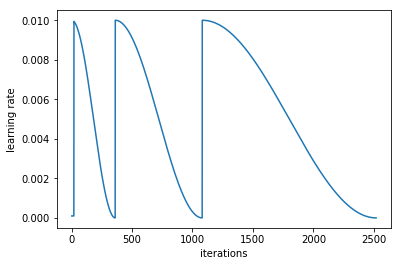

In [100]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [101]:
learn.save('224_all')

In [102]:
learn.load('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [103]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:08<00:24,  8.30s/it]

 50%|█████     | 2/4 [00:16<00:16,  8.19s/it]

 75%|███████▌  | 3/4 [00:24<00:08,  8.19s/it]

100%|██████████| 4/4 [00:32<00:00,  8.04s/it]

In [104]:
accuracy_np(probs, y)

0.9935

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [105]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[993   7]
 [  6 994]]

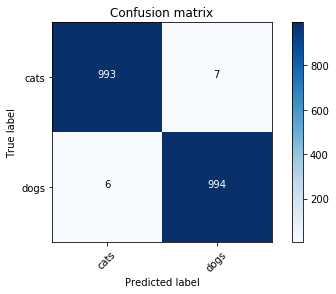

In [107]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect cats

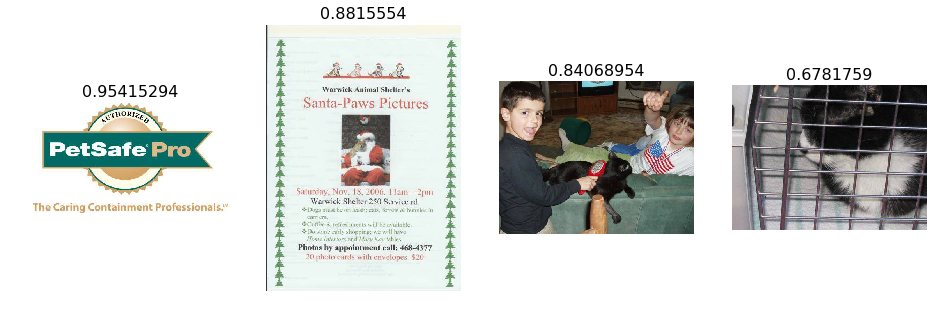

In [108]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs

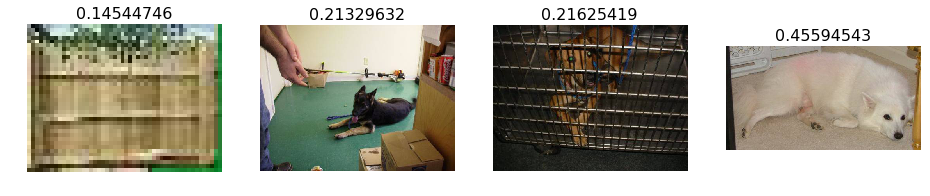

In [109]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

## Review: easy steps to train a world-class image classifier

1. precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

Let's look at the Dogs v Cats code line by line.

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [110]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [111]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for cats and dogs needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="images/pretrained.png" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [112]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyperparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate cat pictures from dog pictures. We need to pass two hyperameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [113]:
learn.fit(1e-2, 1)

  0%|          | 0/360 [00:00<?, ?it/s]

  2%|▏         | 7/360 [00:00<00:05, 68.49it/s, loss=0.502]

  5%|▌         | 18/360 [00:00<00:03, 86.30it/s, loss=0.234]

  8%|▊         | 29/360 [00:00<00:03, 91.06it/s, loss=0.155]

 10%|█         | 36/360 [00:00<00:03, 84.85it/s, loss=0.135]

 13%|█▎        | 48/360 [00:00<00:03, 91.32it/s, loss=0.105]

 21%|██▏       | 77/360 [00:00<00:02, 122.83it/s, loss=0.0867]

 24%|██▍       | 87/360 [00:00<00:02, 118.90it/s, loss=0.0797]

 28%|██▊       | 100/360 [00:00<00:02, 119.19it/s, loss=0.0701]

 31%|███▏      | 113/360 [00:00<00:02, 119.66it/s, loss=0.0642]

 35%|███▌      | 126/360 [00:01<00:01, 119.84it/s, loss=0.0587]

 39%|███▊      | 139/360 [00:01<00:01, 120.59it/s, loss=0.0581]

 45%|████▌     | 162/360 [00:01<00:01, 128.91it/s, loss=0.0622]

 49%|████▊     | 175/360 [00:01<00:01, 128.25it/s, loss=0.0576]

 52%|█████▏    | 187/360 [00:01<00:01, 127.66it/s, loss=0.0614]

 55%|█████▌    | 199/360 [00:01<00:01, 127.15it/s, loss=0.064] 

 59%|█████▊    | 211/360 [00:01<00:01, 126.62it/s, loss=0.0595]

 67%|██████▋   | 241/360 [00:01<00:00, 133.04it/s, loss=0.0502]

 70%|███████   | 253/360 [00:01<00:00, 132.14it/s, loss=0.0495]

 73%|███████▎  | 264/360 [00:02<00:00, 130.75it/s, loss=0.0467]

 77%|███████▋  | 276/360 [00:02<00:00, 130.10it/s, loss=0.0455]

 80%|████████  | 288/360 [00:02<00:00, 129.28it/s, loss=0.0442]

 88%|████████▊ | 317/360 [00:02<00:00, 136.02it/s, loss=0.0437]

 91%|█████████ | 327/360 [00:02<00:00, 134.16it/s, loss=0.0397]

 94%|█████████▍| 340/360 [00:02<00:00, 133.67it/s, loss=0.0455]

epoch      trn_loss   val_loss   accuracy   

    0      0.046016   0.030285   0.9905    

## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.

In [114]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [115]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting cats and dogs. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss should be much larger.

loss = -log(1-0.9) = 2.30

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.